<a href="https://www.kaggle.com/code/sutluuu/bellabeat-statistical-analyse-v-001?scriptVersionId=96934735" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Table of Content
1. Brief, information of the data, notebook aims
1. Summary Infographic (Will be in the next version)
1. Data Cleaning
    * Importing libraries
    * Take a glance at tables
    * *Question 1: Is the dataset clean?* 
    * Correcting column names and attributions
    * Uploading the data to the BigquerySQL and Google Cloud Platform
    * Joining the hourly and minute datas
    * Importing datasets from Bigquery
    
1. Cross Check within data groups for the data integrity and Data Imputations
    * *Question 2: Is the daily, hourly and minutely datas are consistent?*
    * Cross-check within the calories and total steps
    * *Question 3: Is the difference within groups statistically significant?*
    * Statistical difference analysis within calories and total steps
    * Data Correction of the calories and total steps with weighted imputation
    * Check after the imputation
    * Cross-check within the intensity minutes between daily, hourly and minute datas.
    * Question 4: Is the difference within groups statistically significant?*
    * Statistical difference analysis
    * Data corrections with transferring more correct datas.
    
1. Exploratory Data Analysis
   * *Question 5: What is the daily, hourly, minutely group metrics, whole day and between 05 AM - 11 PM?*
   * Daily Activity
   * Hourly Activity
   * *Question 6: Which parts of the day and the week is most active?*
   * Sleep (Will be in the next version)
   * Heartbeat (Will be in the next version)
   * Weight Analysis (Will be in the next version)
   
1. Water intake, Urine Output
   * Ideal Water Intake
   * *Question 7: Could we monitorize dehidration and mineral loss?*
   
1. Device Usage analysis
   * Daily Data existence Analysis
   * *Question 8: Is there a difference of the data existence or quality within time?*
   * Statistical difference within the part of the week and day of the week. 
   
1. Daily and Hourly Activity Analysis
   * Activity levels
   * Statistical differences between groups.
   * *Question 9: Is there a meaning about 10000 steps a day goal?*
   * *Question 10: Is there difference of data quality between activeness levels?*
   * *Question 11: Is there a difference within time to reach goals?*
1. Sleep Analysis (Will be in the next version)
   
1. Heartbeat analysis (Will be in the next version)


![](https://domain.glass/favicon/www.bellabeat.com.png)

# 1.Brief, information of the data, notebook aims
## Data Analysis of the fitbit smart device datas for Bellabeat Company products
##### Google Data Analytics Professional Certificate Capstone Project
<br> **SCENARIO**
<br> The Bellabeat has different type of smart device products. And stakeholder wants to **see analysis of the other smart-device usage trends and make data-driven decisions for product development and marketing strategies.**
<br>The data has been collected within 31-days and from 33 different devices.
<br>In the analysis I will use Python and BigquerySQL. As a medical doctor, I will try to focus with different view to the activity data. Let's start.

# 2.Summary Infographic

I am currently designing the summary infographic. 

# 3.Data Cleaning

### Importing libraries

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import re
from string import *
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from google.cloud import bigquery
from scipy.stats import chi2_contingency
import plotly.figure_factory as ff
from datetime import timedelta
!pip install scikit_posthocs
import scikit_posthocs as sp
from scipy import stats
from scipy.stats import shapiro
!pip install pingouin
import pingouin as pg
import statsmodels.stats.api as sms
import matplotlib.ticker as ticker
import plotly.graph_objects as go
from itertools import combinations
from statsmodels.sandbox.stats.multicomp import multipletests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.1/183.1 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=688b090f0671ebe86c2a07bb93821b83db1110cb58ae06d96c25bd353294f939
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=f63e1a540271bda16522fbd3a37a7a3641a478ffd710391afe1a8bf56a318eb1
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils


### Take a glance at tables

Take a look at one of tables. Then I have decided to search more information about the dataset. [FitBit data dictionary](https://www.fitbit.com/media/1930/fitbitdatadictionary102320.pdf) is very detailed and we have most of the data has been collected.

In [2]:
df = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


> ### *Question 1: Is the dataset clean?*

I am curious about null values, duplicated rows and user count.

In [3]:
directories = list()
files = list()
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    i = 1
    for filename in filenames:
        directories.append((os.path.join(dirname, filename)))
        
        print(i,".",filename)
        i = i + 1
        files.append(filename)

1 . minuteCaloriesNarrow_merged.csv
2 . weightLogInfo_merged.csv
3 . sleepDay_merged.csv
4 . dailyIntensities_merged.csv
5 . minuteIntensitiesWide_merged.csv
6 . minuteMETsNarrow_merged.csv
7 . dailyCalories_merged.csv
8 . hourlyCalories_merged.csv
9 . heartrate_seconds_merged.csv
10 . minuteSleep_merged.csv
11 . hourlyIntensities_merged.csv
12 . hourlySteps_merged.csv
13 . minuteStepsNarrow_merged.csv
14 . dailySteps_merged.csv
15 . minuteStepsWide_merged.csv
16 . minuteIntensitiesNarrow_merged.csv
17 . minuteCaloriesWide_merged.csv
18 . dailyActivity_merged.csv


In [4]:
print(" Total Null values")
for i,j in zip(files,directories):
    df = pd.read_csv(j)
    print(i,": ",df.isna().sum().sum())
    
print("\n Total User Count")
for i,j in zip(files,directories):
    df = pd.read_csv(j)
    print(i,": ",len(df.Id.unique()))
    
print("\n Duplicated rows")
for i,j in zip(files,directories):
    df = pd.read_csv(j)
    print(i,": ",df.duplicated().sum())

 Total Null values
minuteCaloriesNarrow_merged.csv :  0
weightLogInfo_merged.csv :  65
sleepDay_merged.csv :  0
dailyIntensities_merged.csv :  0
minuteIntensitiesWide_merged.csv :  0
minuteMETsNarrow_merged.csv :  0
dailyCalories_merged.csv :  0
hourlyCalories_merged.csv :  0
heartrate_seconds_merged.csv :  0
minuteSleep_merged.csv :  0
hourlyIntensities_merged.csv :  0
hourlySteps_merged.csv :  0
minuteStepsNarrow_merged.csv :  0
dailySteps_merged.csv :  0
minuteStepsWide_merged.csv :  0
minuteIntensitiesNarrow_merged.csv :  0
minuteCaloriesWide_merged.csv :  0
dailyActivity_merged.csv :  0

 Total User Count
minuteCaloriesNarrow_merged.csv :  33
weightLogInfo_merged.csv :  8
sleepDay_merged.csv :  24
dailyIntensities_merged.csv :  33
minuteIntensitiesWide_merged.csv :  33
minuteMETsNarrow_merged.csv :  33
dailyCalories_merged.csv :  33
hourlyCalories_merged.csv :  33
heartrate_seconds_merged.csv :  14
minuteSleep_merged.csv :  24
hourlyIntensities_merged.csv :  33
hourlySteps_merged.

<br> Only one table contains null values. I will dig into below. And sleepDay and minuteSleep tables have duplicated rows. We will dig into later. And as we can see, the user count is little bit varying but mainly 33.

In [5]:
df = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
print(df.isna().sum())
df.head()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


Only "Fat" column has NaN values, it is not crucial for now.

>  ### *The dataset seems **clean** but it needs some adjustments about data types and attribution names. In the tables it is needed to convert date types to DateTime, CamelCase column and file names to snake_case, int type id to string, and split DateTime to date and time and day of the week for time basis analysis. We need to check and convert some columns manually. And some tables are very big then after corrections, I have upload them to the google cloud store SQL workspace to work more efficiently in the Kaggle.*

In [6]:
# I am gonna convert CamelCase attribution names to snake_case
wide_tables = ["minuteCaloriesWide_merged.csv","minuteIntensitiesWide_merged.csv","minuteStepsWide_merged.csv"]
for directory, file in zip(directories, files):
    if file not in wide_tables:
        print("file: ",file)
        df  = pd.read_csv(directory)
        for i in df.columns:
            df = df.rename(columns= {i:i[0].lower() + re.sub(r'(?!^)[A-Z]', lambda x: '_' + x.group(0).lower(), i[1:])})
            df["id"] = df["id"].astype("string")
            file= file.replace("_merged","")         
        fname = "f_{}".format(file[0].lower() + re.sub(r'(?!^)[A-Z]', lambda x: '_' + x.group(0).lower(), file[1:]))
        df.to_csv(fname)
        print(file,"table saved as: ",fname)

file:  minuteCaloriesNarrow_merged.csv
minuteCaloriesNarrow.csv table saved as:  f_minute_calories_narrow.csv
file:  weightLogInfo_merged.csv
weightLogInfo.csv table saved as:  f_weight_log_info.csv
file:  sleepDay_merged.csv
sleepDay.csv table saved as:  f_sleep_day.csv
file:  dailyIntensities_merged.csv
dailyIntensities.csv table saved as:  f_daily_intensities.csv
file:  minuteMETsNarrow_merged.csv
minuteMETsNarrow.csv table saved as:  f_minute_m_e_ts_narrow.csv
file:  dailyCalories_merged.csv
dailyCalories.csv table saved as:  f_daily_calories.csv
file:  hourlyCalories_merged.csv
hourlyCalories.csv table saved as:  f_hourly_calories.csv
file:  heartrate_seconds_merged.csv
heartrate_seconds.csv table saved as:  f_heartrate_seconds.csv
file:  minuteSleep_merged.csv
minuteSleep.csv table saved as:  f_minute_sleep.csv
file:  hourlyIntensities_merged.csv
hourlyIntensities.csv table saved as:  f_hourly_intensities.csv
file:  hourlySteps_merged.csv
hourlySteps.csv table saved as:  f_hourly

#### Daily Activity Dataset

In [7]:
df = pd.read_csv("f_daily_activity.csv", index_col=0)
df.head()
df.activity_date = pd.to_datetime(df.activity_date)
df["wday"] = pd.Series(df.activity_date).dt.day_name()
df.to_csv("f_daily_activity.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          940 non-null    int64         
 1   activity_date               940 non-null    datetime64[ns]
 2   total_steps                 940 non-null    int64         
 3   total_distance              940 non-null    float64       
 4   tracker_distance            940 non-null    float64       
 5   logged_activities_distance  940 non-null    float64       
 6   very_active_distance        940 non-null    float64       
 7   moderately_active_distance  940 non-null    float64       
 8   light_active_distance       940 non-null    float64       
 9   sedentary_active_distance   940 non-null    float64       
 10  very_active_minutes         940 non-null    int64         
 11  fairly_active_minutes       940 non-null    int64         

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,wday
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


#### Heartrate seconds Dataset

I will work with this dataset, next version.

In [8]:
df= pd.read_csv("f_heartrate_seconds.csv", index_col = 0)
df.head()

,id,time,value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [9]:
df.time = pd.to_datetime(df.time)
df["date"] = pd.to_datetime(df['time']).dt.date
df["hour"] = pd.to_datetime(df['time']).dt.time
df["wday"] = pd.Series(df.time).dt.day_name()
df.to_csv("f_heartrate_seconds.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2483658 entries, 0 to 2483657
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   id      int64         
 1   time    datetime64[ns]
 2   value   int64         
 3   date    object        
 4   hour    object        
 5   wday    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 132.6+ MB
None


,id,time,value,date,hour,wday
0,2022484408,2016-04-12 07:21:00,97,2016-04-12,07:21:00,Tuesday
1,2022484408,2016-04-12 07:21:05,102,2016-04-12,07:21:05,Tuesday
2,2022484408,2016-04-12 07:21:10,105,2016-04-12,07:21:10,Tuesday
3,2022484408,2016-04-12 07:21:20,103,2016-04-12,07:21:20,Tuesday
4,2022484408,2016-04-12 07:21:25,101,2016-04-12,07:21:25,Tuesday


#### Hourly calories Dataset

In [10]:
df = pd.read_csv("f_hourly_calories.csv",index_col= 0)
df.head()
df["activity_hour"] = pd.to_datetime(df.activity_hour)
df["date"] = pd.to_datetime(df['activity_hour']).dt.date
df["hour"] = pd.to_datetime(df['activity_hour']).dt.time
df["wday"] = pd.Series(df.activity_hour).dt.day_name()
df.to_csv("f_hourly_calories.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             22099 non-null  int64         
 1   activity_hour  22099 non-null  datetime64[ns]
 2   calories       22099 non-null  int64         
 3   date           22099 non-null  object        
 4   hour           22099 non-null  object        
 5   wday           22099 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.2+ MB
None


,id,activity_hour,calories,date,hour,wday
0,1503960366,2016-04-12 00:00:00,81,2016-04-12,00:00:00,Tuesday
1,1503960366,2016-04-12 01:00:00,61,2016-04-12,01:00:00,Tuesday
2,1503960366,2016-04-12 02:00:00,59,2016-04-12,02:00:00,Tuesday
3,1503960366,2016-04-12 03:00:00,47,2016-04-12,03:00:00,Tuesday
4,1503960366,2016-04-12 04:00:00,48,2016-04-12,04:00:00,Tuesday


#### Hourly intensities Dataset

In [11]:
df = pd.read_csv("f_hourly_intensities.csv", index_col = 0)
df["activity_hour"] = pd.to_datetime(df.activity_hour)
df["date"] = pd.to_datetime(df['activity_hour']).dt.date
df["hour"] = pd.to_datetime(df['activity_hour']).dt.time
df["wday"] = pd.Series(df.activity_hour).dt.day_name()
df.to_csv("f_hourly_intensities.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 22099 non-null  int64         
 1   activity_hour      22099 non-null  datetime64[ns]
 2   total_intensity    22099 non-null  int64         
 3   average_intensity  22099 non-null  float64       
 4   date               22099 non-null  object        
 5   hour               22099 non-null  object        
 6   wday               22099 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 1.3+ MB
None


,id,activity_hour,total_intensity,average_intensity,date,hour,wday
0,1503960366,2016-04-12 00:00:00,20,0.333333,2016-04-12,00:00:00,Tuesday
1,1503960366,2016-04-12 01:00:00,8,0.133333,2016-04-12,01:00:00,Tuesday
2,1503960366,2016-04-12 02:00:00,7,0.116667,2016-04-12,02:00:00,Tuesday
3,1503960366,2016-04-12 03:00:00,0,0.000000,2016-04-12,03:00:00,Tuesday
4,1503960366,2016-04-12 04:00:00,0,0.000000,2016-04-12,04:00:00,Tuesday


#### Hourly steps Dataset

In [12]:
df = pd.read_csv("f_hourly_steps.csv", index_col = 0)
df["activity_hour"] = pd.to_datetime(df.activity_hour)
df["date"] = pd.to_datetime(df['activity_hour']).dt.date
df["hour"] = pd.to_datetime(df['activity_hour']).dt.time
df["wday"] = pd.Series(df.activity_hour).dt.day_name()
df.to_csv("f_hourly_steps.csv")
df.head()

,id,activity_hour,step_total,date,hour,wday
0,1503960366,2016-04-12 00:00:00,373,2016-04-12,00:00:00,Tuesday
1,1503960366,2016-04-12 01:00:00,160,2016-04-12,01:00:00,Tuesday
2,1503960366,2016-04-12 02:00:00,151,2016-04-12,02:00:00,Tuesday
3,1503960366,2016-04-12 03:00:00,0,2016-04-12,03:00:00,Tuesday
4,1503960366,2016-04-12 04:00:00,0,2016-04-12,04:00:00,Tuesday


#### Minute calories narrowed Dataset

In [13]:
df = pd.read_csv("f_minute_calories_narrow.csv", index_col = 0)
df.head()

,id,activity_minute,calories
0,1503960366,4/12/2016 12:00:00 AM,0.7865
1,1503960366,4/12/2016 12:01:00 AM,0.7865
2,1503960366,4/12/2016 12:02:00 AM,0.7865
3,1503960366,4/12/2016 12:03:00 AM,0.7865
4,1503960366,4/12/2016 12:04:00 AM,0.7865


In [14]:
df["activity_minute"] = pd.to_datetime(df.activity_minute)
df["date"] = pd.to_datetime(df['activity_minute']).dt.date
df["hour"] = pd.to_datetime(df['activity_minute']).dt.time
df["wday"] = pd.Series(df.activity_minute).dt.day_name()
df.to_csv("f_minute_calories_narrow.csv")
df.head()

,id,activity_minute,calories,date,hour,wday
0,1503960366,2016-04-12 00:00:00,0.7865,2016-04-12,00:00:00,Tuesday
1,1503960366,2016-04-12 00:01:00,0.7865,2016-04-12,00:01:00,Tuesday
2,1503960366,2016-04-12 00:02:00,0.7865,2016-04-12,00:02:00,Tuesday
3,1503960366,2016-04-12 00:03:00,0.7865,2016-04-12,00:03:00,Tuesday
4,1503960366,2016-04-12 00:04:00,0.7865,2016-04-12,00:04:00,Tuesday


#### Minute Intensities Narrowed Dataset

In [15]:
df = pd.read_csv("f_minute_intensities_narrow.csv", index_col = 0)
df.head()

,id,activity_minute,intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [16]:
df["activity_minute"] = pd.to_datetime(df.activity_minute)
df["date"] = pd.to_datetime(df['activity_minute']).dt.date
df["hour"] = pd.to_datetime(df['activity_minute']).dt.time
df["wday"] = pd.Series(df.activity_minute).dt.day_name()
df.to_csv("f_minute_intensities_narrow.csv")
df.head()

,id,activity_minute,intensity,date,hour,wday
0,1503960366,2016-04-12 00:00:00,0,2016-04-12,00:00:00,Tuesday
1,1503960366,2016-04-12 00:01:00,0,2016-04-12,00:01:00,Tuesday
2,1503960366,2016-04-12 00:02:00,0,2016-04-12,00:02:00,Tuesday
3,1503960366,2016-04-12 00:03:00,0,2016-04-12,00:03:00,Tuesday
4,1503960366,2016-04-12 00:04:00,0,2016-04-12,00:04:00,Tuesday


#### Minute MET's Dataset

In [17]:
#MINUTEMETS DATASET

df = pd.read_csv("f_minute_m_e_ts_narrow.csv", index_col = 0)
df.head()

,id,activity_minute,mE_ts
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10


In [18]:
df["activity_minute"] = pd.to_datetime(df.activity_minute)
df["date"] = pd.to_datetime(df['activity_minute']).dt.date
df["hour"] = pd.to_datetime(df['activity_minute']).dt.time
df["wday"] = pd.Series(df.activity_minute).dt.day_name()
df.to_csv("f_minute_m_e_ts_narrow.csv")
df.head()

,id,activity_minute,mE_ts,date,hour,wday
0,1503960366,2016-04-12 00:00:00,10,2016-04-12,00:00:00,Tuesday
1,1503960366,2016-04-12 00:01:00,10,2016-04-12,00:01:00,Tuesday
2,1503960366,2016-04-12 00:02:00,10,2016-04-12,00:02:00,Tuesday
3,1503960366,2016-04-12 00:03:00,10,2016-04-12,00:03:00,Tuesday
4,1503960366,2016-04-12 00:04:00,10,2016-04-12,00:04:00,Tuesday


#### Minute Steps Narrow Dataset

In [19]:
#MINUTESTEPSNARROW DATASET

df = pd.read_csv("f_minute_steps_narrow.csv", index_col = 0)
df.head()

,id,activity_minute,steps
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [20]:
df["activity_minute"] = pd.to_datetime(df.activity_minute)
df["date"] = pd.to_datetime(df['activity_minute']).dt.date
df["hour"] = pd.to_datetime(df['activity_minute']).dt.time
df["wday"] = pd.Series(df.activity_minute).dt.day_name()
df.to_csv("f_minute_steps_narrow.csv")
df.head()

,id,activity_minute,steps,date,hour,wday
0,1503960366,2016-04-12 00:00:00,0,2016-04-12,00:00:00,Tuesday
1,1503960366,2016-04-12 00:01:00,0,2016-04-12,00:01:00,Tuesday
2,1503960366,2016-04-12 00:02:00,0,2016-04-12,00:02:00,Tuesday
3,1503960366,2016-04-12 00:03:00,0,2016-04-12,00:03:00,Tuesday
4,1503960366,2016-04-12 00:04:00,0,2016-04-12,00:04:00,Tuesday


#### Sleep Day Dataset

In [21]:
#SLEEPDAY DATASET

df =pd.read_csv("f_sleep_day.csv", index_col = 0)
df.head()

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [22]:
df["sleep_day"] = pd.to_datetime(df.sleep_day)
df["date"] = pd.to_datetime(df['sleep_day']).dt.date
df["wday"] = pd.Series(df.sleep_day).dt.day_name()
df.to_csv("f_sleep_day.csv")
df.head()

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,date,wday
0,1503960366,2016-04-12,1,327,346,2016-04-12,Tuesday
1,1503960366,2016-04-13,2,384,407,2016-04-13,Wednesday
2,1503960366,2016-04-15,1,412,442,2016-04-15,Friday
3,1503960366,2016-04-16,2,340,367,2016-04-16,Saturday
4,1503960366,2016-04-17,1,700,712,2016-04-17,Sunday


#### Minute Sleep Dataset

In [23]:
#MINUTESLEEP DATASET
df = pd.read_csv("f_minute_sleep.csv", index_col = 0)
df.head()

,id,date,value,log_id
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589


In [24]:
df = df.rename(columns={"date":"sleep_time"})
df["sleep_time"] = pd.to_datetime(df.sleep_time)
df.head()

,id,sleep_time,value,log_id
0,1503960366,2016-04-12 02:47:30,3,11380564589
1,1503960366,2016-04-12 02:48:30,2,11380564589
2,1503960366,2016-04-12 02:49:30,1,11380564589
3,1503960366,2016-04-12 02:50:30,1,11380564589
4,1503960366,2016-04-12 02:51:30,1,11380564589


I saw a problem in the metadata of the dataset. The minute basis timestamp column records have some different seconds. I have changed them.

In [25]:
df["sleep_time_formatted"] = df.sleep_time.apply(lambda x: x-dt.timedelta(seconds = 30) if x.second == 30 else x)
df["date"] = pd.to_datetime(df['sleep_time_formatted']).dt.date
df["hour"] = pd.to_datetime(df['sleep_time_formatted']).dt.time
df["wday"] = pd.Series(df.sleep_time_formatted).dt.day_name()
df.to_csv("f_minute_sleep.csv")
df.head()

,id,sleep_time,value,log_id,sleep_time_formatted,date,hour,wday
0,1503960366,2016-04-12 02:47:30,3,11380564589,2016-04-12 02:47:00,2016-04-12,02:47:00,Tuesday
1,1503960366,2016-04-12 02:48:30,2,11380564589,2016-04-12 02:48:00,2016-04-12,02:48:00,Tuesday
2,1503960366,2016-04-12 02:49:30,1,11380564589,2016-04-12 02:49:00,2016-04-12,02:49:00,Tuesday
3,1503960366,2016-04-12 02:50:30,1,11380564589,2016-04-12 02:50:00,2016-04-12,02:50:00,Tuesday
4,1503960366,2016-04-12 02:51:30,1,11380564589,2016-04-12 02:51:00,2016-04-12,02:51:00,Tuesday


#### Weight log info dataset

In [26]:
df = pd.read_csv("f_weight_log_info.csv", index_col = 0)
df.head()

,id,date,weight_kg,weight_pounds,fat,bM_i,is_manual_report,log_id
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [27]:
df = df.rename(columns={"date":"measure_time"})
df["measure_time"] = pd.to_datetime(df.measure_time)
df["date"] = pd.to_datetime(df['measure_time']).dt.date
df["hour"] = pd.to_datetime(df['measure_time']).dt.time
df["wday"] = pd.Series(df.measure_time).dt.day_name()
df.head()
df.to_csv("f_weight_log_info.csv")

### Exporting tables to the Google Bigquery SQL workspace

In [28]:
# Put your own project id here
PROJECT_ID = 'fitbit-348610'

# create a client instance for your project
client = bigquery.Client(project=PROJECT_ID, location="US")

# create a new datset
client.create_dataset("fitbit")

Dataset(DatasetReference('fitbit-348610', 'fitbit'))

In [29]:
directories = list()
files = list()

for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        if ".csv" in filename:
            directories.append((os.path.join(dirname, filename)))
            files.append(filename)
            file_name = filename.replace("f_","")
            file_name = file_name.replace(".csv","")
            print(file_name)
            # create a new table in that dataset ()
            client.create_table("{PROJECT_ID}.fitbit.{file_name}".format(PROJECT_ID = PROJECT_ID, file_name=file_name))
            # some variables
            filename = os.path.join(dirname, filename) # this is the file path to your csv
            dataset_id = 'fitbit'
            table_id = file_name
            # tell the client everything it needs to know to upload our csv
            dataset_ref = client.dataset(dataset_id)
            table_ref = dataset_ref.table(table_id)
            job_config = bigquery.LoadJobConfig()
            job_config.source_format = bigquery.SourceFormat.CSV
            job_config.autodetect = True
            # load the csv into bigquery
            with open(filename, "rb") as source_file:
                job = client.load_table_from_file(source_file, table_ref, job_config=job_config)

            job.result()  # Waits for table load to complete.

            # looks like everything worked :)
            print("Loaded {} rows into {}:{}.".format(job.output_rows, dataset_id, table_id))

daily_calories
Loaded 940 rows into fitbit:daily_calories.
sleep_day
Loaded 413 rows into fitbit:sleep_day.
minute_intensities_narrow
Loaded 1325580 rows into fitbit:minute_intensities_narrow.
weight_log_info
Loaded 67 rows into fitbit:weight_log_info.
hourly_intensities
Loaded 22099 rows into fitbit:hourly_intensities.
daily_steps
Loaded 940 rows into fitbit:daily_steps.
minute_calories_narrow
Loaded 1325580 rows into fitbit:minute_calories_narrow.
heartrate_seconds
Loaded 2483658 rows into fitbit:heartrate_seconds.
minute_sleep
Loaded 188521 rows into fitbit:minute_sleep.
minute_m_e_ts_narrow
Loaded 1325580 rows into fitbit:minute_m_e_ts_narrow.
hourly_calories
Loaded 22099 rows into fitbit:hourly_calories.
daily_intensities
Loaded 940 rows into fitbit:daily_intensities.
minute_steps_narrow
Loaded 1325580 rows into fitbit:minute_steps_narrow.
hourly_steps
Loaded 22099 rows into fitbit:hourly_steps.
daily_activity
Loaded 940 rows into fitbit:daily_activity.


### Joining the hourly and minute datas
I will join the hourly step, hourly calories, hourly intensities tables and minute step, minute calories, minute intensities tables into datasets respectively hourly activity and minute activity. The data is little bit big and join functions are easier than python in bigquery sql. I have uploded formatted tables to the google cloud store and queried with BigQuery.

In [30]:
# BigQuery
bigquery_client = bigquery.Client(project='fitbit-348610')
dataset_ref = bigquery_client.dataset("fitbit", project="fitbit-348610")
dataset = bigquery_client.get_dataset(dataset_ref)

In [31]:
### Hourly data join
hour_query = """

SELECT 
hourly_calories.id, hourly_calories.activity_hour,
hourly_calories.date, hourly_calories.hour,
hourly_calories.calories, hourly_calories.wday,
hourly_intensities.total_intensity, hourly_intensities.average_intensity,
hourly_steps.step_total 
FROM `fitbit-348610.fitbit.hourly_calories` AS hourly_calories
INNER JOIN `fitbit-348610.fitbit.hourly_intensities` AS hourly_intensities
ON hourly_calories.id = hourly_intensities.id AND hourly_calories.activity_hour = hourly_intensities.activity_hour
INNER JOIN `fitbit-348610.fitbit.hourly_steps` AS hourly_steps
ON hourly_calories.id = hourly_steps.id AND hourly_calories.activity_hour = hourly_steps.activity_hour


"""
# Set up the query
query_job1 = bigquery_client.query(hour_query)

# Make an API request  to run the query and return a pandas DataFrame
hourly_activity = query_job1.to_dataframe()
hourly_activity.to_csv("f_hourly_activity.csv")
# See the resulting table made from the query
print(hourly_activity.info())
hourly_activity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 22099 non-null  int64              
 1   activity_hour      22099 non-null  datetime64[ns, UTC]
 2   date               22099 non-null  object             
 3   hour               22099 non-null  object             
 4   calories           22099 non-null  int64              
 5   wday               22099 non-null  object             
 6   total_intensity    22099 non-null  int64              
 7   average_intensity  22099 non-null  float64            
 8   step_total         22099 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(3)
memory usage: 1.5+ MB
None


,id,activity_hour,date,hour,calories,wday,total_intensity,average_intensity,step_total
0,1503960366,2016-04-12 10:00:00+00:00,2016-04-12,10:00:00,99,Tuesday,29,0.483333,676
1,1624580081,2016-04-12 10:00:00+00:00,2016-04-12,10:00:00,141,Tuesday,60,1.000000,5375
2,1644430081,2016-04-12 10:00:00+00:00,2016-04-12,10:00:00,129,Tuesday,14,0.233333,288
3,1844505072,2016-04-12 10:00:00+00:00,2016-04-12,10:00:00,108,Tuesday,24,0.400000,582
4,1927972279,2016-04-12 10:00:00+00:00,2016-04-12,10:00:00,85,Tuesday,0,0.000000,0


In [32]:
# create a new table in that dataset ()
client.create_table(f"{PROJECT_ID}.fitbit.hourly_activity")
# some variables
filename = "./f_hourly_activity.csv" # this is the file path to your csv
dataset_id = 'fitbit'
table_id = 'hourly_activity'

# tell the client everything it needs to know to upload our csv
dataset_ref = client.dataset(dataset_id)
table_ref = dataset_ref.table(table_id)
job_config = bigquery.LoadJobConfig()
job_config.source_format = bigquery.SourceFormat.CSV
job_config.autodetect = True

# load the csv into bigquery
with open(filename, "rb") as source_file:
    job = client.load_table_from_file(source_file, table_ref, job_config=job_config)

job.result()  # Waits for table load to complete.

# looks like everything worked :)
print("Loaded {} rows into {}:{}.".format(job.output_rows, dataset_id, table_id))

Loaded 22099 rows into fitbit:hourly_activity.


In [33]:
minute_query = """

SELECT 
minute_calories.id,
minute_calories.activity_minute,
minute_calories.date,
minute_calories.hour,
minute_calories.wday,
minute_calories.calories,
minute_intensities.intensity,
minute_steps.steps,
minute_met.me_ts
FROM `fitbit-348610.fitbit.minute_calories_narrow` AS minute_calories
INNER JOIN `fitbit-348610.fitbit.minute_intensities_narrow` AS minute_intensities
ON minute_calories.id = minute_intensities.id AND minute_calories.activity_minute = minute_intensities.activity_minute
INNER JOIN `fitbit-348610.fitbit.minute_steps_narrow` AS minute_steps
ON minute_calories.id = minute_steps.id AND minute_calories.activity_minute = minute_steps.activity_minute
INNER JOIN `fitbit-348610.fitbit.minute_m_e_ts_narrow` AS minute_met
ON minute_calories.id = minute_met.id AND minute_calories.activity_minute = minute_met.activity_minute


"""
#Set up the query
query_job2 = bigquery_client.query(minute_query)

#Make an API request  to run the query and return a pandas DataFrame
minute_activity = query_job2.to_dataframe()
minute_activity.to_csv("f_minute_activity.csv")
#See the resulting table made from the query
print(minute_activity.info())
minute_activity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype              
---  ------           --------------    -----              
 0   id               1325580 non-null  int64              
 1   activity_minute  1325580 non-null  datetime64[ns, UTC]
 2   date             1325580 non-null  object             
 3   hour             1325580 non-null  object             
 4   wday             1325580 non-null  object             
 5   calories         1325580 non-null  float64            
 6   intensity        1325580 non-null  int64              
 7   steps            1325580 non-null  int64              
 8   me_ts            1325580 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(3)
memory usage: 91.0+ MB
None


,id,activity_minute,date,hour,wday,calories,intensity,steps,me_ts
0,1503960366,2016-04-15 12:28:00+00:00,2016-04-15,12:28:00,Friday,2.2022,1,15,28
1,1503960366,2016-04-15 22:08:00+00:00,2016-04-15,22:08:00,Friday,4.8763,3,93,62
2,1503960366,2016-04-15 23:30:00+00:00,2016-04-15,23:30:00,Friday,2.0449,1,9,26
3,1503960366,2016-04-22 21:54:00+00:00,2016-04-22,21:54:00,Friday,5.9774,3,119,76
4,1503960366,2016-04-22 21:55:00+00:00,2016-04-22,21:55:00,Friday,6.1347,3,121,78


In [34]:
# create a new table in that dataset ()
client.create_table(f"{PROJECT_ID}.fitbit.minute_activity")
# some variables
filename = "./f_minute_activity.csv" # this is the file path to your csv
dataset_id = 'fitbit'
table_id = 'minute_activity'

# tell the client everything it needs to know to upload our csv
dataset_ref = client.dataset(dataset_id)
table_ref = dataset_ref.table(table_id)
job_config = bigquery.LoadJobConfig()
job_config.source_format = bigquery.SourceFormat.CSV
job_config.autodetect = True

# load the csv into bigquery
with open(filename, "rb") as source_file:
    job = client.load_table_from_file(source_file, table_ref, job_config=job_config)

job.result()  # Waits for table load to complete.

# looks like everything worked :)
print("Loaded {} rows into {}:{}.".format(job.output_rows, dataset_id, table_id))

Loaded 1325580 rows into fitbit:minute_activity.


#### I have uploaded the joined data to the Bigquery Database for working more efficiently. 

In [35]:
# Make a list of all the tables in the dataset
tables = list(bigquery_client.list_tables(dataset))

# Print names of all tables in the dataset
for table in tables:
    print(table.table_id)

daily_activity
daily_calories
daily_intensities
daily_steps
heartrate_seconds
hourly_activity
hourly_calories
hourly_intensities
hourly_steps
minute_activity
minute_calories_narrow
minute_intensities_narrow
minute_m_e_ts_narrow
minute_sleep
minute_steps_narrow
sleep_day
weight_log_info


- All dataset has been cleaned. The date columns have been converted to the datetime object. And joined hourly and minutely data.

### Importing datasets from Bigquery

In [36]:
daily_activity_query = """
SELECT *
FROM `fitbit-348610.fitbit.daily_activity`
"""
# Set up the query
daq = bigquery_client.query(daily_activity_query)

# Make an API request  to run the query and return a pandas DataFrame
daily_activity = daq.to_dataframe()
daily_activity = daily_activity.drop(columns="int64_field_0")
daily_activity["id"] = daily_activity.id.astype("string")
daily_activity["wday"] = daily_activity.wday.astype("string")
# See the resulting table made from the query
print(daily_activity.info())
daily_activity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          940 non-null    string 
 1   activity_date               940 non-null    object 
 2   total_steps                 940 non-null    int64  
 3   total_distance              940 non-null    float64
 4   tracker_distance            940 non-null    float64
 5   logged_activities_distance  940 non-null    float64
 6   very_active_distance        940 non-null    float64
 7   moderately_active_distance  940 non-null    float64
 8   light_active_distance       940 non-null    float64
 9   sedentary_active_distance   940 non-null    float64
 10  very_active_minutes         940 non-null    int64  
 11  fairly_active_minutes       940 non-null    int64  
 12  lightly_active_minutes      940 non-null    int64  
 13  sedentary_minutes           940 non

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,wday
0,1624580081,2016-04-12,8163,5.31,5.31,0.0,0.0,0.0,5.31,0.00,0,0,146,1294,1432,Tuesday
1,1844505072,2016-04-12,6697,4.43,4.43,0.0,0.0,0.0,4.43,0.00,0,0,339,1101,2030,Tuesday
2,1927972279,2016-04-12,678,0.47,0.47,0.0,0.0,0.0,0.47,0.00,0,0,55,734,2220,Tuesday
3,3372868164,2016-04-12,4747,3.24,3.24,0.0,0.0,0.0,3.23,0.01,0,0,280,1160,1788,Tuesday
4,4057192912,2016-04-12,5394,4.03,4.03,0.0,0.0,0.0,3.94,0.00,0,0,164,1276,2286,Tuesday


In [37]:
hourly_activity_query = """
SELECT *
FROM `fitbit-348610.fitbit.hourly_activity`
"""
# Set up the query
haq = bigquery_client.query(hourly_activity_query)

# Make an API request  to run the query and return a pandas DataFrame
hourly_activity = haq.to_dataframe()
hourly_activity = hourly_activity.drop(columns="int64_field_0")
hourly_activity["id"] = hourly_activity.id.astype("string")
hourly_activity["wday"] = hourly_activity.wday.astype("string")

# See the resulting table made from the query
print(hourly_activity.info())
hourly_activity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 22099 non-null  string             
 1   activity_hour      22099 non-null  datetime64[ns, UTC]
 2   date               22099 non-null  object             
 3   hour               22099 non-null  object             
 4   calories           22099 non-null  int64              
 5   wday               22099 non-null  string             
 6   total_intensity    22099 non-null  int64              
 7   average_intensity  22099 non-null  float64            
 8   step_total         22099 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(2), string(2)
memory usage: 1.5+ MB
None


,id,activity_hour,date,hour,calories,wday,total_intensity,average_intensity,step_total
0,3977333714,2016-04-15 16:00:00+00:00,2016-04-15,16:00:00,155,Friday,88,1.466667,2600
1,4388161847,2016-04-15 16:00:00+00:00,2016-04-15,16:00:00,245,Friday,37,0.616667,1100
2,4445114986,2016-04-15 16:00:00+00:00,2016-04-15,16:00:00,156,Friday,38,0.633333,788
3,5553957443,2016-04-15 16:00:00+00:00,2016-04-15,16:00:00,202,Friday,84,1.400000,3256
4,6117666160,2016-04-15 16:00:00+00:00,2016-04-15,16:00:00,193,Friday,46,0.766667,1427


In [38]:
minute_activity_query = """
SELECT *
FROM `fitbit-348610.fitbit.minute_activity`
"""
# Set up the query
maq = bigquery_client.query(minute_activity_query)

# Make an API request  to run the query and return a pandas DataFrame
minute_activity = maq.to_dataframe()
minute_activity = minute_activity.drop(columns="int64_field_0")
minute_activity["id"] = minute_activity.id.astype("string")
minute_activity["wday"] = minute_activity.wday.astype("string")
# See the resulting table made from the query
print(minute_activity.info())
minute_activity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype              
---  ------           --------------    -----              
 0   id               1325580 non-null  string             
 1   activity_minute  1325580 non-null  datetime64[ns, UTC]
 2   date             1325580 non-null  object             
 3   hour             1325580 non-null  object             
 4   wday             1325580 non-null  string             
 5   calories         1325580 non-null  float64            
 6   intensity        1325580 non-null  int64              
 7   steps            1325580 non-null  int64              
 8   me_ts            1325580 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(2), string(2)
memory usage: 91.0+ MB
None


,id,activity_minute,date,hour,wday,calories,intensity,steps,me_ts
0,4057192912,2016-04-12 14:03:00+00:00,2016-04-12,14:03:00,Tuesday,7.15488,1,88,58
1,4057192912,2016-04-12 11:28:00+00:00,2016-04-12,11:28:00,Tuesday,6.90816,1,85,56
2,4057192912,2016-04-12 19:53:00+00:00,2016-04-12,19:53:00,Tuesday,6.41472,1,75,52
3,4057192912,2016-04-12 18:02:00+00:00,2016-04-12,18:02:00,Tuesday,6.90816,1,83,56
4,4057192912,2016-04-12 19:30:00+00:00,2016-04-12,19:30:00,Tuesday,5.18112,1,58,42


In [39]:
weight_query = """
SELECT *
FROM `fitbit-348610.fitbit.weight_log_info`
"""
#Set up the query
weight_q = bigquery_client.query(weight_query)
# Make an API request  to run the query and return a pandas DataFrame
weight = weight_q.to_dataframe()
weight = weight.drop(columns="int64_field_0")
weight["id"] = weight["id"].astype("string")
#See the resulting table made from the query
print(weight.info())
weight.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                67 non-null     string             
 1   measure_time      67 non-null     datetime64[ns, UTC]
 2   weight_kg         67 non-null     float64            
 3   weight_pounds     67 non-null     float64            
 4   fat               2 non-null      float64            
 5   bM_i              67 non-null     float64            
 6   is_manual_report  67 non-null     bool               
 7   log_id            67 non-null     int64              
 8   date              67 non-null     object             
 9   hour              67 non-null     object             
 10  wday              67 non-null     object             
dtypes: bool(1), datetime64[ns, UTC](1), float64(4), int64(1), object(3), string(1)
memory usage: 5.4+ KB
None


,id,measure_time,weight_kg,weight_pounds,fat,bM_i,is_manual_report,log_id,date,hour,wday
0,4558609924,2016-04-18 23:59:59+00:00,69.699997,153.662190,NaN,27.250000,True,1461023999000,2016-04-18,23:59:59,Monday
1,4558609924,2016-04-25 23:59:59+00:00,70.300003,154.984977,NaN,27.459999,True,1461628799000,2016-04-25,23:59:59,Monday
2,4558609924,2016-05-01 23:59:59+00:00,69.900002,154.103125,NaN,27.320000,True,1462147199000,2016-05-01,23:59:59,Sunday
3,4558609924,2016-05-02 23:59:59+00:00,69.199997,152.559879,NaN,27.040001,True,1462233599000,2016-05-02,23:59:59,Monday
4,4558609924,2016-05-09 23:59:59+00:00,69.099998,152.339420,NaN,27.000000,True,1462838399000,2016-05-09,23:59:59,Monday


# 4.Cross Check
### Cross Check within data groups for the data integrity and Data Imputations

> ### *Question 2: Is the daily, hourly and minutely datas are consistent?*

I want to cross-check the daily, hourly and minute tables for consistency. They should contain the same data have been collected different frequencies. I will compare daily total_steps. For this manipulation I will use the Bigquery SQL again. Because especially minute data is big and I do not want to lose any time. 

In [40]:
crosscheck = """
SELECT daily_activity.id,
daily_activity.activity_date,
daily_activity.total_steps,
dayfromhour.hour_total_step,
dayfrommin.minute_total_step 
FROM `fitbit-348610.fitbit.daily_activity` AS daily_activity
INNER JOIN (
    SELECT id, date, SUM(step_total) AS hour_total_step,
    FROM `fitbit-348610.fitbit.hourly_activity`
    GROUP BY  id, date
) AS dayfromhour
ON daily_activity.id = dayfromhour.id AND daily_activity.activity_date = dayfromhour.date
INNER JOIN (
    SELECT id, date, SUM(steps) AS minute_total_step
    FROM `fitbit-348610.fitbit.minute_activity`
    GROUP BY  id, date
) AS dayfrommin
ON daily_activity.id = dayfrommin.id AND daily_activity.activity_date = dayfrommin.date
WHERE daily_activity.total_steps !=  dayfromhour.hour_total_step AND daily_activity.total_steps != dayfrommin.minute_total_step 
"""

In [41]:
# Set up the query
query_job3 = bigquery_client.query(crosscheck)

# Make an API request  to run the query and return a pandas DataFrame
innerejoin = query_job3.to_dataframe()
# See the resulting table made from the query
print(innerejoin.info())
innerejoin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 159 non-null    int64 
 1   activity_date      159 non-null    object
 2   total_steps        159 non-null    int64 
 3   hour_total_step    159 non-null    int64 
 4   minute_total_step  159 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.3+ KB
None


,id,activity_date,total_steps,hour_total_step,minute_total_step
0,4319703577,2016-04-12,7753,0,0
1,4388161847,2016-04-12,10122,0,0
2,8792009665,2016-04-12,2564,2556,2556
3,7086361926,2016-04-12,11317,11309,11309
4,1503960366,2016-04-12,13162,13158,13158


In [42]:
join = """
SELECT daily_activity.id,
daily_activity.activity_date,
daily_activity.total_steps,
dayfromhour.hour_total_step,
dayfrommin.minute_total_step,
daily_activity.calories AS total_calories,
dayfromhour.hour_total_calories ,
dayfrommin.minute_total_calories 
FROM `fitbit-348610.fitbit.daily_activity` AS daily_activity
INNER JOIN (
    SELECT id, date, SUM(step_total) AS hour_total_step, SUM(calories) AS hour_total_calories
    FROM `fitbit-348610.fitbit.hourly_activity`
    GROUP BY  id, date
) AS dayfromhour
ON daily_activity.id = dayfromhour.id AND daily_activity.activity_date = dayfromhour.date
INNER JOIN (
    SELECT id, date, SUM(steps) AS minute_total_step, SUM(calories) AS minute_total_calories
    FROM `fitbit-348610.fitbit.minute_activity`
    GROUP BY  id, date
) AS dayfrommin
ON daily_activity.id = dayfrommin.id AND daily_activity.activity_date = dayfrommin.date 
"""

In [43]:
# Set up the query
query_job5 = bigquery_client.query(join)

# Make an API request  to run the query and return a pandas DataFrame
join = query_job5.to_dataframe()
# See the resulting table made from the query
print(join.info())
join.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     934 non-null    int64  
 1   activity_date          934 non-null    object 
 2   total_steps            934 non-null    int64  
 3   hour_total_step        934 non-null    int64  
 4   minute_total_step      934 non-null    int64  
 5   total_calories         934 non-null    int64  
 6   hour_total_calories    934 non-null    int64  
 7   minute_total_calories  934 non-null    float64
dtypes: float64(1), int64(6), object(1)
memory usage: 58.5+ KB
None


,id,activity_date,total_steps,hour_total_step,minute_total_step,total_calories,hour_total_calories,minute_total_calories
0,3977333714,2016-04-15,9010,9010,9010,1468,1469,1468.572758
1,4388161847,2016-04-15,8758,8758,8758,3066,3065,3066.800581
2,4445114986,2016-04-15,7198,7198,7198,2496,2494,2496.381867
3,5553957443,2016-04-15,16556,16556,16556,2254,2255,2254.367589
4,6117666160,2016-04-15,14019,14019,14019,2865,2861,2865.142178


<br>There is differences between daily, hourly and minute datas. Also, There is 934 row on the crosscheck table but the daily activity table has 940 rows.
<br>Firstly I will look which rows they are. 

In [44]:
outlined = """
SELECT daily_activity.id,
daily_activity.activity_date,
daily_activity.total_steps,
dayfromhour.hour_total_step,
dayfrommin.minute_total_step,
daily_activity.calories AS total_calories,
dayfromhour.hour_total_calories ,
dayfrommin.minute_total_calories 
FROM `fitbit-348610.fitbit.daily_activity` AS daily_activity
FULL OUTER JOIN (
    SELECT id, date, SUM(step_total) AS hour_total_step, SUM(calories) AS hour_total_calories
    FROM `fitbit-348610.fitbit.hourly_activity`
    GROUP BY  id, date
) AS dayfromhour
ON daily_activity.id = dayfromhour.id AND daily_activity.activity_date = dayfromhour.date
FULL OUTER JOIN (
    SELECT id, date, SUM(steps) AS minute_total_step, SUM(calories) AS minute_total_calories
    FROM `fitbit-348610.fitbit.minute_activity`
    GROUP BY  id, date
) AS dayfrommin
ON daily_activity.id = dayfrommin.id AND daily_activity.activity_date = dayfrommin.date 
WHERE dayfromhour.hour_total_step IS NULL
"""

In [45]:
# Set up the query
query_job4 = bigquery_client.query(outlined)

# Make an API request  to run the query and return a pandas DataFrame
outlinedd = query_job4.to_dataframe()
# See the resulting table made from the query
print(outlinedd.info())
outlinedd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6 non-null      int64  
 1   activity_date          6 non-null      object 
 2   total_steps            6 non-null      int64  
 3   hour_total_step        0 non-null      float64
 4   minute_total_step      0 non-null      float64
 5   total_calories         6 non-null      int64  
 6   hour_total_calories    0 non-null      float64
 7   minute_total_calories  0 non-null      float64
dtypes: float64(4), int64(3), object(1)
memory usage: 512.0+ bytes
None


,id,activity_date,total_steps,hour_total_step,minute_total_step,total_calories,hour_total_calories,minute_total_calories
0,3977333714,2016-05-11,746,NaN,NaN,52,NaN,NaN
1,8253242879,2016-04-30,0,NaN,NaN,0,NaN,NaN
2,6290855005,2016-05-10,0,NaN,NaN,0,NaN,NaN
3,8583815059,2016-05-12,0,NaN,NaN,0,NaN,NaN
4,1503960366,2016-05-12,0,NaN,NaN,0,NaN,NaN
5,8792009665,2016-05-10,0,NaN,NaN,57,NaN,NaN


I will outline these rows.

In [46]:
daily_activity = pd.merge(daily_activity.rename(columns={"activity_date":"date"}),hourly_activity.groupby(["id","date"]).sum()["total_intensity"], on=["id","date"], how="left").dropna().drop(columns="total_intensity")

### Cross-check within the calories and total steps
I am curious about that whether the differences between tables is statistically significant. For this purpose I will use the one-way repeated measures ANOVA test. 

### Total step

I will compare daily, hourly and minute total step averages of the devices. As like repeated measurements. 
<br> Repeated Measeures ANOVA test is suitable but it has some assumptions. I have used these two sources and pinguin library; [RM](https://www.statology.org/repeated-measures-anova-assumptions/), [Pinguing Library](https://raphaelvallat.com/pingouin.html).
* Independence: Each of the observations should be independent.
* Normality: The distribution of the response variable is normally distributed.
* Sphericity: The variances of the differences between all combinations of related groups must be equal.

In [47]:
#Need to transform data. 
df = join[["id","activity_date","total_steps","hour_total_step","minute_total_step"]]
print(df.info())
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 934 non-null    int64 
 1   activity_date      934 non-null    object
 2   total_steps        934 non-null    int64 
 3   hour_total_step    934 non-null    int64 
 4   minute_total_step  934 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 36.6+ KB
None


,id,activity_date,total_steps,hour_total_step,minute_total_step
0,3977333714,2016-04-15,9010,9010,9010
1,4388161847,2016-04-15,8758,8758,8758
2,4445114986,2016-04-15,7198,7198,7198
3,5553957443,2016-04-15,16556,16556,16556
4,6117666160,2016-04-15,14019,14019,14019
5,2022484408,2016-04-15,11034,11034,11034
6,4558609924,2016-04-15,7795,7795,7795
7,7086361926,2016-04-15,8585,8585,8585
8,8053475328,2016-04-15,20669,20669,20669
9,4319703577,2016-04-15,5664,5664,5664


> ### *Answer 2: The data tables are not consistent. There are some differences.*

> ### *Question 3: Is the differences within tables statistically significant?*

In [48]:
# Converting the table to the long format
df = df.rename(columns = {"total_steps": "total_step_daily","hour_total_step":"total_step_hour","minute_total_step":"total_step_minute"})
datatolong = pd.DataFrame(df.groupby("id").mean()).reset_index()
data_long = pd.melt(datatolong, id_vars="id", var_name = "data", value_name="mean_total_step")
data_long.head()

,id,data,mean_total_step
0,1503960366,total_step_daily,12520.633333
1,1624580081,total_step_daily,5743.903226
2,1644430081,total_step_daily,7282.966667
3,1844505072,total_step_daily,2580.064516
4,1927972279,total_step_daily,916.129032


In [49]:
data_long

,id,data,mean_total_step
0,1503960366,total_step_daily,12520.633333
1,1624580081,total_step_daily,5743.903226
2,1644430081,total_step_daily,7282.966667
3,1844505072,total_step_daily,2580.064516
4,1927972279,total_step_daily,916.129032
...,...,...,...
94,8253242879,total_step_minute,6824.333333
95,8378563200,total_step_minute,8684.612903
96,8583815059,total_step_minute,5873.333333
97,8792009665,total_step_minute,1919.642857


In [50]:
#Outlier Check
fig = go.Figure()

datas = ["total_step_daily", "total_step_hour", "total_step_minute"]

for data in datas:
    fig.add_trace(go.Violin(x=data_long["data"][data_long["data"] == data],
                            y=data_long["mean_total_step"][data_long["data"] == data],
                            name=data,
                            box_visible=True,
                            meanline_visible=True))
fig.update_layout(title="Total Steps from different intervals")
fig.show()

In [51]:
# Getting asteriks for exact p values
def get_asterisks_for_pval(p_val):
    """Receives the p-value and returns asterisks string."""
    if p_val > 0.05:
        p_text = "'not significant'"
    elif p_val < 1e-4:  
        p_text = '****'
    elif p_val < 1e-3:
        p_text = '***'
    elif p_val < 1e-2:
        p_text = '**'
    else:
        p_text = '*'
    
    return p_text


#normality check
for i in ["total_step_daily","total_step_hour","total_step_minute"]:
    stat, p = shapiro(datatolong[i])
    print("Statistics= ",stat,"p= ",p, get_asterisks_for_pval(p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(i,'Sample looks Gaussian (fail to reject H0)')
    else:
        print(i,'Sample does not look Gaussian (reject H0)')

Statistics=  0.9799184203147888 p=  0.7838323712348938 'not significant'
total_step_daily Sample looks Gaussian (fail to reject H0)
Statistics=  0.9811137914657593 p=  0.8193387389183044 'not significant'
total_step_hour Sample looks Gaussian (fail to reject H0)
Statistics=  0.9810382723808289 p=  0.8171467781066895 'not significant'
total_step_minute Sample looks Gaussian (fail to reject H0)


In [52]:
#therefore I have preferred the Parametric repeated measures one-way ANOVA test
res = pg.rm_anova(dv="mean_total_step", within="data", subject="id", data = data_long, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,data,2.455529e+05,2,122776.433449,4.227491,0.018861,0.047987,0.116693,0.50023,False,0.000918,8.379387e-48
1,Error,1.858713e+06,64,29042.385853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br>Groups are independent. Also all three groups have normal distributions. But the group variances are not equal, We can see that from "W-sper" column. Because of that the p value need to be corrected. The corrected p values is **0.0479**.
<br>*The null hypotesis (H0):* The mean for each population is equal.
> ### *Answer 3: We rejected the null hypotesis, p <0.05 It means there is a **statistically difference** between three datasets mean daily_step by id.* 

In [53]:
#POST-HOC TESTS
post_hocs = pg.pairwise_ttests(dv="mean_total_step", within="data", subject="id",
                               padjust = "fdr_bh", data = data_long)
post_hocs

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,data,total_step_daily,total_step_hour,True,True,2.037355,32.0,two-sided,0.049955,0.058962,fdr_bh,1.154,0.028806
1,data,total_step_daily,total_step_minute,True,True,2.074732,32.0,two-sided,0.046135,0.058962,fdr_bh,1.23,0.029299
2,data,total_step_hour,total_step_minute,True,True,1.958283,32.0,two-sided,0.058962,0.058962,fdr_bh,1.012,0.000486


After the post-hoc tests, it seems hourly and minutely total_steps data's **statistically differ** from daily datas. To handle with it, I will use some kind of time-series imputations and adjustments with using daily_activity dataset.
<br> The data is not consistent. We will correct it later.

In [54]:
#Need to transform data. 
df = join[["id","activity_date","total_calories","hour_total_calories","minute_total_calories"]]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     934 non-null    int64  
 1   activity_date          934 non-null    object 
 2   total_calories         934 non-null    int64  
 3   hour_total_calories    934 non-null    int64  
 4   minute_total_calories  934 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 36.6+ KB
None


In [55]:
df = df.rename(columns = {"total_calories": "total_calories_daily","hour_total_calories":"total_calories_hour","minute_total_calories":"total_calories_minute"})
datatolong = pd.DataFrame(df.groupby("id").mean()).reset_index()
data_long = pd.melt(datatolong, id_vars="id", var_name = "data", value_name="mean_total_calories")
data_long.head()

,id,data,mean_total_calories
0,1503960366,total_calories_daily,1876.966667
1,1624580081,total_calories_daily,1483.354839
2,1644430081,total_calories_daily,2811.300000
3,1844505072,total_calories_daily,1573.483871
4,1927972279,total_calories_daily,2172.806452


In [56]:
datatolong.describe()

,id,total_calories_daily,total_calories_hour,total_calories_minute
count,3.300000e+01,33.000000,33.000000,33.000000
mean,4.857201e+09,2296.450966,2282.655592,2282.183094
std,2.433765e+09,559.872144,553.983194,553.173919
min,1.503960e+09,1483.354839,1483.225806,1482.321682
25%,2.347168e+09,1916.967742,1905.129032,1906.852957
50%,4.445115e+09,2131.769231,2136.576923,2131.215193
75%,6.962181e+09,2692.464286,2646.733333,2648.504411
max,8.877689e+09,3436.580645,3433.129032,3424.834707


In [57]:
fig = go.Figure()

datas = ["total_calories_daily", "total_calories_hour", "total_calories_minute"]

for data in datas:
    fig.add_trace(go.Violin(x=data_long["data"][data_long["data"] == data],
                            y=data_long["mean_total_calories"][data_long["data"] == data],
                            name=data,
                            box_visible=True,
                            meanline_visible=True))

fig.update_layout(title="Total Calories from different intervals")
fig.show()

In [58]:
#normality check
for i in ["total_calories_daily","total_calories_hour","total_calories_minute"]:
    stat, p = shapiro(datatolong[i])
    print("Statistics= ",stat,"p= ",p, get_asterisks_for_pval(p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(i,'Sample looks Gaussian (fail to reject H0)')
    else:
        print(i,'Sample does not look Gaussian (reject H0)')

Statistics=  0.9318997263908386 p=  0.03965027257800102 *
total_calories_daily Sample does not look Gaussian (reject H0)
Statistics=  0.9291937947273254 p=  0.033193353563547134 *
total_calories_hour Sample does not look Gaussian (reject H0)
Statistics=  0.9286085963249207 p=  0.03194667026400566 *
total_calories_minute Sample does not look Gaussian (reject H0)


Groups are independent. But three groups does not have normal distributions and because of that I have chosen the non-parametric alternative Friedman test. p values is nearly **zero.**
The null hypotesis (H0): The mean of each population is equal.
We rejected the null hypotesis, p <0.05 It means there statistically difference between three datasets mean daily_step by id.

In [59]:
# I have chosen non-parametric Friedman test. 

#perform Friedman Test
stat, p = stats.friedmanchisquare(datatolong.total_calories_daily, datatolong.total_calories_hour, datatolong.total_calories_minute)
print("Statistics= ",stat,"p= ",p, get_asterisks_for_pval(p))
    # interpret

Statistics=  28.78787878787881 p=  5.60778750168949e-07 ****


In [60]:
#combine three groups into one array
data = np.array([datatolong.total_calories_daily, datatolong.total_calories_hour, datatolong.total_calories_minute])

#perform Nemenyi post-hoc test
sp.posthoc_nemenyi_friedman(data.T)

,0,1,2
0,1.000,0.00100,0.00100
1,0.001,1.00000,0.79144
2,0.001,0.79144,1.00000


<br> There is a significantly difference between daily, hourly and minute calorie datas.
<br> When dive into post-hoc tests:
* We can see **daily** and **hourly** calories has significant difference.
* **Daily** and **minute** calories has significant difference. 
* Hourly and minute calories has **not** a significantly difference. 

### Data Correction of the calories and total steps with weighted imputation
**For time series magnification wrapping augmentation I will use time bases weighted mean for hourly step, hourly calories, minute step and minute calories.**

In [61]:
#I have calculated averages calories and total_steps by hourly and individually .
hourly_mean = hourly_activity.groupby(["id","hour"]).mean().reset_index()
hourly_mean = hourly_mean.rename(columns={"calories":"hourly_mean_calories","step_total":"hourly_mean_steps"})
hourly_mean = hourly_mean.drop(columns=["total_intensity","average_intensity"])
hourly_mean.head()

,id,hour,hourly_mean_calories,hourly_mean_steps
0,1503960366,00:00:00,60.966667,142.666667
1,1503960366,01:00:00,53.866667,50.100000
2,1503960366,02:00:00,50.266667,29.000000
3,1503960366,03:00:00,48.633333,11.833333
4,1503960366,04:00:00,47.700000,3.600000


In [62]:
#Then I have merged all rows, Thus we can find the sum of the daily values and do not miss the missing values. We will calculate the weights from that. 
hourly_mean_day = pd.merge(hourly_activity,
                         hourly_mean, on=["id","hour"]).groupby(["id","date"]).sum().reset_index().rename(columns={"hourly_mean_calories":"daily_mean_calories",
                                                                                                                  "hourly_mean_steps":"daily_mean_steps"})
hourly_mean_day = hourly_mean_day.drop(columns=["calories","total_intensity","average_intensity","step_total"])
hourly_mean_day.head()

,id,date,daily_mean_calories,daily_mean_steps
0,1503960366,2016-04-12,1885.985057,12576.990805
1,1503960366,2016-04-13,1885.985057,12576.990805
2,1503960366,2016-04-14,1885.985057,12576.990805
3,1503960366,2016-04-15,1885.985057,12576.990805
4,1503960366,2016-04-16,1885.985057,12576.990805


In [63]:
#Sending hourly averages to the all rows.
hourly_mean_hour = pd.merge(hourly_activity, hourly_mean, on=["id","hour"])
hourly_mean_hour.head()

,id,activity_hour,date,hour,calories,wday,total_intensity,average_intensity,step_total,hourly_mean_calories,hourly_mean_steps
0,3977333714,2016-04-15 16:00:00+00:00,2016-04-15,16:00:00,155,Friday,88,1.466667,2600,73.241379,578.103448
1,3977333714,2016-04-29 16:00:00+00:00,2016-04-29,16:00:00,54,Friday,7,0.116667,197,73.241379,578.103448
2,3977333714,2016-04-22 16:00:00+00:00,2016-04-22,16:00:00,57,Friday,11,0.183333,100,73.241379,578.103448
3,3977333714,2016-05-06 16:00:00+00:00,2016-05-06,16:00:00,57,Friday,11,0.183333,169,73.241379,578.103448
4,3977333714,2016-05-09 16:00:00+00:00,2016-05-09,16:00:00,46,Monday,2,0.033333,82,73.241379,578.103448


In [64]:
#Calculating weights
hourly_activity_weight = pd.merge(hourly_mean_hour, hourly_mean_day, on=["id","date"]).sort_values(["id","activity_hour"])
hourly_activity_weight["weight_calories"] = hourly_activity_weight.hourly_mean_calories / hourly_activity_weight.daily_mean_calories
hourly_activity_weight["weight_steps"] = hourly_activity_weight.hourly_mean_steps / hourly_activity_weight.daily_mean_steps
hourly_activity_weight.head()

,id,activity_hour,date,hour,calories,wday,total_intensity,average_intensity,step_total,hourly_mean_calories,hourly_mean_steps,daily_mean_calories,daily_mean_steps,weight_calories,weight_steps
12699,1503960366,2016-04-12 00:00:00+00:00,2016-04-12,00:00:00,81,Tuesday,20,0.333333,373,60.966667,142.666667,1885.985057,12576.990805,0.032326,0.011343
12698,1503960366,2016-04-12 01:00:00+00:00,2016-04-12,01:00:00,61,Tuesday,8,0.133333,160,53.866667,50.100000,1885.985057,12576.990805,0.028562,0.003983
12702,1503960366,2016-04-12 02:00:00+00:00,2016-04-12,02:00:00,59,Tuesday,7,0.116667,151,50.266667,29.000000,1885.985057,12576.990805,0.026653,0.002306
12697,1503960366,2016-04-12 03:00:00+00:00,2016-04-12,03:00:00,47,Tuesday,0,0.000000,0,48.633333,11.833333,1885.985057,12576.990805,0.025787,0.000941
12694,1503960366,2016-04-12 04:00:00+00:00,2016-04-12,04:00:00,48,Tuesday,0,0.000000,0,47.700000,3.600000,1885.985057,12576.990805,0.025292,0.000286


In [65]:
#I have checked the code. 
(hourly_activity_weight.groupby(["id","date"]).sum().reset_index().weight_calories < 0.99).sum()

0

In [66]:
#Merged activity and weighted data
w_hourly_activity = pd.merge(hourly_activity, hourly_activity_weight[["id","activity_hour","weight_calories","weight_steps"]], on = ["id","activity_hour"])

In [67]:
compounded = pd.merge(daily_activity[["id","date","total_steps","calories"]], hourly_activity.groupby(["id","date"]).sum().reset_index(),on=["id","date"])
compounded["dif_total_step"] = compounded.total_steps - compounded.step_total
compounded["dif_calori"] = compounded.calories_x - compounded.calories_y
compounded.head()

,id,date,total_steps,calories_x,calories_y,total_intensity,average_intensity,step_total,dif_total_step,dif_calori
0,1624580081,2016-04-12,8163,1432,1433,146,2.433334,8163,0,-1
1,1844505072,2016-04-12,6697,2030,2031,339,5.649999,6697,0,-1
2,1927972279,2016-04-12,678,2220,2195,55,0.916666,678,0,25
3,3372868164,2016-04-12,4747,1788,1787,280,4.666666,4747,0,1
4,4057192912,2016-04-12,5394,2286,2273,164,2.733332,5394,0,13


In [68]:
w_hourly_activity = pd.merge(w_hourly_activity, compounded[["id","date","dif_total_step","dif_calori"]],on=["id","date"],how="left")
w_hourly_activity["adj_step_total"] = w_hourly_activity.step_total + (w_hourly_activity.dif_total_step * w_hourly_activity.weight_steps)
w_hourly_activity["adj_calories"] = w_hourly_activity.calories + (w_hourly_activity.dif_calori * w_hourly_activity.weight_calories)
w_hourly_activity["id"] = w_hourly_activity.id.astype("string")
w_hourly_activity["hour"] = pd.to_datetime(w_hourly_activity["activity_hour"]).dt.strftime('%H:%M:%S')
w_hourly_activity.head()

,id,activity_hour,date,hour,calories,wday,total_intensity,average_intensity,step_total,weight_calories,weight_steps,dif_total_step,dif_calori,adj_step_total,adj_calories
0,3977333714,2016-04-15 16:00:00+00:00,2016-04-15,16:00:00,155,Friday,88,1.466667,2600,0.046885,0.051075,0,-1,2600.0,154.953115
1,4388161847,2016-04-15 16:00:00+00:00,2016-04-15,16:00:00,245,Friday,37,0.616667,1100,0.055581,0.081013,0,1,1100.0,245.055581
2,4445114986,2016-04-15 16:00:00+00:00,2016-04-15,16:00:00,156,Friday,38,0.633333,788,0.049044,0.067954,0,2,788.0,156.098088
3,5553957443,2016-04-15 16:00:00+00:00,2016-04-15,16:00:00,202,Friday,84,1.400000,3256,0.057800,0.099007,0,-1,3256.0,201.942200
4,6117666160,2016-04-15 16:00:00+00:00,2016-04-15,16:00:00,193,Friday,46,0.766667,1427,0.053169,0.084444,0,4,1427.0,193.212676


We can understand the method below graphic. I have choosen the 4388161847 id device. 

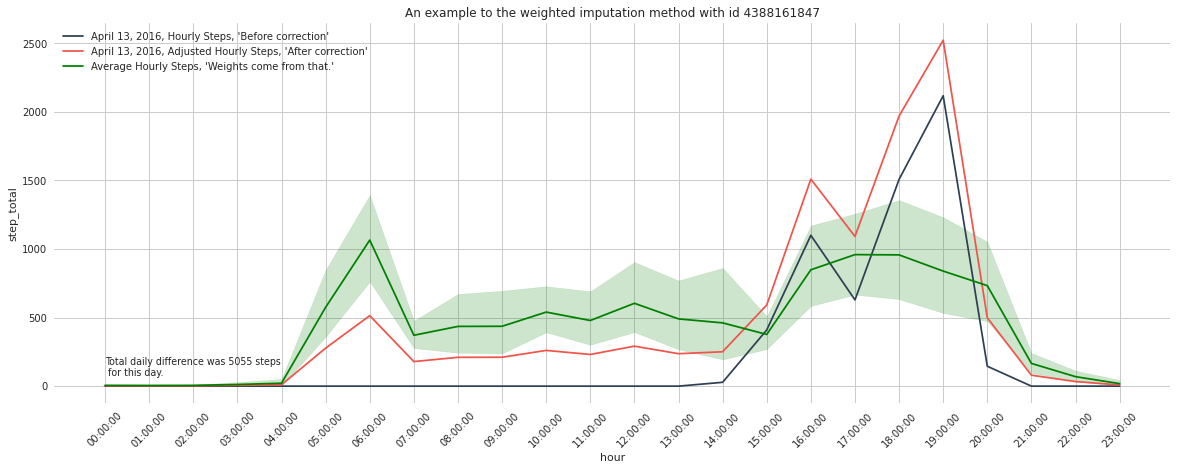

In [69]:
plt.figure(figsize=(20,7))
sns.set_style("whitegrid")
sns.lineplot(data=w_hourly_activity[(w_hourly_activity.id == "4388161847") & (w_hourly_activity.date == dt.date(2016, 4, 13))].sort_values("activity_hour"),
             x="hour", y="step_total", label="April 13, 2016, Hourly Steps, 'Before correction'", color="#2E4053")
sns.lineplot(data=w_hourly_activity[(w_hourly_activity.id == "4388161847") & (w_hourly_activity.date == dt.date(2016, 4, 13))].sort_values("activity_hour"),
             x="hour", y="adj_step_total", label = "April 13, 2016, Adjusted Hourly Steps, 'After correction'", color="#F0544A")
sns.lineplot(data=w_hourly_activity[(w_hourly_activity.id == "4388161847")].sort_values("activity_hour"),
             x="hour", y="step_total", label="Average Hourly Steps, 'Weights come from that.'", color="Green")
plt.xticks(rotation=45)
plt.title("An example to the weighted imputation method with id 4388161847")
plt.text(0, 75,'Total daily difference was 5055 steps\n for this day.', fontsize=9.5)
plt.show();

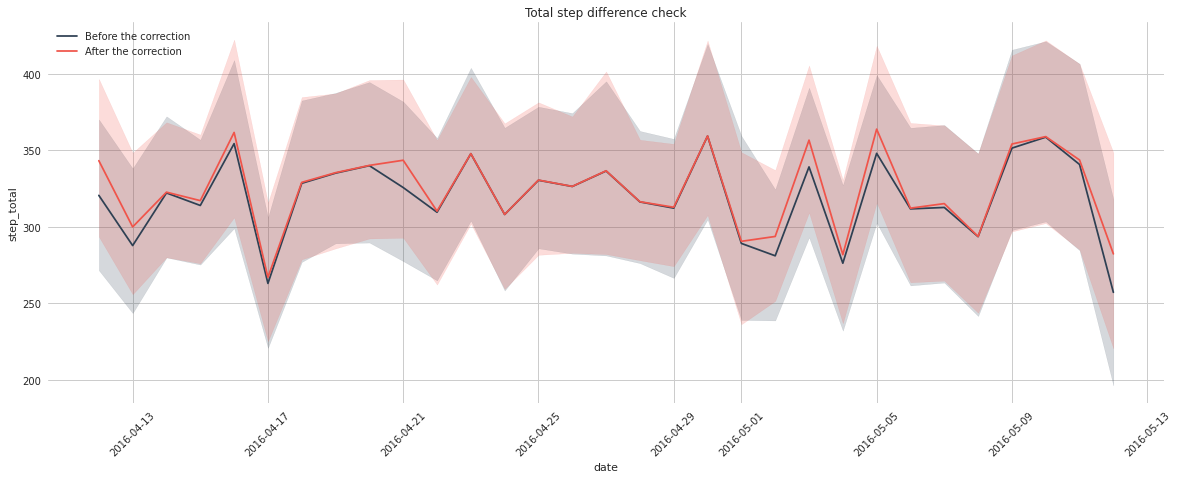

In [70]:
plt.figure(figsize=(20,7))
sns.set_style("whitegrid")
sns.lineplot(x="date",y="step_total", data=w_hourly_activity, label = "Before the correction", color="#2E4053")
sns.lineplot(x="date",y="adj_step_total", data=w_hourly_activity, label = "After the correction",color="#F0544A")
plt.xticks(rotation=45)
plt.title("Total step difference check")
plt.legend(loc='upper left')
plt.show();

In [71]:
#We are calculating minutely averages by id. 
minute_mean = minute_activity.groupby(["id","hour"]).mean().reset_index()[["id","hour","calories","steps"]]
minute_mean = minute_mean.rename(columns={"calories":"minute_mean_calories","steps":"minute_mean_steps"})
minute_mean.head()

,id,hour,minute_mean_calories,minute_mean_steps
0,1503960366,00:00:00,1.172229,6.133333
1,1503960366,00:01:00,1.266609,5.666667
2,1503960366,00:02:00,1.088607,3.333333
3,1503960366,00:03:00,1.203417,5.133333
4,1503960366,00:04:00,0.947139,1.166667


In [72]:
minute_mean_day = pd.merge(minute_activity, minute_mean, on=["id","hour"]).groupby(["id","date"]).sum().reset_index().rename(columns={"minute_mean_calories":"daily_mean_calories",
                                                                                                                                      "minute_mean_steps":"daily_mean_steps"})
minute_mean_day = minute_mean_day.drop(columns=["calories","intensity","steps","me_ts"])
minute_mean_day.head()

,id,date,daily_mean_calories,daily_mean_steps
0,1503960366,2016-04-12,1886.084901,12576.990805
1,1503960366,2016-04-13,1886.084901,12576.990805
2,1503960366,2016-04-14,1886.084901,12576.990805
3,1503960366,2016-04-15,1886.084901,12576.990805
4,1503960366,2016-04-16,1886.084901,12576.990805


In [73]:
minute_mean_minute = pd.merge(minute_activity, minute_mean, on=["id","hour"])
minute_mean_minute.head()

,id,activity_minute,date,hour,wday,calories,intensity,steps,me_ts,minute_mean_calories,minute_mean_steps
0,4057192912,2016-04-12 14:03:00+00:00,2016-04-12,14:03:00,Tuesday,7.15488,1,88,58,3.51576,33.25
1,4057192912,2016-04-13 14:03:00+00:00,2016-04-13,14:03:00,Wednesday,4.44096,1,45,36,3.51576,33.25
2,4057192912,2016-04-14 14:03:00+00:00,2016-04-14,14:03:00,Thursday,1.23360,0,0,10,3.51576,33.25
3,4057192912,2016-04-15 14:03:00+00:00,2016-04-15,14:03:00,Friday,1.23360,0,0,10,3.51576,33.25
4,4057192912,2016-04-12 11:28:00+00:00,2016-04-12,11:28:00,Tuesday,6.90816,1,85,56,4.44096,47.50


In [74]:
#Calculating weights.
minute_activity_weight = pd.merge(minute_mean_minute, minute_mean_day, on=["id","date"]).sort_values(["id","activity_minute"])
minute_activity_weight["weight_calories"] = minute_activity_weight.minute_mean_calories / minute_activity_weight.daily_mean_calories
minute_activity_weight["weight_steps"] = minute_activity_weight.minute_mean_steps / minute_activity_weight.daily_mean_steps
minute_activity_weight.head()

,id,activity_minute,date,hour,wday,calories,intensity,steps,me_ts,minute_mean_calories,minute_mean_steps,daily_mean_calories,daily_mean_steps,weight_calories,weight_steps
224115,1503960366,2016-04-12 00:00:00+00:00,2016-04-12,00:00:00,Tuesday,0.7865,0,0,10,1.172229,6.133333,1886.084901,12576.990805,0.000622,0.000488
223989,1503960366,2016-04-12 00:01:00+00:00,2016-04-12,00:01:00,Tuesday,0.7865,0,0,10,1.266609,5.666667,1886.084901,12576.990805,0.000672,0.000451
223744,1503960366,2016-04-12 00:02:00+00:00,2016-04-12,00:02:00,Tuesday,0.7865,0,0,10,1.088607,3.333333,1886.084901,12576.990805,0.000577,0.000265
223656,1503960366,2016-04-12 00:03:00+00:00,2016-04-12,00:03:00,Tuesday,0.7865,0,0,10,1.203417,5.133333,1886.084901,12576.990805,0.000638,0.000408
223819,1503960366,2016-04-12 00:04:00+00:00,2016-04-12,00:04:00,Tuesday,0.7865,0,0,10,0.947139,1.166667,1886.084901,12576.990805,0.000502,0.000093


In [75]:
#I have checked the code. 
(minute_activity_weight.groupby(["id","date"]).sum().reset_index().weight_calories < 0.99).sum()

0

In [76]:
w_minute_activity = pd.merge(minute_activity, minute_activity_weight[["id","activity_minute","weight_calories","weight_steps"]], on = ["id","activity_minute"])
w_minute_activity.head()

,id,activity_minute,date,hour,wday,calories,intensity,steps,me_ts,weight_calories,weight_steps
0,4057192912,2016-04-12 14:03:00+00:00,2016-04-12,14:03:00,Tuesday,7.15488,1,88,58,0.001642,0.008020
1,4057192912,2016-04-12 11:28:00+00:00,2016-04-12,11:28:00,Tuesday,6.90816,1,85,56,0.002074,0.011457
2,4057192912,2016-04-12 19:53:00+00:00,2016-04-12,19:53:00,Tuesday,6.41472,1,75,52,0.001383,0.006030
3,4057192912,2016-04-12 18:02:00+00:00,2016-04-12,18:02:00,Tuesday,6.90816,1,83,56,0.001460,0.006673
4,4057192912,2016-04-12 19:30:00+00:00,2016-04-12,19:30:00,Tuesday,5.18112,1,58,42,0.001191,0.004663


In [77]:
compounded = pd.merge(daily_activity[["id","date","total_steps","calories"]], minute_activity.groupby(["id","date"]).sum().reset_index(),on=["id","date"])
compounded["dif_total_step"] = compounded.total_steps - compounded.steps
compounded["dif_calori"] = compounded.calories_x - compounded.calories_y
compounded.head()

,id,date,total_steps,calories_x,calories_y,intensity,steps,me_ts,dif_total_step,dif_calori
0,1624580081,2016-04-12,8163,1432,1432.145366,146,8163,17234,0,-0.145366
1,1844505072,2016-04-12,6697,2030,2030.843320,339,6697,21704,0,-0.843320
2,1927972279,2016-04-12,678,2220,2193.219415,55,678,15599,0,26.780585
3,3372868164,2016-04-12,4747,1788,1788.106539,280,4747,19118,0,-0.106539
4,4057192912,2016-04-12,5394,2286,2274.018267,164,5394,18434,0,11.981733


In [78]:
w_minute_activity = pd.merge(w_minute_activity, compounded[["id","date","dif_total_step","dif_calori"]],on=["id","date"],how="left")

In [79]:
w_minute_activity["adj_steps"] = w_minute_activity.steps + (w_minute_activity.dif_total_step * w_minute_activity.weight_steps)
w_minute_activity["adj_calories"] = w_minute_activity.calories + (w_minute_activity.dif_calori * w_minute_activity.weight_steps)
w_minute_activity["id"] = w_minute_activity.id.astype("string")
w_minute_activity["wday"] = w_minute_activity.wday.astype("string")
w_minute_activity["hour"] = pd.to_datetime(w_minute_activity["activity_minute"]).dt.strftime('%H:%M:%S')
w_minute_activity.head()

,id,activity_minute,date,hour,wday,calories,intensity,steps,me_ts,weight_calories,weight_steps,dif_total_step,dif_calori,adj_steps,adj_calories
0,4057192912,2016-04-12 14:03:00+00:00,2016-04-12,14:03:00,Tuesday,7.15488,1,88,58,0.001642,0.008020,0,11.981733,88.0,7.250969
1,4057192912,2016-04-12 11:28:00+00:00,2016-04-12,11:28:00,Tuesday,6.90816,1,85,56,0.002074,0.011457,0,11.981733,85.0,7.045430
2,4057192912,2016-04-12 19:53:00+00:00,2016-04-12,19:53:00,Tuesday,6.41472,1,75,52,0.001383,0.006030,0,11.981733,75.0,6.486967
3,4057192912,2016-04-12 18:02:00+00:00,2016-04-12,18:02:00,Tuesday,6.90816,1,83,56,0.001460,0.006673,0,11.981733,83.0,6.988114
4,4057192912,2016-04-12 19:30:00+00:00,2016-04-12,19:30:00,Tuesday,5.18112,1,58,42,0.001191,0.004663,0,11.981733,58.0,5.236991


In [80]:
w_minute_activity[w_minute_activity.date == dt.date(2016, 4, 13)]

,id,activity_minute,date,hour,wday,calories,intensity,steps,me_ts,weight_calories,weight_steps,dif_total_step,dif_calori,adj_steps,adj_calories
47520,4057192912,2016-04-13 07:42:00+00:00,2016-04-13,07:42:00,Wednesday,5.18112,1,58,42,0.001037,0.003497,0,15.698214,58.0,5.236021
47521,4057192912,2016-04-13 07:14:00+00:00,2016-04-13,07:14:00,Wednesday,5.42784,1,66,44,0.001066,0.003980,0,15.698214,66.0,5.490314
47522,4057192912,2016-04-13 18:36:00+00:00,2016-04-13,18:36:00,Wednesday,6.66144,1,80,54,0.001421,0.006432,0,15.698214,80.0,6.762407
47523,4057192912,2016-04-13 07:25:00+00:00,2016-04-13,07:25:00,Wednesday,6.16800,1,71,50,0.001152,0.004281,0,15.698214,71.0,6.235207
47524,4057192912,2016-04-13 09:25:00+00:00,2016-04-13,09:25:00,Wednesday,4.93440,1,56,40,0.001700,0.007417,0,15.698214,56.0,5.050828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95035,8253242879,2016-04-13 21:54:00+00:00,2016-04-13,21:54:00,Wednesday,3.56904,1,30,36,0.000642,0.000301,0,-0.113667,30.0,3.569006
95036,8253242879,2016-04-13 14:28:00+00:00,2016-04-13,14:28:00,Wednesday,3.56904,1,43,36,0.001149,0.002285,0,-0.113667,43.0,3.568780
95037,8253242879,2016-04-13 12:33:00+00:00,2016-04-13,12:33:00,Wednesday,3.56904,2,105,36,0.000974,0.002236,0,-0.113667,105.0,3.568786
95038,8253242879,2016-04-13 13:56:00+00:00,2016-04-13,13:56:00,Wednesday,3.56904,1,31,36,0.001196,0.003545,0,-0.113667,31.0,3.568637


In [81]:
w_minute_activity[(w_minute_activity.id == "4388161847") & (w_minute_activity.date == dt.date(2016, 4, 13))]

,id,activity_minute,date,hour,wday,calories,intensity,steps,me_ts,weight_calories,weight_steps,dif_total_step,dif_calori,adj_steps,adj_calories
60480,4388161847,2016-04-13 19:45:00+00:00,2016-04-13,19:45:00,Wednesday,5.21720,1,51,40,0.000831,0.000977,5055,581.744279,55.938263,5.785510
60481,4388161847,2016-04-13 18:23:00+00:00,2016-04-13,18:23:00,Wednesday,5.47806,1,46,42,0.001004,0.001690,5055,581.744279,54.541426,6.461032
60482,4388161847,2016-04-13 18:34:00+00:00,2016-04-13,18:34:00,Wednesday,6.26064,2,69,48,0.001204,0.002161,5055,581.744279,79.922087,7.517586
60483,4388161847,2016-04-13 18:43:00+00:00,2016-04-13,18:43:00,Wednesday,7.56494,1,66,58,0.001007,0.001798,5055,581.744279,75.088334,8.610852
60484,4388161847,2016-04-13 19:21:00+00:00,2016-04-13,19:21:00,Wednesday,5.73892,2,45,44,0.000942,0.001384,5055,581.744279,51.997213,6.544180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61915,4388161847,2016-04-13 19:07:00+00:00,2016-04-13,19:07:00,Wednesday,4.95634,1,32,38,0.000898,0.001117,5055,581.744279,37.646027,5.606101
61916,4388161847,2016-04-13 19:16:00+00:00,2016-04-13,19:16:00,Wednesday,4.95634,1,28,38,0.001021,0.001543,5055,581.744279,35.801490,5.854158
61917,4388161847,2016-04-13 19:08:00+00:00,2016-04-13,19:08:00,Wednesday,4.95634,1,36,38,0.000872,0.001056,5055,581.744279,41.340402,5.570929
61918,4388161847,2016-04-13 18:26:00+00:00,2016-04-13,18:26:00,Wednesday,4.95634,1,29,38,0.001128,0.001976,5055,581.744279,38.989125,6.105918


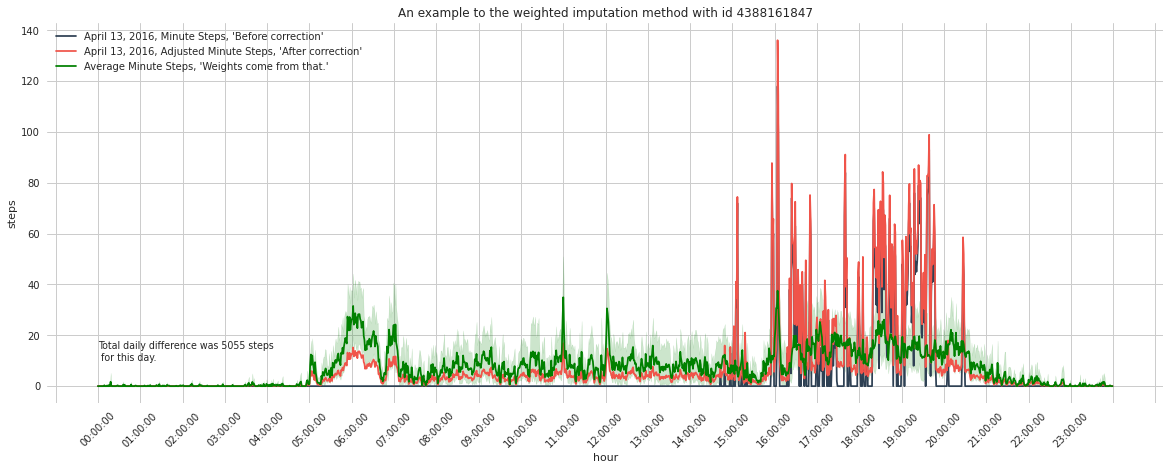

In [82]:

plt.figure(figsize=(20,7))
sns.set_style("whitegrid")
sns.lineplot(data=w_minute_activity[(w_minute_activity.id == "4388161847") & (w_minute_activity.date == dt.date(2016, 4, 13))].sort_values("activity_minute"),
             x="hour", y="steps", label="April 13, 2016, Minute Steps, 'Before correction'", color="#2E4053").xaxis.set_major_locator(ticker.MultipleLocator(60))
sns.lineplot(data=w_minute_activity[(w_minute_activity.id == "4388161847") & (w_minute_activity.date == dt.date(2016, 4, 13))].sort_values("activity_minute"),
             x="hour", y="adj_steps", label = "April 13, 2016, Adjusted Minute Steps, 'After correction'", color="#F0544A").xaxis.set_major_locator(ticker.MultipleLocator(60))
sns.lineplot(data=w_minute_activity[(w_minute_activity.id == "4388161847")].sort_values("activity_minute"),
             x="hour", y="steps", label="Average Minute Steps, 'Weights come from that.'", color="Green").xaxis.set_major_locator(ticker.MultipleLocator(60))
plt.xticks(rotation=45)
plt.title("An example to the weighted imputation method with id 4388161847")
plt.text(0, 10,'Total daily difference was 5055 steps\n for this day.', fontsize=9.5)
plt.legend(loc='upper left')
plt.show();

### Check after the imputation

At the end of the imputation, the total step and calories are nearly the same. And there is not statistically difference between groups.

In [83]:
print("Sum of the daily total steps\t\t\t\t\t",(daily_activity.total_steps.sum()))
print("Sum of the hourly total steps before the imputation\t\t", (w_hourly_activity.step_total.sum()))
print("Sum of the hourly total steps after the imputation\t\t", (w_hourly_activity.adj_step_total.sum()))
print("Sum of the minute total steps before the imputation\t\t",(w_minute_activity.steps.sum()))
print("Sum of the minute total steps after the imputation\t\t",(w_minute_activity.adj_steps.sum()))

Sum of the daily total steps					 7178890
Sum of the hourly total steps before the imputation		 7075356
Sum of the hourly total steps after the imputation		 7178890.0
Sum of the minute total steps before the imputation		 7073549
Sum of the minute total steps after the imputation		 7178890.0


In [84]:
print("Sum of the daily calories\t\t\t\t\t",(daily_activity.calories.sum()))
print("Sum of the hourly calories before the imputation\t\t", (w_hourly_activity.calories.sum()))
print("Sum of the hourly calories after the imputation\t\t\t", (w_hourly_activity.adj_calories.sum()))
print("Sum of the minute calories before the imputation\t\t",(w_minute_activity.calories.sum()))
print("Sum of the minute calories after the imputation\t\t\t",(w_minute_activity.adj_calories.sum()))

Sum of the daily calories					 2165284
Sum of the hourly calories before the imputation		 2152150
Sum of the hourly calories after the imputation			 2165284.0
Sum of the minute calories before the imputation		 2151588.0193890333
Sum of the minute calories after the imputation			 2165164.0


### Cross-check within the intensity minutes between daily, hourly and minute datas

In [85]:
daily_intensity_check = """
SELECT
minute.id,
minute.date,
minute.very_active,
daily.very_active_minutes,
minute.moderate,
daily.fairly_active_minutes,
minute.light,
daily.lightly_active_minutes,
minute.sedentary,
daily.sedentary_minutes,
(daily.sedentary_minutes + daily.lightly_active_minutes + daily.fairly_active_minutes + daily.very_active_minutes ) AS sum_daily,
(minute.very_active + minute.light + minute.moderate + minute.sedentary) AS sum_minute
FROM (WITH piv AS (
    SELECT * 
    FROM `fitbit-348610.fitbit.minute_activity` 
    PIVOT
    ( 
    COUNT(intensity)
    FOR intensity IN (0 AS sedentary,1 AS light,2 AS moderate,3 AS very_active)
    ))
    SELECT id, 
    date, 
    SUM(very_active) AS very_active,
    SUM(moderate) AS moderate,
    SUM(light) AS light,
    SUM(sedentary) AS sedentary 
    FROM piv
    GROUP BY id, date
    ) AS minute
    LEFT JOIN `fitbit-348610.fitbit.daily_activity` AS daily
    ON minute.id = daily.id AND minute.date = daily.activity_date
"""
# Set up the query
query_job5 = bigquery_client.query(daily_intensity_check)

# Make an API request  to run the query and return a pandas DataFrame
daily_intensity_check = query_job5.to_dataframe()
daily_intensity_check.id = daily_intensity_check.id.astype("string")
# See the resulting table made from the query
print(daily_intensity_check.info())
daily_intensity_check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      934 non-null    string
 1   date                    934 non-null    object
 2   very_active             934 non-null    int64 
 3   very_active_minutes     934 non-null    int64 
 4   moderate                934 non-null    int64 
 5   fairly_active_minutes   934 non-null    int64 
 6   light                   934 non-null    int64 
 7   lightly_active_minutes  934 non-null    int64 
 8   sedentary               934 non-null    int64 
 9   sedentary_minutes       934 non-null    int64 
 10  sum_daily               934 non-null    int64 
 11  sum_minute              934 non-null    int64 
dtypes: int64(10), object(1), string(1)
memory usage: 87.7+ KB
None


,id,date,very_active,very_active_minutes,moderate,fairly_active_minutes,light,lightly_active_minutes,sedentary,sedentary_minutes,sum_daily,sum_minute
0,4057192912,2016-04-15,3,3,6,6,86,88,865,873,970,960
1,4057192912,2016-04-13,0,0,0,0,160,160,1280,1280,1440,1440
2,4057192912,2016-04-12,0,0,0,0,164,164,1276,1276,1440,1440
3,4057192912,2016-04-14,0,0,0,0,0,0,1440,1440,1440,1440
4,8053475328,2016-05-06,90,90,15,15,90,90,1245,1245,1440,1440
...,...,...,...,...,...,...,...,...,...,...,...,...
929,8253242879,2016-04-13,35,35,11,11,96,96,1298,1298,1440,1440
930,8253242879,2016-04-19,0,0,0,0,164,164,1276,1276,1440,1440
931,8253242879,2016-04-20,5,5,18,18,216,216,1201,1201,1440,1440
932,8253242879,2016-04-28,11,11,16,16,20,20,1393,1393,1440,1440


> ### *Question 4: Is the difference within groups statistically significant?**

In [86]:
columns = daily_intensity_check.iloc[:,2:].columns
for column in columns:
    stat, p = shapiro(daily_intensity_check[column])
    print("Statistics= ",stat,"p= ",p, get_asterisks_for_pval(p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(column,'Sample looks Gaussian (fail to reject H0)')
    else:
        print(column,'Sample does not look Gaussian (reject H0)')

Statistics=  0.6987314224243164 p=  7.781841972322721e-38 ****
very_active Sample does not look Gaussian (reject H0)
Statistics=  0.6999404430389404 p=  8.843428694615744e-38 ****
very_active_minutes Sample does not look Gaussian (reject H0)
Statistics=  0.7064474821090698 p=  1.772715873306547e-37 ****
moderate Sample does not look Gaussian (reject H0)
Statistics=  0.7064977884292603 p=  1.782363084558222e-37 ****
fairly_active_minutes Sample does not look Gaussian (reject H0)
Statistics=  0.9778409600257874 p=  1.0135828981683304e-10 ****
light Sample does not look Gaussian (reject H0)
Statistics=  0.9779922366142273 p=  1.1314219006131054e-10 ****
lightly_active_minutes Sample does not look Gaussian (reject H0)
Statistics=  0.8916946649551392 p=  4.444284074796071e-25 ****
sedentary Sample does not look Gaussian (reject H0)
Statistics=  0.9521536827087402 p=  7.274187925610903e-17 ****
sedentary_minutes Sample does not look Gaussian (reject H0)
Statistics=  0.7775644063949585 p=  9.

In [87]:
#perform Kruskal-Wallis Test 
from_daily_data = ("very_active_minutes","fairly_active_minutes","lightly_active_minutes","sedentary_minutes")
from_minute_data = ("very_active","moderate","light","sedentary")
for daily, minute in zip(from_daily_data,from_minute_data):
    statistic, p = stats.kruskal(daily_intensity_check[daily],daily_intensity_check[minute])
    alpha = 0.05
    if p > alpha:
        print("There is not any statistical difference between minute data and daily data on",daily,'column (fail to reject H0)')
        print("p:",round(p,4), get_asterisks_for_pval(p))
    else:
        print("There is a statistical difference between minute data and daily data on",daily,'column (reject H0)')
        print("p:",round(p,4), get_asterisks_for_pval(p))

There is not any statistical difference between minute data and daily data on very_active_minutes column (fail to reject H0)
p: 0.9388 'not significant'
There is not any statistical difference between minute data and daily data on fairly_active_minutes column (fail to reject H0)
p: 0.9877 'not significant'
There is not any statistical difference between minute data and daily data on lightly_active_minutes column (fail to reject H0)
p: 0.9398 'not significant'
There is a statistical difference between minute data and daily data on sedentary_minutes column (reject H0)
p: 0.0 ****


> ### *Answer 4: The difference between daily and minute intensity datas is statistically significant.*

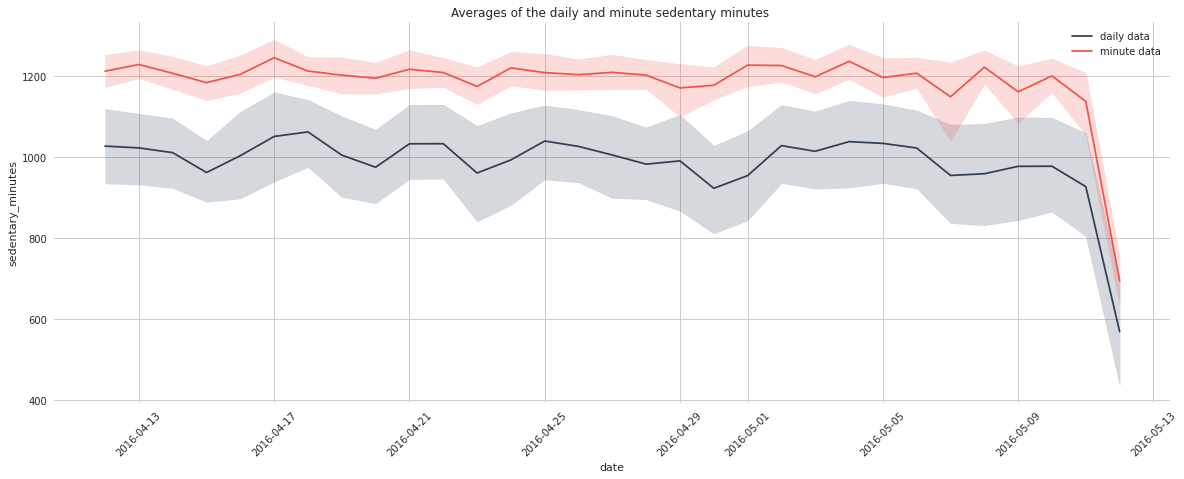

In [88]:
plt.figure(figsize=(20,7))
sns.set_style("whitegrid")
sns.lineplot(x="date",y="sedentary_minutes", data=daily_intensity_check, label = "daily data",color="#2E4053")
sns.lineplot(x="date",y="sedentary", data=daily_intensity_check, label = "minute data",color="#F0544A")
plt.xticks(rotation=45)
plt.title("Averages of the daily and minute sedentary minutes ");

**There is a statistical difference between daily and minutely sedentary minutes. Minutely data seems more correct. I will transfer the intensity datas from minute data.**

In [89]:
daily_activity = pd.merge(daily_activity.reset_index(drop=True), daily_intensity_check[["id","date","very_active","moderate","light","sedentary"]], on=["id","date"] )

#### Hourly Intensity Check from Minute data.

In [90]:
hourly_intensity_check = """
WITH hourly AS (
    SELECT *,
    EXTRACT(HOUR FROM hour) AS hour_ex
    FROM `fitbit-348610.fitbit.hourly_activity`
)
SELECT
hourly.id,
hourly.activity_hour,
hourly.date,
hourly.hour,
hourly.total_intensity AS intensity_from_hourly,
minutely.intensity AS intensity_from_minute
FROM hourly
INNER JOIN (
    SELECT
    id,
    date,
    SUM(intensity) AS intensity,
    EXTRACT(HOUR FROM hour ) AS hour,
    FROM `fitbit-348610.fitbit.minute_activity`
    GROUP BY id, date, hour
    ) AS minutely
    ON hourly.id = minutely.id AND hourly.date = minutely.date AND hourly.hour_ex = minutely.hour
"""
# Set up the query
query_job6 = bigquery_client.query(hourly_intensity_check)

# Make an API request  to run the query and return a pandas DataFrame
hourly_intensity_check = query_job6.to_dataframe()
# See the resulting table made from the query
print(hourly_intensity_check.info())
hourly_intensity_check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22093 entries, 0 to 22092
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     22093 non-null  int64              
 1   activity_hour          22093 non-null  datetime64[ns, UTC]
 2   date                   22093 non-null  object             
 3   hour                   22093 non-null  object             
 4   intensity_from_hourly  22093 non-null  int64              
 5   intensity_from_minute  22093 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 1.0+ MB
None


,id,activity_hour,date,hour,intensity_from_hourly,intensity_from_minute
0,3977333714,2016-04-15 16:00:00+00:00,2016-04-15,16:00:00,88,88
1,4388161847,2016-04-15 16:00:00+00:00,2016-04-15,16:00:00,37,37
2,4445114986,2016-04-15 16:00:00+00:00,2016-04-15,16:00:00,38,38
3,5553957443,2016-04-15 16:00:00+00:00,2016-04-15,16:00:00,84,84
4,6117666160,2016-04-15 16:00:00+00:00,2016-04-15,16:00:00,46,46
...,...,...,...,...,...,...
22088,7086361926,2016-05-04 18:00:00+00:00,2016-05-04,18:00:00,34,34
22089,6290855005,2016-05-04 09:00:00+00:00,2016-05-04,09:00:00,34,34
22090,6117666160,2016-05-04 20:00:00+00:00,2016-05-04,20:00:00,34,34
22091,2320127002,2016-05-11 17:00:00+00:00,2016-05-11,17:00:00,34,34


There is no any difference between hourly and minutely datas. 

In [91]:
hourly_intensity_check[hourly_intensity_check.intensity_from_hourly != hourly_intensity_check.intensity_from_minute]

,id,activity_hour,date,hour,intensity_from_hourly,intensity_from_minute


# 5.Exploratory Data Analysis

> ### *Question 5: What is the daily, hourly, minutely group metrics?*

### Daily Activity
The decriptive statistics for daily_activity

In [92]:
#Daily descriptive statistics
daily = daily_activity.drop(columns = daily_activity.loc[:,"tracker_distance":"sedentary_minutes"])
#Weekend column
daily["weekend"] = np.where((daily.wday == "Saturday") | (daily.wday == "Sunday"),"Yes","No")
daily_describe = daily.describe().round(decimals=1).T
daily_describe["IQR"] = daily_describe["75%"] - daily_describe["25%"]
for i in daily_describe.T.columns:
    a,b = sms.DescrStatsW(daily[i]).tconfint_mean(alpha=0.05)
    daily_describe.loc[i,"95% CI min"] = a
    daily_describe.loc[i,"95% CI max"] = b   
daily_describe

,count,mean,std,min,25%,50%,75%,max,IQR,95% CI min,95% CI max
total_steps,934.0,7686.2,5067.5,0.0,3843.2,7447.0,10734.5,36019.0,6891.3,7360.766176,8011.589285
total_distance,934.0,5.5,3.9,0.0,2.7,5.3,7.7,28.0,5.0,5.273153,5.775712
calories,934.0,2318.3,696.6,120.0,1837.2,2148.5,2795.5,4900.0,958.3,2273.557986,2363.024455
very_active,934.0,21.2,32.9,0.0,0.0,4.0,32.0,210.0,32.0,19.126508,23.353149
moderate,934.0,13.6,20.0,0.0,0.0,7.0,19.0,143.0,19.0,12.364070,14.935716
light,934.0,193.7,108.6,0.0,127.0,199.0,263.0,518.0,136.0,186.698116,200.648780
sedentary,934.0,1190.7,154.2,60.0,1115.2,1185.0,1276.0,1440.0,160.8,1180.783675,1200.591057


<br> We should look the columns median and IQR except calories. Because only calories seem normally distributed. As we can see below.

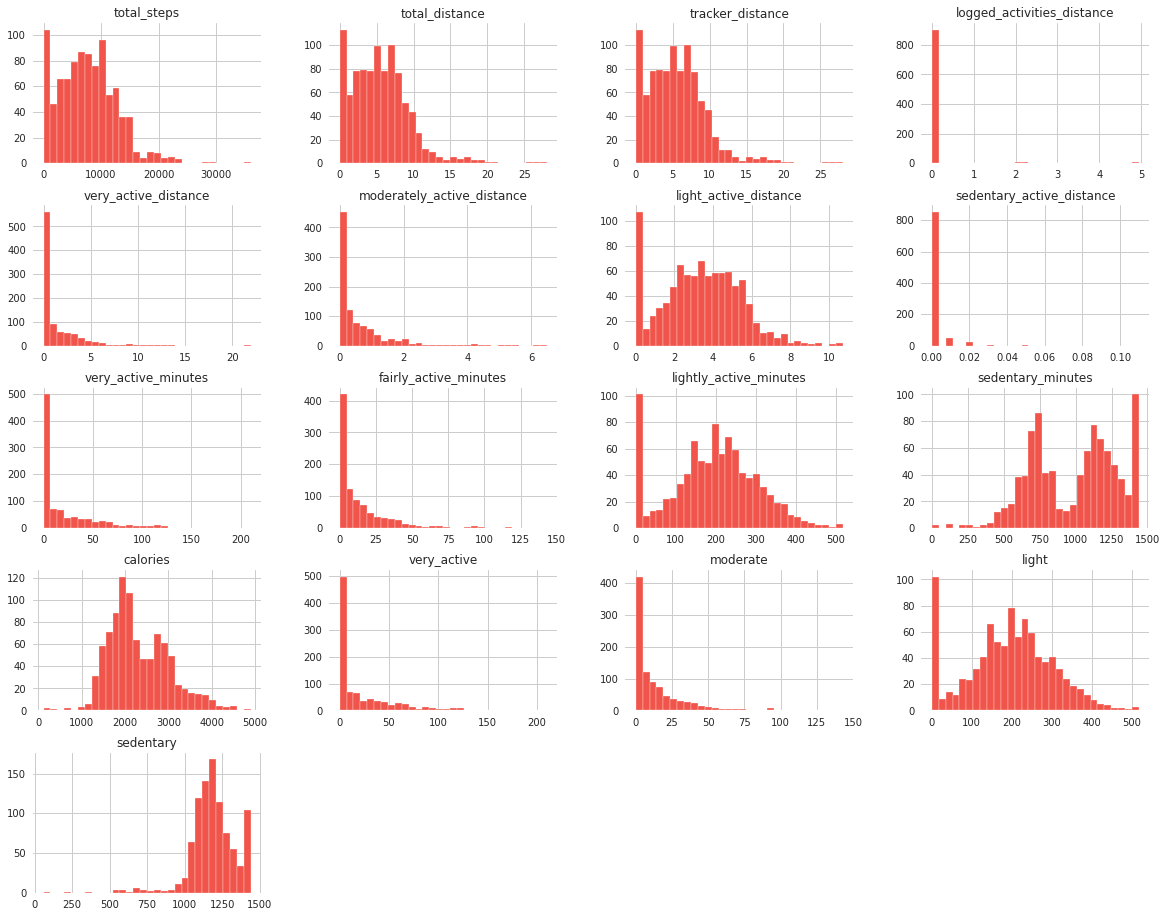

In [93]:
daily_activity.hist(figsize=(20,16), bins=30, color= "#F0544A");

In [94]:
#Hourly descriptive statistics
hourly = w_hourly_activity.drop(columns=["step_total","weight_calories","weight_steps","dif_total_step","dif_calori"])
hourly = hourly.fillna(0)
hourly_describe = hourly.describe().round(decimals=1).T
hourly_describe["IQR"] = hourly_describe["75%"] - hourly_describe["25%"]
for i in hourly_describe.T.columns:
    a,b = sms.DescrStatsW(hourly[i]).tconfint_mean(alpha=0.05)
    hourly_describe.loc[i,"95% CI min"] = a
    hourly_describe.loc[i,"95% CI max"] = b   
hourly_describe

,count,mean,std,min,25%,50%,75%,max,IQR,95% CI min,95% CI max
calories,22099.0,97.4,60.7,42.0,63.0,83.0,108.0,948.0,45.0,96.586386,98.187134
total_intensity,22099.0,12.0,21.1,0.0,0.0,3.0,16.0,180.0,16.0,11.756697,12.313985
average_intensity,22099.0,0.2,0.4,0.0,0.0,0.0,0.3,3.0,0.3,0.195945,0.205233
adj_step_total,22099.0,324.9,691.7,0.0,0.0,48.0,366.0,10556.1,366.0,315.731330,333.971372
adj_calories,22099.0,98.0,60.9,41.9,64.0,82.8,109.2,948.5,45.2,97.178544,98.783627


#### Daytime (between 05 AM - 11 PM) descriptive statistic

In [95]:
#Daily daytime(between 5 AM - 11 PM) descriptive statistics.
daytime = hourly[(hourly.hour > '05:00:00') & (hourly.hour <= '23:00:00')]
daytime_daily = daytime.groupby(["id","date"]).sum()
daytime_daily = daytime_daily.drop(columns=["average_intensity","total_intensity","calories"])
daily_daytime_describe = daytime_daily.describe().round(decimals=1).T
daily_daytime_describe["IQR"] = daily_daytime_describe["75%"] - daily_daytime_describe["25%"]
for i in daily_daytime_describe.T.columns:
    a,b = sms.DescrStatsW(daytime_daily[i]).tconfint_mean(alpha=0.05)
    daily_daytime_describe.loc[i,"95% CI min"] = a
    daily_daytime_describe.loc[i,"95% CI max"] = b   
daily_daytime_describe

,count,mean,std,min,25%,50%,75%,max,IQR,95% CI min,95% CI max
adj_step_total,931.0,7562.2,5027.5,0.0,3758.1,7303.0,10687.9,34058.0,6929.8,7238.863962,7885.594487
adj_calories,931.0,1893.2,611.7,303.2,1472.3,1757.2,2327.8,4082.8,855.5,1853.888723,1932.581542


In [96]:
fig = go.Figure(data=go.Heatmap(
        z=daily_activity.total_steps,
        x=daily_activity.date,
        y=daily_activity.id,
        zmin = 0,
        zmax= 20000,colorscale = 'RdBu_r'))
order = daily_activity.groupby("id").mean().sort_values("total_steps", ascending=True).reset_index().id.tolist()
fig.update_layout(
    title='Daily Total Steps',
    autosize=False,
    width=1000,
    height=1000,
    yaxis={'categoryorder':'array', 'categoryarray':order},
    plot_bgcolor="rgb(192,192,192)")

In [97]:
fig = go.Figure(data=go.Heatmap(
        z=daily_activity.calories,
        x=daily_activity.date,
        y=daily_activity.id,colorscale = 'RdBu_r', zmin=1000, zmax=4500))
order = daily_activity.groupby("id").mean().sort_values("calories", ascending=True).reset_index().id.tolist()
fig.update_layout(
    title='Daily Calories',
    autosize=False,
    width=1000,
    height=1000,
    yaxis={'categoryorder':'array', 'categoryarray':order},
    plot_bgcolor="rgb(192,192,192)")

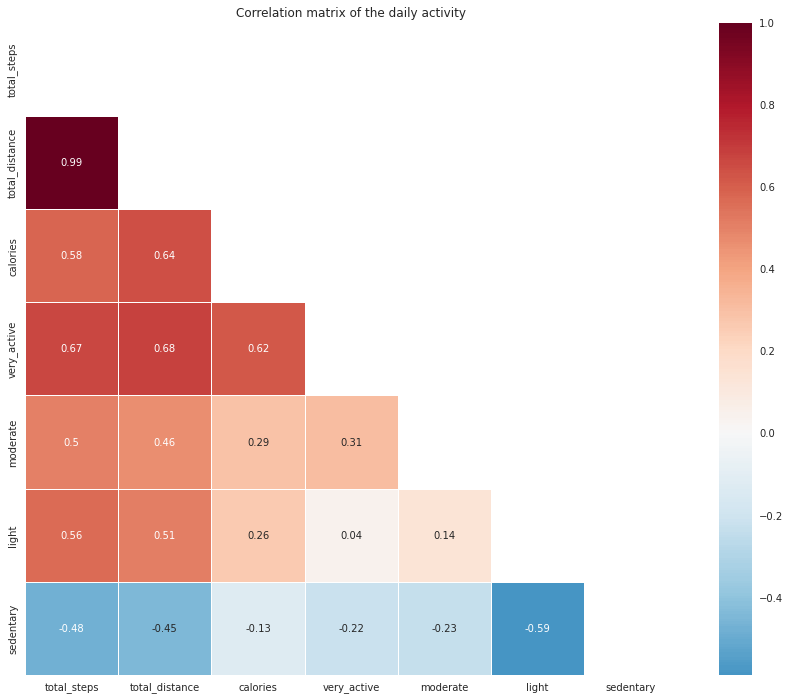

In [98]:
# Compute the correlation matrix
corr = daily.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="RdBu_r", vmax=1, center=0,
            square=True,annot=True,annot_kws={"fontsize":10}, linewidths=.5)
plt.title("Correlation matrix of the daily activity");

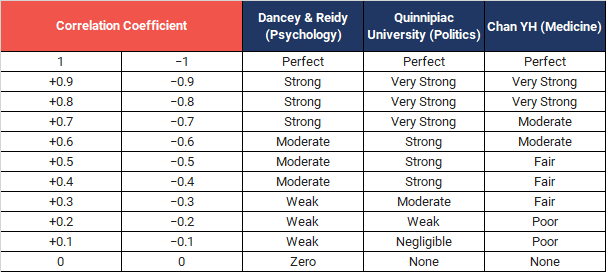
<br>When we look at the correlation coefficieents, most of the results can be guessed. But light activity minutes and sedentary minutes has fairly negative correlation. We can assume that even light acivities better than being sedentary. (Correlation coefficient table is coming from [doi:10.1016/j.tjem.2018.08.001](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/)

In [99]:
w_minute_activity.describe().round(decimals=1).T

,count,mean,std,min,25%,50%,75%,max
calories,1325580.0,1.6,1.4,0.0,0.9,1.2,1.4,19.7
intensity,1325580.0,0.2,0.5,0.0,0.0,0.0,0.0,3.0
steps,1325580.0,5.3,18.1,0.0,0.0,0.0,0.0,220.0
me_ts,1325580.0,14.7,12.1,0.0,10.0,10.0,11.0,157.0
weight_calories,1325580.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
weight_steps,1325520.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
dif_total_step,1325580.0,109.4,883.8,0.0,0.0,0.0,0.0,12015.0
dif_calori,1325580.0,13.7,118.8,-75.6,-0.7,-0.4,-0.1,2533.3
adj_steps,1325520.0,5.4,18.2,0.0,0.0,0.0,0.0,220.0
adj_calories,1325520.0,1.6,1.4,0.0,0.9,1.2,1.4,19.7


> ### *Question 6: Which parts of the day and the week is most active?*

#### Weekend / Weekday descriptive statistics.

In [100]:
daily.groupby("weekend").describe().T

weekend                         No           Yes
total_steps    count    690.000000    244.000000
               mean    7723.188406   7581.516393
               std     4781.520100   5810.071732
               min        0.000000      0.000000
               25%     4029.000000   3474.500000
               50%     7846.500000   6716.000000
               75%    10768.750000  10554.000000
               max    23629.000000  36019.000000
total_distance count    690.000000    244.000000
               mean       5.544275      5.468320
               std        3.668647      4.541531
               min        0.000000      0.000000
               25%        2.747500      2.337500
               50%        5.415000      4.635000
               75%        7.727500      7.710000
               max       20.650000     28.030001
calories       count    690.000000    244.000000
               mean    2318.036232   2319.012295
               std      679.836570    743.467067
               min      257.000000    120.000000
               25%     1842.250000   1792.750000
               50%     2171.500000   2100.500000
               75%     2803.000000   2739.500000
               max     4900.000000   4552.000000
very_active    count    690.000000    244.000000
               mean      21.307246     21.049180
               std       30.173106     39.711377
               min        0.000000      0.000000
               25%        0.000000      0.000000
               50%        5.000000      2.000000
               75%       34.000000     28.250000
               max      137.000000    210.000000
moderate       count    690.000000    244.000000
               mean      13.197101     14.930328
               std       18.688851     23.385463
               min        0.000000      0.000000
               25%        0.000000      0.000000
               50%        8.000000      3.500000
               75%       19.000000     21.000000
               max      143.000000    125.000000
light          count    690.000000    244.000000
               mean     194.449275    191.479508
               std      107.628930    111.586149
               min        0.000000      0.000000
               25%      128.250000    126.500000
               50%      199.000000    199.500000
               75%      266.750000    258.000000
               max      513.000000    518.000000
sedentary      count    690.000000    244.000000
               mean    1186.872464   1201.475410
               std      153.834203    155.138765
               min      238.000000     60.000000
               25%     1112.000000   1116.750000
               50%     1182.000000   1192.000000
               75%     1264.750000   1293.500000
               max     1440.000000   1440.000000

In [101]:
fig = go.Figure()

weekends = ["Yes","No"]

for weekend in weekends:
    fig.add_trace(go.Violin(x=daily['weekend'][daily['weekend'] == weekend],
                            y=daily['calories'][daily['weekend'] == weekend],
                            name=weekend,
                            box_visible=True,
                            meanline_visible=True))

fig.update_layout(title='Weekend - Weekday Calories')

fig.show()

In [102]:
columns = daily.iloc[:,2:].drop(columns=["wday","weekend"]).columns
for column in columns:
    stat, p = shapiro(daily[column])
    print("Statistics= ",stat,"p= ",p, get_asterisks_for_pval(p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(column,'looks Gaussian (fail to reject H0)')
    else:
        print(column,'does not look Gaussian (reject H0)')

Statistics=  0.9627289175987244 p=  1.058352336297903e-14 ****
total_steps does not look Gaussian (reject H0)
Statistics=  0.9309042692184448 p=  2.416332378849915e-20 ****
total_distance does not look Gaussian (reject H0)
Statistics=  0.9654519557952881 p=  4.460087559151303e-14 ****
calories does not look Gaussian (reject H0)
Statistics=  0.6987314224243164 p=  7.781841972322721e-38 ****
very_active does not look Gaussian (reject H0)
Statistics=  0.7064474821090698 p=  1.772715873306547e-37 ****
moderate does not look Gaussian (reject H0)
Statistics=  0.9778409600257874 p=  1.0135828981683304e-10 ****
light does not look Gaussian (reject H0)
Statistics=  0.8916946649551392 p=  4.444284074796071e-25 ****
sedentary does not look Gaussian (reject H0)


In [103]:
#I will perform Kruskal-Wallis Test. Because the groups are not normally distributed.
for column in columns:
    statistic, p = stats.kruskal(daily[daily.weekend == "Yes"][column],daily[daily.weekend == "No"][column])
    alpha = 0.05
    if p > alpha:
        print("There is not any statistical difference between weekend and weekdays on",column,'column (fail to reject H0)')
        print("p:",round(p,4), get_asterisks_for_pval(p))
    else:
        print("There is a statistical difference between weekend and weekdays on",column,'column (reject H0)')
        print("p:",round(p,4), get_asterisks_for_pval(p))

There is not any statistical difference between weekend and weekdays on total_steps column (fail to reject H0)
p: 0.1425 'not significant'
There is not any statistical difference between weekend and weekdays on total_distance column (fail to reject H0)
p: 0.1239 'not significant'
There is not any statistical difference between weekend and weekdays on calories column (fail to reject H0)
p: 0.4793 'not significant'
There is not any statistical difference between weekend and weekdays on very_active column (fail to reject H0)
p: 0.0744 'not significant'
There is not any statistical difference between weekend and weekdays on moderate column (fail to reject H0)
p: 0.3638 'not significant'
There is not any statistical difference between weekend and weekdays on light column (fail to reject H0)
p: 0.774 'not significant'
There is not any statistical difference between weekend and weekdays on sedentary column (fail to reject H0)
p: 0.2199 'not significant'


> ### *There is not any statistically sigfinicant difference between weekend and weekdays.*

#### Week of day basis means

In [104]:
daily.groupby("wday").mean().sort_values("calories", ascending=False).T

wday,Tuesday,Saturday,Friday,Monday,Wednesday,Sunday,Thursday
total_steps,8233.340000,8219.260163,7448.230159,7780.866667,7605.100671,6933.231405,7507.986207
total_distance,5.910000,5.902276,5.309921,5.552917,5.521812,5.027190,5.385517
calories,2387.046667,2374.113821,2331.785714,2324.208333,2317.724832,2263.000000,2229.910345
very_active,23.260000,22.097561,19.674603,23.108333,20.892617,19.983471,19.641379
moderate,14.526667,15.325203,12.126984,14.000000,13.187919,14.528926,12.096552
light,199.793333,208.796748,204.365079,191.450000,190.865772,173.876033,186.468966
sedentary,1202.420000,1175.731707,1190.976190,1201.941667,1203.375839,1227.644628,1137.793103


> ### *Tuesday and Saturday seems "most active" days. And Thursday and Sunday seems as "least active" days.*

In [105]:
fig = go.Figure()

days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

for day in days:
    fig.add_trace(go.Violin(x=daily['wday'][daily['wday'] == day],
                            y=daily['calories'][daily['wday'] == day],
                            name=day,
                            box_visible=True,
                            meanline_visible=True))
fig.update_layout(title='Day of week calories')
fig.show()

In [106]:
order1 = daily_activity.groupby(["id","wday"]).mean().sort_values("sedentary", ascending=True).reset_index().id.tolist()
order2 = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
fig = go.Figure(data=go.Heatmap(
        z=daily.groupby(["id","wday"]).mean().reset_index().sedentary,
        x=daily.groupby(["id","wday"]).mean().reset_index().wday,
        y=daily.groupby(["id","wday"]).mean().reset_index().id, colorscale = 'rdbu_r'))

fig.update_layout(
    title='Weekday Sedentary Minutes',
    autosize=False,
    width=500,
    height=1000,
    yaxis={'categoryorder':'array', 'categoryarray':order1},
    xaxis={'categoryorder':'array', 'categoryarray':order2},
    plot_bgcolor="rgb(192,192,192)")


> ### *The Thursday seems lesser sedentary. We will do statistical hypotesis test.*

In [107]:
#perform Kruskal-Wallis Test 
for column in columns:
    statistic, p = stats.kruskal(daily[daily.wday == "Monday"][column],daily[daily.wday == "Tuesday"][column],
                                daily[daily.wday == "Wednesday"][column],daily[daily.wday == "Thursday"][column],
                                daily[daily.wday == "Friday"][column],daily[daily.wday == "Saturday"][column],
                                daily[daily.wday == "Sunday"][column])
    alpha = 0.05
    if p > alpha:
        print("There is not any statistical difference between day of the week on",column,'column (fail to reject H0)')
        print("p:",round(p,4), get_asterisks_for_pval(p))
    else:
        print("There is a statistical difference between day of the week on",column,'column (reject H0)')
        print("p:",round(p,4), get_asterisks_for_pval(p))

There is not any statistical difference between day of the week on total_steps column (fail to reject H0)
p: 0.1834 'not significant'
There is not any statistical difference between day of the week on total_distance column (fail to reject H0)
p: 0.1708 'not significant'
There is not any statistical difference between day of the week on calories column (fail to reject H0)
p: 0.336 'not significant'
There is not any statistical difference between day of the week on very_active column (fail to reject H0)
p: 0.2502 'not significant'
There is not any statistical difference between day of the week on moderate column (fail to reject H0)
p: 0.7222 'not significant'
There is not any statistical difference between day of the week on light column (fail to reject H0)
p: 0.1906 'not significant'
There is a statistical difference between day of the week on sedentary column (reject H0)
p: 0.0309 *


In [108]:
fig = go.Figure()

days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

for day in days:
    fig.add_trace(go.Violin(x=daily['wday'][daily['wday'] == day],
                            y=daily['sedentary'][daily['wday'] == day],
                            name=day,
                            box_visible=True,
                            meanline_visible=True))
fig.update_layout(title='Day of week sedentary minutes')
fig.show()

> ### *I have choosen bonferroni adjustments for the Dunn posthoc test. Because we are doing multiple comparisons. You can acces from [here](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/post-hoc/#MoreBo) for advance readings. We can interpret the results as Thursday and Sunday sedentary minutes are statistically different from each other. With looking to the sedentary minutes, thursday seems least sedentary day and sunday seems most sedentary day.*

In [109]:
data = [daily[daily.wday == "Monday"]["sedentary"],daily[daily.wday == "Tuesday"]["sedentary"],
        daily[daily.wday == "Wednesday"]["sedentary"],daily[daily.wday == "Thursday"]["sedentary"],
        daily[daily.wday == "Friday"]["sedentary"],daily[daily.wday == "Saturday"]["sedentary"],
        daily[daily.wday == "Sunday"]["sedentary"]]
sp.posthoc_dunn(data, p_adjust = 'bonferroni', sort=True)

,1,2,3,4,5,6,7
1,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000
2,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000
3,1.0,1.0,1.000000,0.412188,1.0,1.000000,1.000000
4,1.0,1.0,0.412188,1.000000,1.0,1.000000,0.011279
5,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000
6,1.0,1.0,1.000000,1.000000,1.0,1.000000,0.308718
7,1.0,1.0,1.000000,0.011279,1.0,0.308718,1.000000


In [110]:
conditions = [
    ((w_hourly_activity["hour"] >= "00:00:00") & (w_hourly_activity["hour"] < "04:00:00")),
    ((w_hourly_activity["hour"] >= "04:00:00") & (w_hourly_activity["hour"] < "08:00:00")),
    ((w_hourly_activity["hour"] >= "08:00:00") & (w_hourly_activity["hour"] < "12:00:00")),
    ((w_hourly_activity["hour"] >= "12:00:00") & (w_hourly_activity["hour"] < "16:00:00")),
    ((w_hourly_activity["hour"] >= "16:00:00") & (w_hourly_activity["hour"] < "20:00:00")),
    ((w_hourly_activity["hour"] >= "20:00:00") & (w_hourly_activity["hour"] < "24:00:00"))
]
values = ["00:00-04:00", "04:00-08:00", "08:00-12:00", "12:00-16:00","16:00-20:00","20:00-24:00"]
w_hourly_activity["time"]  = np.select(conditions, values)

In [111]:
hourly = w_hourly_activity.groupby(["wday","time"]).mean().sort_values("adj_calories",ascending=False).reset_index()

In [112]:
from plotly.subplots import make_subplots
order1 = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
order2 = ["00:00-04:00", "04:00-08:00", "08:00-12:00", "12:00-16:00","16:00-20:00","20:00-24:00"]
fig = make_subplots(1,3,horizontal_spacing= 0.15,
                    subplot_titles=('Periodic Calori Averages', 'Periodic Total Step Averages', 'Periodic Total Intensity Averages'))
fig.append_trace(go.Heatmap(z=hourly.total_intensity,x=hourly.wday,y=hourly.time, colorscale = 'RdBu_r',coloraxis='coloraxis3' ),1,3)
fig.append_trace(go.Heatmap(z=hourly.adj_step_total,x=hourly.wday,y=hourly.time, colorscale = 'RdBu_r',coloraxis='coloraxis2' ),1,2)
fig.append_trace(go.Heatmap(z=hourly.adj_calories,x=hourly.wday,y=hourly.time, colorscale = 'RdBu_r', coloraxis='coloraxis1' ),1,1)
fig.update_layout(width=1450, height=500,
                  coloraxis=dict(colorscale='RdBu_r', colorbar_x=0.235,colorbar_y=0.5, colorbar_thickness=20, colorbar_len=1.06),
                  xaxis1={'categoryorder':'array', 'categoryarray':order1},
                  yaxis1={'categoryorder':'array', 'categoryarray':order2},
                  coloraxis2=dict(colorscale='RdBu_r', colorbar_x=0.6185,colorbar_y=0.5, colorbar_thickness=20,colorbar_len=1.06),
                  xaxis2={'categoryorder':'array', 'categoryarray':order1},
                  yaxis2={'categoryorder':'array', 'categoryarray':order2},
                  coloraxis3=dict(colorscale='RdBu_r', colorbar_x=1.002,colorbar_y=0.5, colorbar_thickness=20,colorbar_len=1.06),
                  xaxis3={'categoryorder':'array', 'categoryarray':order1},
                  yaxis3={'categoryorder':'array', 'categoryarray':order2})
fig.update_layout(title='4-Hours Interval Averages',autosize=False)

fig.show()

> ### *According to the visualisations, It is clear to say, most active hours in the weekdays between 16:00-20:00 o'clock, but in the weekend saturday between 12:00-16:00 o'clock and wednesday 16:00-20:00 o'clock are most active period of the week. But thursday is least sedentary day.*

# 6.Water Intake, Urine Output, Electrolyte losses

### Ideal Water Intake

In [113]:
# Daily water requirements
daily_water = daily_activity.groupby("id").mean()[["calories"]].rename(columns={"calories": "min_water_intake_cc"})
daily_water["ideal_water_intake_cc"] = daily_water["min_water_intake_cc"] * 1.5
daily_water.round()

,min_water_intake_cc,ideal_water_intake_cc
id,,
1503960366,1877.0,2815.0
1624580081,1483.0,2225.0
1644430081,2811.0,4217.0
1844505072,1573.0,2360.0
1927972279,2173.0,3259.0
2022484408,2510.0,3765.0
2026352035,1541.0,2311.0
2320127002,1724.0,2586.0
2347167796,2043.0,3065.0


> ### *Question 7: Could we monitorize dehidration and mineral loss?*

**I will choose a device to learn Basal metobolic rate. This individual has 2 whole sedentary days. Sedentary minutes = 1440**

In [114]:
daily_activity[daily_activity.id == "5577150313"][["sedentary","calories"]]

,sedentary,calories
29,1198,3405
50,1270,2551
95,1116,4022
99,1072,4005
134,1042,4274
166,1044,4552
223,1164,3625
256,1198,3501
284,1224,3192
293,1081,4018


In [115]:
# It has weight log. We can use that.
weight[weight.id == "5577150313"]

,id,measure_time,weight_kg,weight_pounds,fat,bM_i,is_manual_report,log_id,date,hour,wday
35,5577150313,2016-04-17 09:17:55+00:00,90.699997,199.959265,NaN,28.0,False,1460884675000,2016-04-17,09:17:55,Sunday


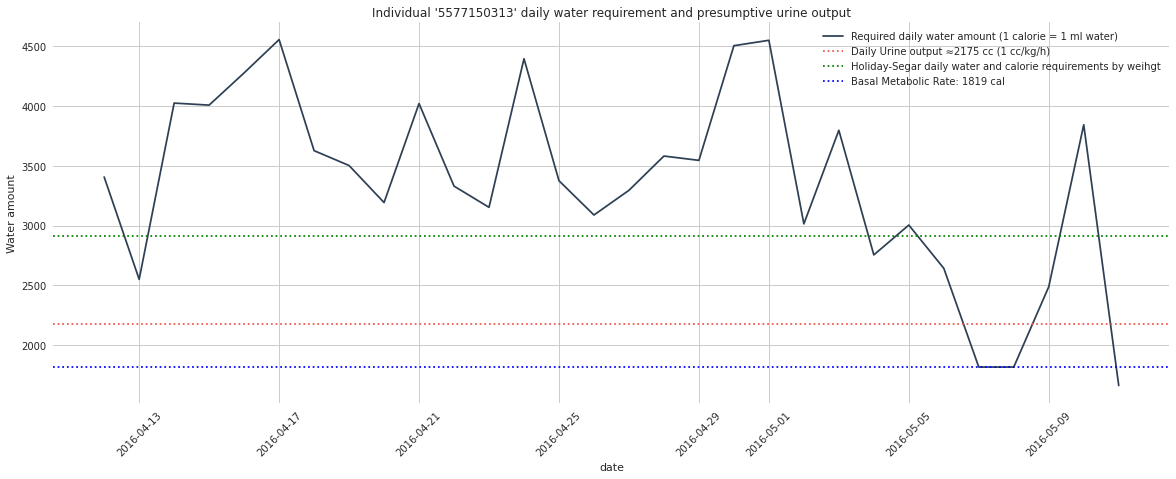

In [116]:
plt.figure(figsize=(20,7))
sns.set_style("whitegrid")
sns.lineplot(x="date",y="calories", data=daily_activity[daily_activity.id == "5577150313"], label = "Required daily water amount (1 calorie = 1 ml water)",color="#2E4053").set_ylabel("Water amount") 
plt.axhline(90.7*24, color = "#F0544A", label= "Daily Urine output ≈2175 cc (1 cc/kg/h)", linestyle=":")
plt.axhline(1500+((90.7-20)*20), color = "Green", label= "Holiday-Segar daily water and calorie requirements by weihgt", linestyle=":")
plt.axhline(1819, color = "Blue", label= "Basal Metabolic Rate: 1819 cal", linestyle=":")
plt.xticks(rotation=45)
plt.title("Individual '5577150313' daily water requirement and presumptive urine output")
plt.legend();

Water and mineral intakes have relationship between performance and . Because of that the water and mineral status could be monitorized.  
<br>For [European Food Safety Authority](https://nutritionj.biomedcentral.com/articles/10.1186/1475-2891-12-85), Ideal daily water intake is for infants 1.5cc/calorie, for toddlers 1.2 cc/calorie, for adults 1 cc/calorie. In human body, the water loss can be categorized as **sensible** and **insensible** losses. Sensible losses describes urine, defacation and vomiting. Insensible water losses are sweating and vaporized water from respiratory tract. If we can learn insensible loss induced by exercise, air humidity, environment temperature, we can predict mineral losses and ideal water requirement. Also the basal metabolic rate  can be used as a predictor. There are different guidelines for the IV fluid treatment amount calculations but mainly in hospitals [Holiday-Segar method](https://www.ncbi.nlm.nih.gov/books/NBK544219/#:~:text=Maintenance%20fluid%20rate%20replacement%20is,is%201mL%2Fkg%2Fh.) is used. [CDC reference](https://www.cdc.gov/dengue/training/cme/ccm/page57297.html) for the hourly urine output is 0.5 to 1.5 cc/kg/hour.
> Water requirement = Sensible water loss + Insensible water loss
<br>We can learn daily water intake and sensible water loss(urine amount) then calculate insensible losses with electrolytes.

# 7.Device Usage Analysis

<br>I am curious about activity status of the devices and device usage amounts. 
<br>Firstly, I will categorize the data days as:

* ***Pedometer:*** I have accepted the step counter as a pedometer and If the daily step count is equal to zero then pedometer is not active
* ***GPS:*** I have accepted distance counter as a gps tracker and If the total_distance is equal to zero then GPS is not active
* ***Data existence:*** We have 31-days data but the dataset does not contain whole period data for some devices. 
* ***Totally Active:*** If the pedometer and gps are active then the device is totally active.

In [117]:
# Adjusting the dataset for the visualisation

daily_data = daily_activity[["id","date","total_steps","total_distance","calories","wday"]]
daily_data["Finish"] = daily_data["date"] + timedelta(days=1)
daily_data["Start"] = daily_data["date"]
daily_data["Task"] = daily_data["id"]
daily_data["pedometer"] = np.where(daily_data["total_steps"] != 0, 1, 0)
daily_data["gps"] = np.where(daily_data["total_distance"] != 0, 1, 0)
conditions = [
    ((daily_data["pedometer"] == 1) & (daily_data["gps"] == 1)),
    ((daily_data["pedometer"] == 1) & (daily_data["gps"] == 0)),
    ((daily_data["pedometer"] == 0) & (daily_data["gps"] == 1)),
    ((daily_data["pedometer"] == 0) & (daily_data["gps"] == 0))
]
values = ["Device is totally active", "Gps is not active", "Pedometer is not active", "Pedometer and Gps are not active"]
daily_data["status"]  = np.select(conditions, values)
daily_data["weekend"] = np.where((daily_data.wday == "Saturday") | (daily_data.wday == "Sunday"),1,0)

In [118]:
# I will use Gantt Chart from Plotly library
colors = {"Pedometer and Gps are not active": '#c03438',
          "Pedometer is not active": '#d35a4a',
          "Gps is not active": '#65a8cf',
          "Device is totally active": '#053061'}

fig = ff.create_gantt(daily_data, colors=colors, index_col='status', show_colorbar=True,
                      group_tasks=True)
order = daily_activity.groupby("id").mean().sort_values("total_steps", ascending=True).reset_index().id.tolist()
fig.update_layout(
    title='Activity Status',
    autosize=False,
    width=1000,
    height=1000,
    yaxis={'categoryorder':'array', 'categoryarray':order})
fig.show()

<br> Average Daily Usage in 31-days is **28.3**(SD±5.68) days and Mean Totally Active day usage is 26.09(SD±6.80) days
<br> Only 2.18(SD±4.14) days pedometer and gps features are inactive. 


In [119]:
data_days = daily_data.groupby("id").date.count().rename("data_days")
totally_active = daily_data[daily_data.status == "Device is totally active"].groupby("id").date.count().rename("totally_active")
gps_is_not_active = daily_data[daily_data.status == "Gps is not active"].groupby("id").date.count().rename("gps_is_not_active")
pedometer_is_not_active = daily_data[daily_data.status == "Pedometer is not active"].groupby("id").date.count().rename("pedometer_is_not_active")
pedometer_gps_not_active = daily_data[daily_data.status == "Pedometer and Gps are not active"].groupby("id").date.count().rename("pedometer_gps_not_active")
activity_status = pd.concat([data_days, totally_active, gps_is_not_active, pedometer_is_not_active, pedometer_gps_not_active], axis=1).fillna(0)
activity_status.describe()

,data_days,totally_active,gps_is_not_active,pedometer_is_not_active,pedometer_gps_not_active
count,33.000000,33.000000,33.000000,33.0,33.000000
mean,28.303030,26.090909,0.030303,0.0,2.181818
std,5.681576,6.802406,0.174078,0.0,4.141667
min,4.000000,3.000000,0.000000,0.0,0.000000
25%,28.000000,20.000000,0.000000,0.0,0.000000
50%,31.000000,30.000000,0.000000,0.0,0.000000
75%,31.000000,31.000000,0.000000,0.0,2.000000
max,31.000000,31.000000,1.000000,0.0,14.000000


In [120]:
activity_status

,data_days,totally_active,gps_is_not_active,pedometer_is_not_active,pedometer_gps_not_active
id,,,,,
1503960366,30,30,0.0,0.0,0.0
1624580081,31,31,0.0,0.0,0.0
1644430081,30,30,0.0,0.0,0.0
1844505072,31,20,1.0,0.0,10.0
1927972279,31,17,0.0,0.0,14.0
2022484408,31,31,0.0,0.0,0.0
2026352035,31,31,0.0,0.0,0.0
2320127002,31,31,0.0,0.0,0.0
2347167796,18,18,0.0,0.0,0.0


> ### *Question 8: Is there a difference of the data existence or quality within time?*

We need to use chi-square hypotesis test for making time-through comparisons. And It has some requirements.
<br>For [Chi-square test assumptions](https://www.statology.org/chi-square-test-assumptions/) and [advance reading](https://www.geeksforgeeks.org/python-pearsons-chi-square-test/).
1. Both variables are categorical.
1. All observations are independent.
1. Cells in the contingency table are mutually exclusive.
1. Expected value of cells should be 5 or greater in at least 80% of cells.

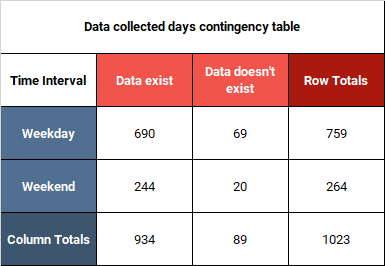
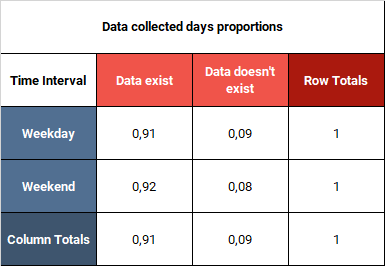
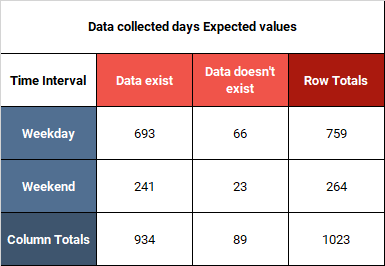
<br>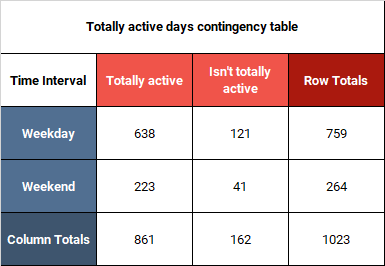
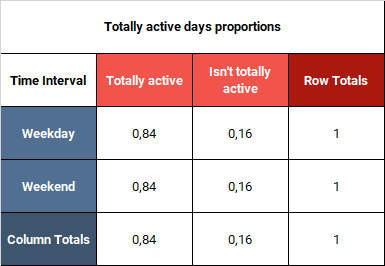
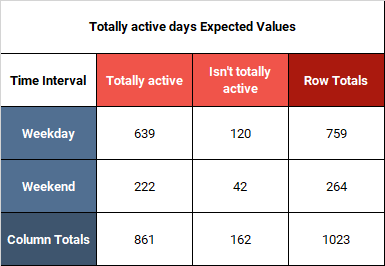
<br>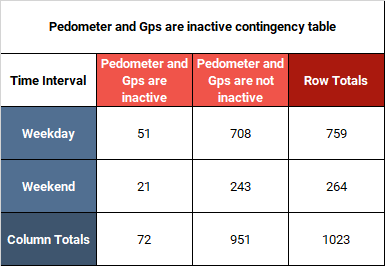
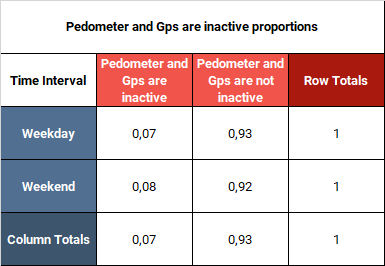
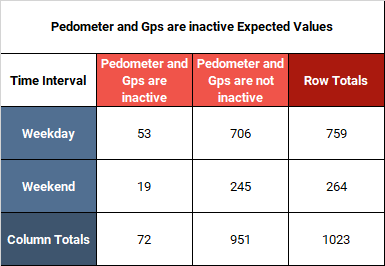

In [121]:
#chi square test for the comparison weekdays and weekends. 
#Between April 12 - May 12 2016 we have 264 weekend days 759 weekdays. 
# For advance readings https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
datas = [
        daily_data.groupby("weekend").date.count(),
        daily_data[daily_data.status == "Device is totally active"].groupby("weekend").date.count(),
        daily_data[daily_data.status == "Pedometer and Gps are not active"].groupby("weekend").date.count(),
        ]
names = ['"Data days."','"Totally active days"', '"Days pedometer and gps are inactive"']
for data,name in zip(datas,names):
    data_days = [[data.loc[0], (759 - data.loc[0])],[data.loc[1], (264-data.loc[1])]]
    stat, p, dof, expected = chi2_contingency(data_days)
    alpha = 0.05
    print("H0 is: ", name," is not dependent to part of the week.")
    print("p value is " + str(p))
    get_asterisks_for_pval(p)
    if p <= alpha:
        print("RESULT: ", name,' is dependent (reject H0)')
    else:
        print("RESULT: ", name, ' is independent (H0 holds true)')

H0 is:  "Data days."  is not dependent to part of the week.
p value is 0.5315535612024578
RESULT:  "Data days."  is independent (H0 holds true)
H0 is:  "Totally active days"  is not dependent to part of the week.
p value is 0.9521729973505125
RESULT:  "Totally active days"  is independent (H0 holds true)
H0 is:  "Days pedometer and gps are inactive"  is not dependent to part of the week.
p value is 0.5918522807973328
RESULT:  "Days pedometer and gps are inactive"  is independent (H0 holds true)


#### We will compare days of the week. 

In [122]:
data_days_by_day = daily_data.groupby("wday").date.count().rename("data_days")
totally_active_by_day = daily_data[daily_data.status == "Device is totally active"].groupby("wday").date.count().rename("totally_active")
gps_is_not_active_by_day = daily_data[daily_data.status == "Gps is not active"].groupby("wday").date.count().rename("gps_is_not_active")
pedometer_is_not_active_by_day = daily_data[daily_data.status == "Pedometer is not active"].groupby("wday").date.count().rename("pedometer_is_not_active")

pedometer_gps_not_active_by_day = daily_data[daily_data.status == "Pedometer and Gps are not active"].groupby("wday").date.count().rename("pedometer_gps_not_active")
total_days_by_day = daily_data[daily_data.id == "1624580081"].groupby("wday").date.count().rename("total_days")*33
activity_status_by_day = pd.concat([data_days_by_day, totally_active_by_day, gps_is_not_active_by_day, pedometer_is_not_active_by_day, pedometer_gps_not_active_by_day,total_days_by_day], axis=1).fillna(0)

activity_status_by_day

,data_days,totally_active,gps_is_not_active,pedometer_is_not_active,pedometer_gps_not_active,total_days
wday,,,,,,
Friday,126,120,0.0,0.0,6,132
Monday,120,110,0.0,0.0,10,132
Saturday,123,113,0.0,0.0,10,132
Sunday,121,110,0.0,0.0,11,132
Thursday,145,133,0.0,0.0,12,165
Tuesday,150,138,0.0,0.0,12,165
Wednesday,149,137,1.0,0.0,11,165


In [123]:
activity_status_by_day_percentage = activity_status_by_day.div(activity_status_by_day["total_days"], axis=0)
activity_status_by_day_percentage

,data_days,totally_active,gps_is_not_active,pedometer_is_not_active,pedometer_gps_not_active,total_days
wday,,,,,,
Friday,0.954545,0.909091,0.000000,0.0,0.045455,1.0
Monday,0.909091,0.833333,0.000000,0.0,0.075758,1.0
Saturday,0.931818,0.856061,0.000000,0.0,0.075758,1.0
Sunday,0.916667,0.833333,0.000000,0.0,0.083333,1.0
Thursday,0.878788,0.806061,0.000000,0.0,0.072727,1.0
Tuesday,0.909091,0.836364,0.000000,0.0,0.072727,1.0
Wednesday,0.903030,0.830303,0.006061,0.0,0.066667,1.0


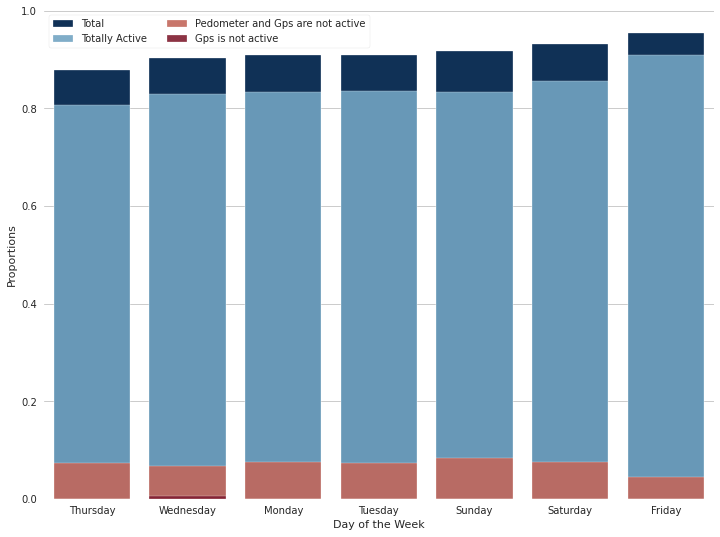

In [124]:
graph  = activity_status_by_day_percentage.sort_values("data_days").reset_index()
f, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x="wday", y="data_days", data=graph,label="Total", color='#053061', alpha=1)
sns.barplot(x="wday", y="totally_active", data=graph, label="Totally Active", color='#65a8cf', alpha=0.9)
sns.barplot(x="wday", y="pedometer_gps_not_active", data=graph, label="Pedometer and Gps are not active", color='#d35a4a', alpha=0.9)
sns.barplot(x="wday", y="gps_is_not_active", data=graph, label="Gps is not active", color='#900d26', alpha=0.9)
# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(ylabel="Proportions",
       xlabel="Day of the Week")
sns.despine(left=True, bottom=True)

> ### *Data existence and totally active day count is least on Thursday, It can explain our sedentary day results. If the user doesn't use the device when user is tired we can see that as lesser sedentary minutes.*

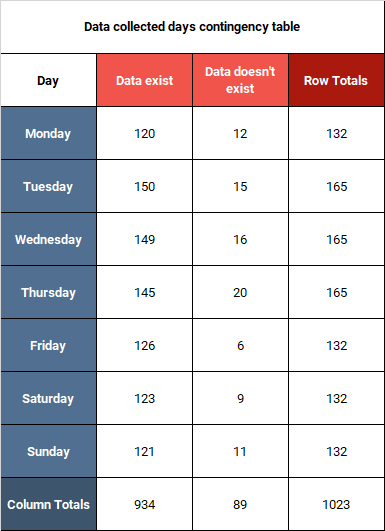
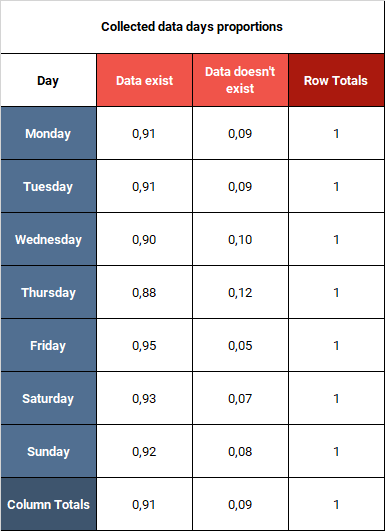
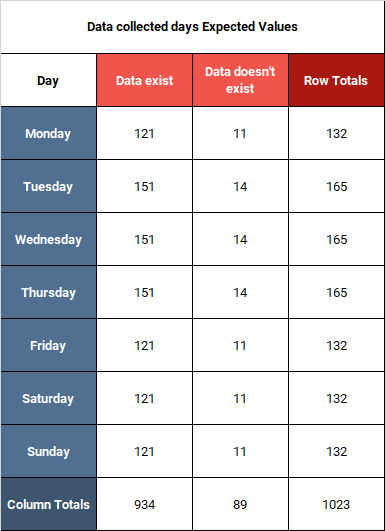
<br>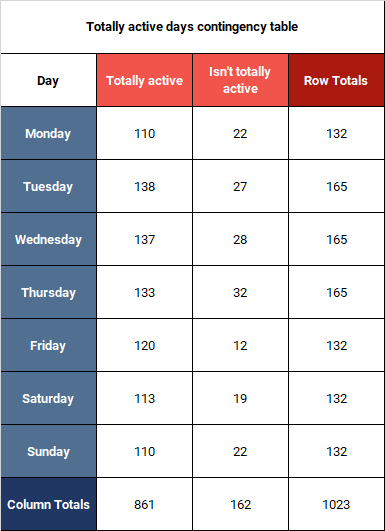
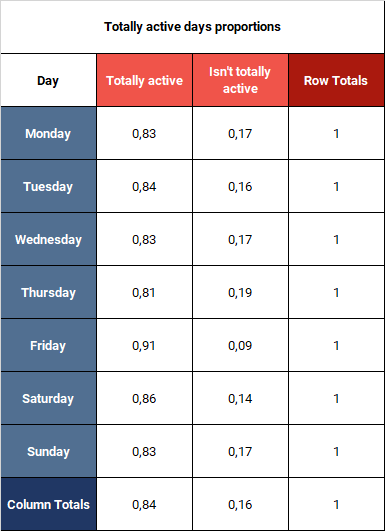
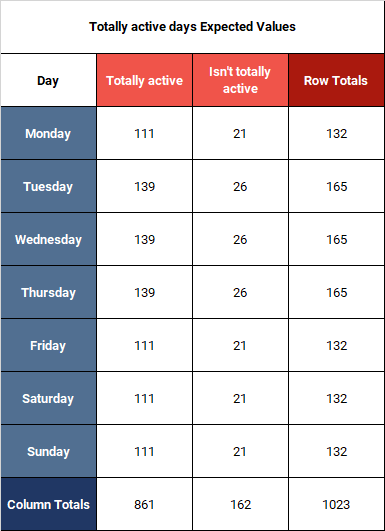
<br>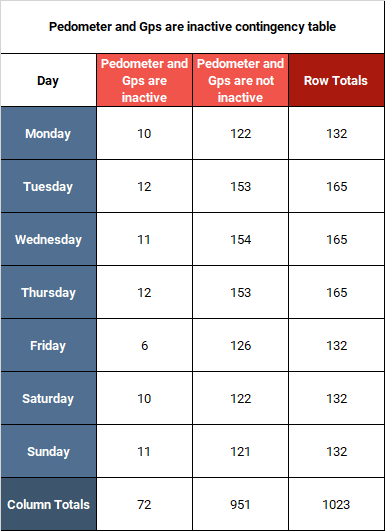
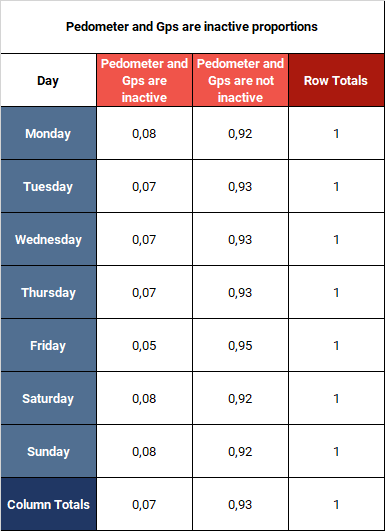
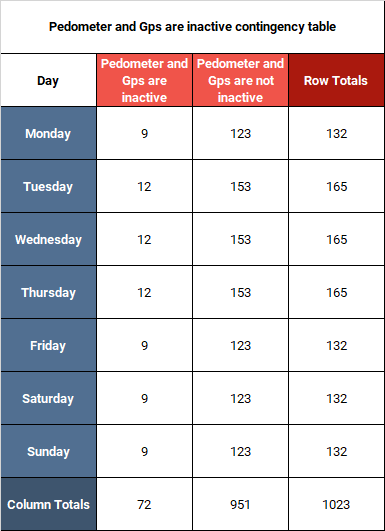

In [125]:
# chi square test for the comparison day of the week.
# Between April 12 - May 12 2016 we have 132 Monday-Friday-Saturday-Sunday , 165 Tuesday-Wednesday-Thursday. 
datas = [
        daily_data.groupby("wday").date.count(),
        daily_data[daily_data.status == "Device is totally active"].groupby("wday").date.count(),
        daily_data[daily_data.status == "Pedometer and Gps are not active"].groupby("wday").date.count(),
        ]
names = ['"Data days."','"Totally active days"', '"Days pedometer and gps are inactive"']
for data,name in zip(datas,names):
    data_days = [[data.iloc[0], (132 - data.iloc[0])],[data.iloc[1], (132-data.iloc[1])],
                [data.iloc[2], (132-data.iloc[2])], [data.iloc[3], (132-data.iloc[3])],
                [data.iloc[4], (165-data.iloc[4])], [data.iloc[5], (165-data.iloc[5])],
                [data.iloc[6],(165-data.iloc[6])]]
    stat, p, dof, expected = chi2_contingency(data_days)
    
    alpha = 0.05
    print("H0 is: ", name," is not dependent to day of the week.")
    print("p value is " + str(p), get_asterisks_for_pval(p))
    if p <= alpha:
        print("RESULT: ", name,' is dependent (reject H0)')
    else:
        print("RESULT: ", name, ' is independent (H0 holds true)')

H0 is:  "Data days."  is not dependent to day of the week.
p value is 0.403958547707649 'not significant'
RESULT:  "Data days."  is independent (H0 holds true)
H0 is:  "Totally active days"  is not dependent to day of the week.
p value is 0.3584948563591708 'not significant'
RESULT:  "Totally active days"  is independent (H0 holds true)
H0 is:  "Days pedometer and gps are inactive"  is not dependent to day of the week.
p value is 0.9394943643597081 'not significant'
RESULT:  "Days pedometer and gps are inactive"  is independent (H0 holds true)


* Appereantly 14 users (42.4%) are 31-days totally active.
* 21 Users (63.6%) have 31-days data records.
* "4057192912" belongs least data records with 4-days.
* There is not calories only 4-days. It can be about new-users and new-device settings.
* Thursday has least data record with 18 times. Also Friday has most data records.

# 8.Daily and Hourly Activity Analysis

### Activity Goals
I have used [American Heart Association Recommendations for Physical Activity in Adults and Kids guideline](https://www.heart.org/en/healthy-living/fitness/fitness-basics/aha-recs-for-physical-activity-in-adults) for evaluating the activity.
<br>**RECOMMENDATIONS FOR ADULTS**
<br>Main goal: 150 minutes per week moderate intensity aerobic activity
<br>Main goal: 75 minutes per week vigorous aerobic activity 
<br>Minimal Goal: 300 minutes per week light-intensity activity
<br>(31/7) * 75 = 332.14 min as **Active** and **Very Active**
<br>(31/7) * 150 = 664.29 min as **Moderates**
<br> (31/7) * 300 = 1328.57 min as **Light**
<br> Others are classified as sedentaries
<br> Active and Very active will be classified with **10.000 steps** a day goal. Very Active users have a mean daily step of more than 10.000.

In [126]:
#Sedentary group
sedentary_list = daily_activity.groupby("id").sum()[((daily_activity.groupby("id").sum().very_active < 332.14) & (daily_activity.groupby("id").sum().moderate < 664.29) & (daily_activity.groupby("id").sum().light < 1328.57))].index

#Moderate group
moderates_list = daily_activity.groupby("id").sum()[((daily_activity.groupby("id").sum().very_active < 332.14) & (daily_activity.groupby("id").sum().moderate < 664.29) & (daily_activity.groupby("id").sum().light >= 1328.57))].index

#Active group
actives_list = daily_activity.groupby("id").sum()[((daily_activity.groupby("id").sum().very_active >= 332.14) | (daily_activity.groupby("id").sum().moderate >= 664.29)) & (daily_activity.groupby("id").mean().total_steps < 10000)].index

#Very activ group
very_actives_list = daily_activity.groupby("id").sum()[((daily_activity.groupby("id").sum().very_active >= 332.14) | (daily_activity.groupby("id").sum().moderate >= 664.29)) & (daily_activity.groupby("id").mean().total_steps >= 10000)].index

sedentaries = daily_activity[daily_activity.id.isin(sedentary_list)]
moderates = daily_activity[daily_activity.id.isin(moderates_list)]
actives = daily_activity[daily_activity.id.isin(actives_list)]
very_actives = daily_activity[daily_activity.id.isin(very_actives_list)]

In [127]:
print("very actives:\t", len(very_actives_list), "\t\tratio: ", round((len(very_actives_list) / 33),2))
print("actives:\t", len(actives_list), " \t\tratio: ", round((len(actives_list)/33),2))
print("moderates:\t", len(moderates_list), "\t\tratio: ", round((len(moderates_list)/33),2))
print("sedentaries:\t", len(sedentary_list), "\t\tratio: ",  round((len(sedentary_list)/33),2))

very actives:	 7 		ratio:  0.21
actives:	 9  		ratio:  0.27
moderates:	 14 		ratio:  0.42
sedentaries:	 3 		ratio:  0.09


In [128]:
conditions =  [
    (daily_data.id.isin(sedentary_list)),
    (daily_data.id.isin(moderates_list)),
    (daily_data.id.isin(actives_list)),
    (daily_data.id.isin(very_actives_list))
]
values = ["sedentary","moderate","active","very active"]
daily_data["activeness"] = np.select(conditions,values)
daily_data

,id,date,total_steps,total_distance,calories,wday,Finish,Start,Task,pedometer,gps,status,weekend,activeness
0,1624580081,2016-04-12,8163,5.31,1432,Tuesday,2016-04-13,2016-04-12,1624580081,1,1,Device is totally active,0,moderate
1,1844505072,2016-04-12,6697,4.43,2030,Tuesday,2016-04-13,2016-04-12,1844505072,1,1,Device is totally active,0,moderate
2,1927972279,2016-04-12,678,0.47,2220,Tuesday,2016-04-13,2016-04-12,1927972279,1,1,Device is totally active,0,sedentary
3,3372868164,2016-04-12,4747,3.24,1788,Tuesday,2016-04-13,2016-04-12,3372868164,1,1,Device is totally active,0,moderate
4,4057192912,2016-04-12,5394,4.03,2286,Tuesday,2016-04-13,2016-04-12,4057192912,1,1,Device is totally active,0,sedentary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,8053475328,2016-05-12,4998,3.91,1505,Thursday,2016-05-13,2016-05-12,8053475328,1,1,Device is totally active,0,very active
930,5553957443,2016-05-12,3121,2.04,741,Thursday,2016-05-13,2016-05-12,5553957443,1,1,Device is totally active,0,active
931,8378563200,2016-05-12,4561,3.62,1976,Thursday,2016-05-13,2016-05-12,8378563200,1,1,Device is totally active,0,active
932,6962181067,2016-05-12,3587,2.37,928,Thursday,2016-05-13,2016-05-12,6962181067,1,1,Device is totally active,0,active


In [129]:
colors = {"sedentary": '#900d26',
          "moderate": '#d35a4a',
          "active": '#65a8cf',
          "very active": '#053061'}

fig = ff.create_gantt(daily_data, colors=colors, index_col='activeness', show_colorbar=True,
                      group_tasks=True)
fig.update_layout(
    title='Activity Status',
    autosize=False,
    width=1000,
    height=1000,
    yaxis={'categoryorder':'array', 'categoryarray':order})

fig.show()

In [130]:
conditions =  [
    (daily_activity.id.isin(sedentary_list)),
    (daily_activity.id.isin(moderates_list)),
    (daily_activity.id.isin(actives_list)),
    (daily_activity.id.isin(very_actives_list))
]
values = ["sedentary","moderate","active","very active"]
daily_activity["activeness"] = np.select(conditions,values)
daily_activity

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,...,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,wday,very_active,moderate,light,sedentary,activeness
0,1624580081,2016-04-12,8163,5.31,5.31,0.0,0.00,0.00,5.31,0.00,...,0,146,1294,1432,Tuesday,0,0,146,1294,moderate
1,1844505072,2016-04-12,6697,4.43,4.43,0.0,0.00,0.00,4.43,0.00,...,0,339,1101,2030,Tuesday,0,0,339,1101,moderate
2,1927972279,2016-04-12,678,0.47,0.47,0.0,0.00,0.00,0.47,0.00,...,0,55,734,2220,Tuesday,0,0,55,1385,sedentary
3,3372868164,2016-04-12,4747,3.24,3.24,0.0,0.00,0.00,3.23,0.01,...,0,280,1160,1788,Tuesday,0,0,280,1160,moderate
4,4057192912,2016-04-12,5394,4.03,4.03,0.0,0.00,0.00,3.94,0.00,...,0,164,1276,2286,Tuesday,0,0,164,1276,sedentary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,8053475328,2016-05-12,4998,3.91,3.91,0.0,2.95,0.20,0.76,0.00,...,4,39,839,1505,Thursday,28,4,38,830,very active
930,5553957443,2016-05-12,3121,2.04,2.04,0.0,0.58,0.40,1.06,0.00,...,6,48,222,741,Thursday,8,6,48,538,active
931,8378563200,2016-05-12,4561,3.62,3.62,0.0,0.65,0.27,2.69,0.00,...,6,102,433,1976,Thursday,8,6,77,689,active
932,6962181067,2016-05-12,3587,2.37,2.37,0.0,0.00,0.25,2.11,0.00,...,8,105,127,928,Thursday,0,8,105,607,active


In [131]:
conditions =  [
    ((daily_activity.very_active < 11.40) & (daily_activity.moderate < 21.43) & (daily_activity.light < 48.75)),
    ((daily_activity.very_active < 11.40) & (daily_activity.moderate < 21.43) & (daily_activity.light >= 48.75)),
    ((daily_activity.very_active >= 11.40) | (daily_activity.moderate >= 21.43) & (daily_activity.total_steps < 10000)),
    ((daily_activity.very_active >= 11.40) | (daily_activity.moderate >= 21.43) & (daily_activity.total_steps > 10000))
]
values = ["sedentary","moderate","active","very active"]
daily_activity["daily_activeness"] = np.select(conditions,values)
daily_activity

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,...,lightly_active_minutes,sedentary_minutes,calories,wday,very_active,moderate,light,sedentary,activeness,daily_activeness
0,1624580081,2016-04-12,8163,5.31,5.31,0.0,0.00,0.00,5.31,0.00,...,146,1294,1432,Tuesday,0,0,146,1294,moderate,moderate
1,1844505072,2016-04-12,6697,4.43,4.43,0.0,0.00,0.00,4.43,0.00,...,339,1101,2030,Tuesday,0,0,339,1101,moderate,moderate
2,1927972279,2016-04-12,678,0.47,0.47,0.0,0.00,0.00,0.47,0.00,...,55,734,2220,Tuesday,0,0,55,1385,sedentary,moderate
3,3372868164,2016-04-12,4747,3.24,3.24,0.0,0.00,0.00,3.23,0.01,...,280,1160,1788,Tuesday,0,0,280,1160,moderate,moderate
4,4057192912,2016-04-12,5394,4.03,4.03,0.0,0.00,0.00,3.94,0.00,...,164,1276,2286,Tuesday,0,0,164,1276,sedentary,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,8053475328,2016-05-12,4998,3.91,3.91,0.0,2.95,0.20,0.76,0.00,...,39,839,1505,Thursday,28,4,38,830,very active,active
930,5553957443,2016-05-12,3121,2.04,2.04,0.0,0.58,0.40,1.06,0.00,...,48,222,741,Thursday,8,6,48,538,active,sedentary
931,8378563200,2016-05-12,4561,3.62,3.62,0.0,0.65,0.27,2.69,0.00,...,102,433,1976,Thursday,8,6,77,689,active,moderate
932,6962181067,2016-05-12,3587,2.37,2.37,0.0,0.00,0.25,2.11,0.00,...,105,127,928,Thursday,0,8,105,607,active,moderate


In [132]:
daily_activity["Start"] = daily_activity.date
daily_activity["Finish"] = daily_activity.date + timedelta(days=1)
daily_activity["Task"] = daily_activity.id

In [133]:
ccolors = {"sedentary": '#900d26',
          "moderate": '#d35a4a',
          "active": '#65a8cf',
          "very active": '#053061'}

fig = ff.create_gantt(daily_activity, colors=colors, index_col='daily_activeness', show_colorbar=True,
                      group_tasks=True)
fig.update_layout(
    title='Activity Status',
    autosize=False,
    width=1000,
    height=1000,
    yaxis={'categoryorder':'array', 'categoryarray':order})

fig.show()

In [134]:
sedentaries.groupby("wday").mean().sort_values(by="calories", ascending=False)

,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,very_active,moderate,light,sedentary
wday,,,,,,,,,,,,,,,,,
Wednesday,2294.000000,1.659000,1.659000,0.00000,0.488000,0.232000,0.930000,0.0,8.700000,13.100000,54.200000,1295.100000,2279.300000,8.700000,13.100000,54.200000,1364.000000
Monday,2707.714286,1.927143,1.927143,0.00000,0.775714,0.218571,0.930000,0.0,11.285714,7.428571,51.571429,1351.857143,2271.714286,11.285714,7.428571,51.571429,1369.714286
Sunday,1704.428571,1.204286,1.204286,0.00000,0.382857,0.377143,0.444286,0.0,5.714286,11.857143,32.142857,1390.285714,2185.714286,5.714286,11.857143,32.142857,1390.285714
Tuesday,1825.900000,1.330000,1.330000,0.19596,0.421000,0.087000,0.793000,0.0,5.200000,3.000000,47.600000,1300.100000,2157.400000,5.200000,3.000000,47.600000,1384.200000
Friday,1535.555556,1.103333,1.103333,0.00000,0.075556,0.132222,0.886667,0.0,1.666667,4.555556,45.555556,1241.111111,2074.777778,1.666667,4.555556,45.333333,1335.111111
Saturday,1707.125000,1.208750,1.208750,0.00000,0.351250,0.151250,0.708750,0.0,5.125000,4.000000,41.875000,1284.875000,2029.250000,5.125000,4.000000,41.375000,1284.500000
Thursday,970.300000,0.686000,0.686000,0.00000,0.093000,0.146000,0.447000,0.0,1.600000,4.600000,30.300000,1289.800000,2020.200000,1.600000,4.600000,30.300000,1355.500000


In [135]:
moderates.groupby("wday").mean().sort_values(by="calories", ascending=False)

,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,very_active,moderate,light,sedentary
wday,,,,,,,,,,,,,,,,,
Saturday,6632.056604,4.578302,4.578302,0.0,0.505472,0.416981,3.635849,0.001698,8.452830,9.698113,229.490566,1006.245283,2187.132075,8.452830,9.698113,229.490566,1192.358491
Tuesday,5455.126984,3.757619,3.757619,0.0,0.282857,0.325397,3.061587,0.003016,4.015873,7.698413,198.269841,1076.428571,2076.380952,4.015873,7.698413,197.841270,1230.444444
Friday,5216.296296,3.580556,3.580556,0.0,0.110556,0.203333,3.261296,0.002407,2.444444,4.648148,216.500000,990.648148,2055.185185,2.407407,4.685185,216.685185,1196.222222
Sunday,5163.188679,3.651887,3.651887,0.0,0.629434,0.282075,2.735849,0.001509,7.415094,6.660377,182.037736,1041.132075,2028.075472,7.415094,6.660377,181.811321,1235.056604
Wednesday,5365.301587,3.652222,3.652222,0.0,0.378889,0.303651,2.915873,0.002381,5.396825,6.841270,196.809524,1046.317460,2023.079365,5.396825,6.841270,196.666667,1219.666667
Monday,5088.000000,3.488654,3.488654,0.0,0.349231,0.222308,2.910577,0.002115,4.576923,4.807692,193.519231,1062.500000,1990.442308,4.576923,4.807692,192.115385,1216.576923
Thursday,5617.370968,3.836613,3.836613,0.0,0.218387,0.300645,3.148226,0.003226,2.870968,6.903226,202.645161,973.080645,1985.177419,2.870968,6.903226,201.306452,1142.790323


In [136]:
actives.groupby("wday").mean().sort_values(by="calories", ascending=False)

,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,very_active,moderate,light,sedentary
wday,,,,,,,,,,,,,,,,,
Tuesday,9823.279070,7.091395,7.091395,0.209589,2.160465,0.836512,3.871395,0.000465,39.046512,20.465116,208.511628,874.465116,2709.697674,39.046512,20.465116,208.511628,1171.976744
Monday,8821.794118,6.357941,6.351176,0.421223,1.829118,0.798529,3.519412,0.003529,37.176471,20.500000,194.764706,899.235294,2639.352941,37.176471,20.500000,194.764706,1187.558824
Friday,8468.828571,6.056286,6.056286,0.119551,1.515429,0.746286,3.728571,0.001143,31.457143,19.657143,209.857143,937.828571,2599.000000,30.142857,19.657143,210.228571,1178.257143
Saturday,8370.235294,6.058823,6.058823,0.000000,1.410294,0.843235,3.678824,0.000882,27.088235,18.617647,209.823529,866.382353,2572.676471,27.088235,18.617647,209.823529,1184.470588
Wednesday,7850.674419,5.771395,5.771395,0.145964,1.659302,0.583256,3.459302,0.001163,27.325581,14.162791,196.558140,849.162791,2507.627907,27.325581,14.162791,196.348837,1182.627907
Sunday,6951.970588,5.118824,5.118824,0.000000,1.515882,0.915882,2.598529,0.000000,28.735294,20.617647,157.352941,882.970588,2459.176471,28.735294,20.617647,157.352941,1233.294118
Thursday,8525.097561,6.170244,6.125610,0.264413,1.816585,0.732683,3.404634,0.002927,33.195122,17.682927,177.975610,831.512195,2447.829268,33.073171,17.585366,176.512195,1111.853659


In [137]:
very_actives.groupby("wday").mean().sort_values(by="calories", ascending=False)

,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,very_active,moderate,light,sedentary
wday,,,,,,,,,,,,,,,,,
Wednesday,13170.515152,9.936364,9.842121,0.444296,4.380303,0.985758,4.441515,0.000000,45.787879,24.060606,214.424242,1000.787879,2644.424242,45.787879,24.060606,214.060606,1150.636364
Tuesday,13254.941176,9.751176,9.664412,0.433067,3.832059,0.964706,4.715294,0.000294,44.264706,23.058824,237.147059,976.852941,2622.176471,44.264706,23.058824,237.147059,1135.529412
Friday,12377.428571,9.064286,9.032857,0.175398,3.776429,0.809643,4.465714,0.002143,45.678571,19.500000,224.392857,1019.642857,2613.821429,45.678571,19.500000,224.392857,1150.428571
Saturday,12900.892857,9.559286,9.559286,0.000000,3.937857,1.143214,4.467143,0.000357,46.714286,25.214286,216.214286,895.142857,2585.464286,46.714286,25.214286,216.214286,1102.571429
Monday,12971.592593,9.454815,9.355926,0.467580,3.655556,1.113333,4.668519,0.002963,44.148148,25.222222,222.259259,1039.481481,2583.777778,44.148148,25.222222,222.259259,1148.370370
Sunday,11739.777778,8.602593,8.602593,0.000000,3.428889,0.964815,4.204074,0.000000,37.333333,23.000000,215.851852,921.777778,2497.148148,37.333333,23.000000,215.851852,1163.814815
Thursday,11910.906250,8.849688,8.792812,0.255114,3.607813,0.753750,4.480312,0.000625,40.562500,17.468750,221.656250,975.375000,2490.406250,40.562500,17.468750,219.281250,1093.312500


### Groups Descriptive Statistics

In [138]:
daily_activity.describe().T

,count,mean,std,min,25%,50%,75%,max
total_steps,934.0,7686.177730,5067.509375,0.0,3843.2500,7447.000,10734.5000,36019.000000
total_distance,934.0,5.524433,3.913079,0.0,2.6550,5.275,7.7200,28.030001
tracker_distance,934.0,5.509989,3.895714,0.0,2.6550,5.275,7.7175,28.030001
logged_activities_distance,934.0,0.108866,0.621826,0.0,0.0000,0.000,0.0000,4.942142
very_active_distance,934.0,1.511938,2.664934,0.0,0.0000,0.220,2.0900,21.920000
moderately_active_distance,934.0,0.571188,0.885240,0.0,0.0000,0.245,0.8000,6.480000
light_active_distance,934.0,3.362141,2.029713,0.0,1.9625,3.385,4.7900,10.710000
sedentary_active_distance,934.0,0.001617,0.007369,0.0,0.0000,0.000,0.0000,0.110000
very_active_minutes,934.0,21.296574,32.908735,0.0,0.0000,4.000,32.0000,210.000000
fairly_active_minutes,934.0,13.652034,20.021851,0.0,0.0000,7.000,19.0000,143.000000


In [139]:
very_actives.describe().T

,count,mean,std,min,25%,50%,75%,max
total_steps,209.0,12638.488038,4513.232176,0.0,10243.00,12312.00,14810.00,29326.000000
total_distance,209.0,9.337990,4.035356,0.0,7.28,8.53,10.28,26.719999
tracker_distance,209.0,9.283301,4.019747,0.0,7.28,8.53,10.10,26.719999
logged_activities_distance,209.0,0.263567,1.083287,0.0,0.00,0.00,0.00,4.942142
very_active_distance,209.0,3.816124,3.905725,0.0,1.04,2.79,4.55,21.660000
moderately_active_distance,209.0,0.958086,1.141927,0.0,0.29,0.63,1.15,6.480000
light_active_distance,209.0,4.497321,1.785401,0.0,3.22,4.48,5.56,10.710000
sedentary_active_distance,209.0,0.000861,0.005391,0.0,0.00,0.00,0.00,0.050000
very_active_minutes,209.0,43.545455,34.563752,0.0,16.00,36.00,61.00,132.000000
fairly_active_minutes,209.0,22.444976,25.147796,0.0,8.00,14.00,28.00,143.000000


In [140]:
actives.describe().T

,count,mean,std,min,25%,50%,75%,max
total_steps,264.0,8434.901515,3709.489554,0.0,5802.5000,8475.500,10859.0000,20031.000000
total_distance,264.0,6.114621,2.731960,0.0,4.2675,6.230,7.8800,13.240000
tracker_distance,264.0,6.106818,2.724158,0.0,4.2675,6.230,7.8725,13.240000
logged_activities_distance,264.0,0.169074,0.622256,0.0,0.0000,0.000,0.0000,4.081692
very_active_distance,264.0,1.717614,1.971971,0.0,0.0000,0.895,2.8925,7.650000
moderately_active_distance,264.0,0.773371,0.892874,0.0,0.1350,0.530,1.0725,6.210000
light_active_distance,264.0,3.478788,1.649694,0.0,2.3925,3.475,4.6875,8.970000
sedentary_active_distance,264.0,0.001439,0.009523,0.0,0.0000,0.000,0.0000,0.110000
very_active_minutes,264.0,32.113636,40.117157,0.0,0.0000,17.000,50.2500,210.000000
fairly_active_minutes,264.0,18.685606,19.942208,0.0,3.7500,14.000,28.2500,125.000000


In [141]:
moderates.describe().T

,count,mean,std,min,25%,50%,75%,max
total_steps,400.0,5503.420000,4022.240078,0.0,2639.000,5322.500,7894.2500,36019.000000
total_distance,400.0,3.789125,2.884810,0.0,1.785,3.585,5.4000,28.030001
tracker_distance,400.0,3.789125,2.884810,0.0,1.785,3.585,5.4000,28.030001
logged_activities_distance,400.0,0.000000,0.000000,0.0,0.000,0.000,0.0000,0.000000
very_active_distance,400.0,0.348775,1.272737,0.0,0.000,0.000,0.2000,21.920000
moderately_active_distance,400.0,0.294650,0.634755,0.0,0.000,0.000,0.2825,4.190000
light_active_distance,400.0,3.092325,2.051710,0.0,1.580,3.160,4.5725,10.300000
sedentary_active_distance,400.0,0.002375,0.007123,0.0,0.000,0.000,0.0000,0.070000
very_active_minutes,400.0,4.955000,13.480441,0.0,0.000,0.000,3.0000,186.000000
fairly_active_minutes,400.0,6.780000,13.829307,0.0,0.000,0.000,8.0000,95.000000


In [142]:
sedentaries.describe().T

,count,mean,std,min,25%,50%,75%,max
total_steps,61.0,1791.213115,2411.082455,0.0,0.0,678.00,2503.00,10771.000000
total_distance,61.0,1.283115,1.743539,0.0,0.0,0.47,1.79,7.720000
tracker_distance,61.0,1.283115,1.743539,0.0,0.0,0.47,1.79,7.720000
logged_activities_distance,61.0,0.032125,0.250901,0.0,0.0,0.00,0.00,1.959596
very_active_distance,61.0,0.354426,0.819688,0.0,0.0,0.00,0.16,3.770000
moderately_active_distance,61.0,0.183934,0.357474,0.0,0.0,0.00,0.24,1.740000
light_active_distance,61.0,0.737213,1.024625,0.0,0.0,0.18,1.16,4.370000
sedentary_active_distance,61.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.000000
very_active_minutes,61.0,5.409836,12.648290,0.0,0.0,0.00,3.00,70.000000
fairly_active_minutes,61.0,6.803279,16.819453,0.0,0.0,0.00,6.00,113.000000


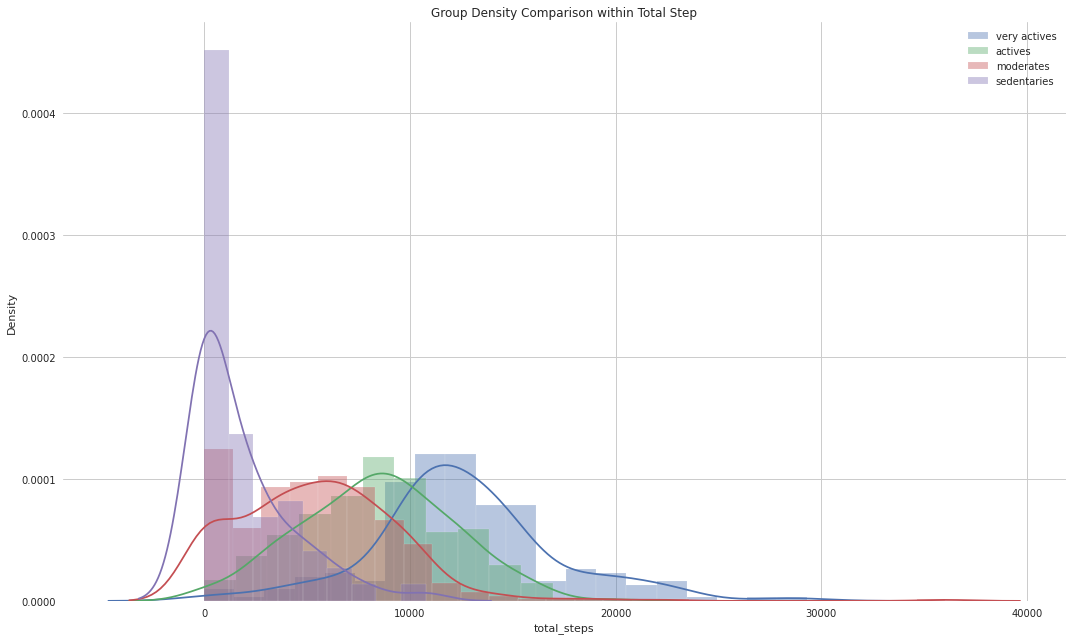

In [143]:
plt.figure(figsize=(15,9))
sns.distplot(very_actives.total_steps, label="very actives")
sns.distplot(actives.total_steps, label="actives")
sns.distplot(moderates.total_steps, label="moderates")
sns.distplot(sedentaries.total_steps, label="sedentaries")

plt.title('Group Density Comparison within Total Step')

plt.tight_layout()
plt.legend()
plt.show()

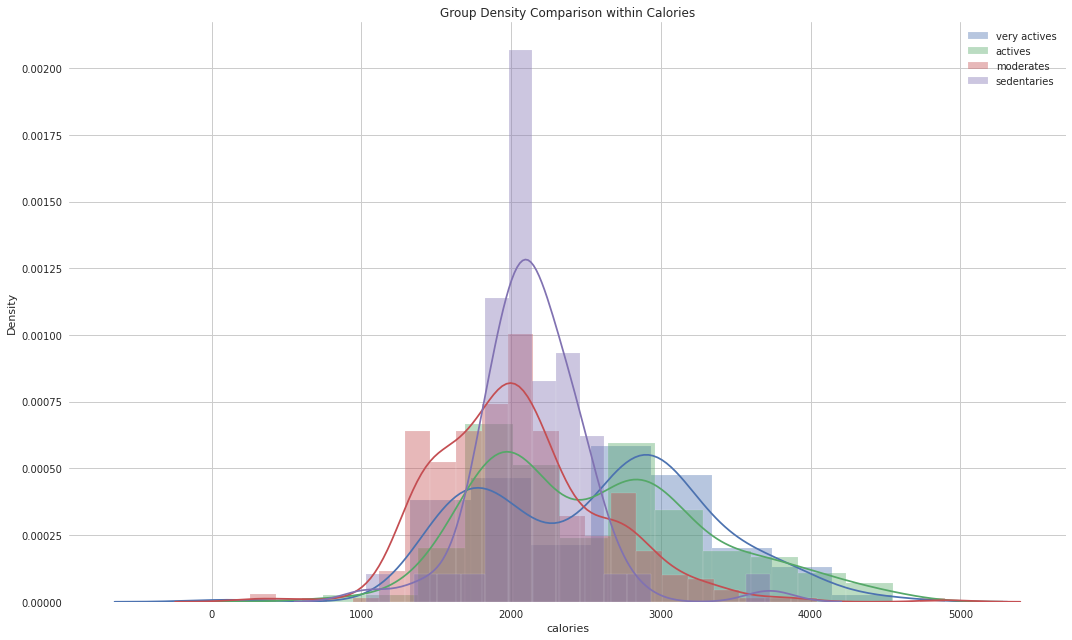

In [144]:
plt.figure(figsize=(15,9))
sns.distplot(very_actives.calories, label="very actives")
sns.distplot(actives.calories, label="actives")
sns.distplot(moderates.calories, label="moderates")
sns.distplot(sedentaries.calories, label="sedentaries")

plt.title('Group Density Comparison within Calories')

plt.tight_layout()
plt.legend()
plt.show()

### Calories within the activeness levels
<br>https://towardsdatascience.com/anova-test-with-python-cfbf4013328b

### Statistical differences between groups.

In [145]:
df_melt = pd.melt(daily_activity, id_vars=["id","activeness"], value_vars=["calories"]).drop(columns=["variable"]).rename(columns={"value":"calories"})

In [146]:
# Outlier Check
fig = go.Figure()

groups=["sedentary","moderate","active","very active"]
order = ["sedentary","moderate","active","very active"]

for group in groups:
    fig.add_trace(go.Violin(x=df_melt['activeness'][df_melt['activeness'] == group],
                            y=df_melt['calories'][df_melt['activeness'] == group],
                            name=weekend,
                            box_visible=True,
                            meanline_visible=True))

fig.update_layout(title='Activeness and Calories')

fig.show()

In [147]:
activity_groups=["sedentary","moderate","active","very active"]
#normality check
for group in activity_groups:
    stat, p = shapiro(daily_activity[daily_activity["activeness"]== group].calories)
    print("Statistics= ",stat,"p= ",p)
    # interpret
    alpha = 0.05
    if p > alpha:
        print(group,'Sample looks Gaussian (fail to reject H0)')
    else:
        print(group,'Sample does not look Gaussian (reject H0)')

Statistics=  0.8894990086555481 p=  4.875558443018235e-05
sedentary Sample does not look Gaussian (reject H0)
Statistics=  0.9621937274932861 p=  1.2444352215368326e-08
moderate Sample does not look Gaussian (reject H0)
Statistics=  0.9658258557319641 p=  6.282281447056448e-06
active Sample does not look Gaussian (reject H0)
Statistics=  0.9689801335334778 p=  0.00014653657854069024
very active Sample does not look Gaussian (reject H0)


In [148]:
#perform Kruskal-Wallis Test 
for column in daily_activity.columns:
    if (daily_activity[column].dtypes == "float" )| (daily_activity[column].dtypes == "int64"):
        statistic, p = stats.kruskal(daily_activity[daily_activity.daily_activeness == "sedentary"][column],
                                     daily_activity[daily_activity.daily_activeness == "moderate"][column],
                                     daily_activity[daily_activity.daily_activeness == "active"][column],
                                     daily_activity[daily_activity.daily_activeness == "very active"][column])
        alpha = 0.05
        if p > alpha:
            print("There is not any statistical difference between activeness groups on",column,'column (fail to reject H0)')
            print("p:",round(p,4), get_asterisks_for_pval(p))
        else:
            print("There is a statistical difference between activeness groups on",column,'column (reject H0)')
            print("p:",round(p,4), get_asterisks_for_pval(p))
    else:
        continue

There is a statistical difference between activeness groups on total_steps column (reject H0)
p: 0.0 ****
There is a statistical difference between activeness groups on total_distance column (reject H0)
p: 0.0 ****
There is a statistical difference between activeness groups on tracker_distance column (reject H0)
p: 0.0 ****
There is a statistical difference between activeness groups on logged_activities_distance column (reject H0)
p: 0.0 ****
There is a statistical difference between activeness groups on very_active_distance column (reject H0)
p: 0.0 ****
There is a statistical difference between activeness groups on moderately_active_distance column (reject H0)
p: 0.0 ****
There is a statistical difference between activeness groups on light_active_distance column (reject H0)
p: 0.0 ****
There is a statistical difference between activeness groups on sedentary_active_distance column (reject H0)
p: 0.0001 ****
There is a statistical difference between activeness groups on very_active_min

**Almost every column has statistically different from each other within activeness levels.**

> ### *Question 9: Is there a meaning about 10000 steps a day goal?*

In [149]:
data = [sedentaries.total_steps, moderates.total_steps, actives.total_steps, very_actives.total_steps]
sp.posthoc_dunn(data, p_adjust = 'bonferroni', sort=True).round(4)

,1,2,3,4
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0


In [150]:
data = [sedentaries.calories, moderates.calories, actives.calories, very_actives.calories]
sp.posthoc_dunn(data, p_adjust = 'bonferroni', sort=True).round(4)

,1,2,3,4
1,1.0000,0.4992,0.0061,0.0041
2,0.4992,1.0000,0.0000,0.0000
3,0.0061,0.0000,1.0000,1.0000
4,0.0041,0.0000,1.0000,1.0000


> ### *Answer 9: There is not any statistically significant differences between active and very active groups on calories. It means 10.000 steps a day goal is not useful for burning calories. You can read the [article](https://link.springer.com/article/10.2165/00007256-200434010-00001) about that issue.*

> ### *Question 10: Is there difference of data quality between activeness levels?*

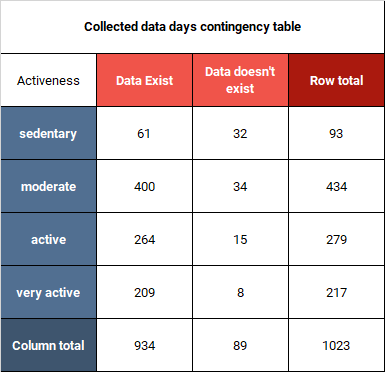
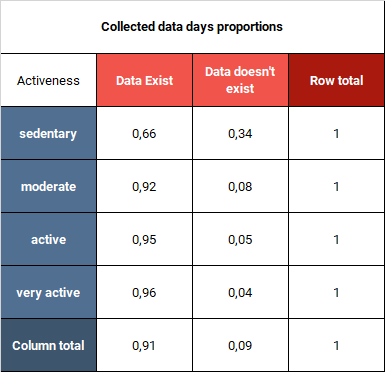
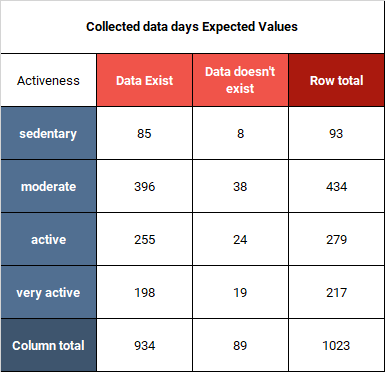
<br>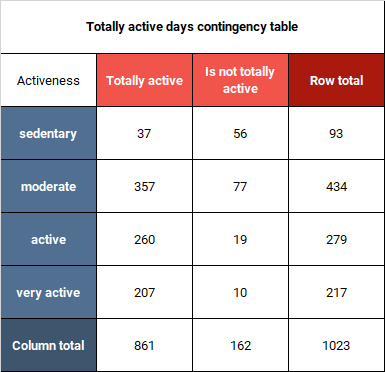
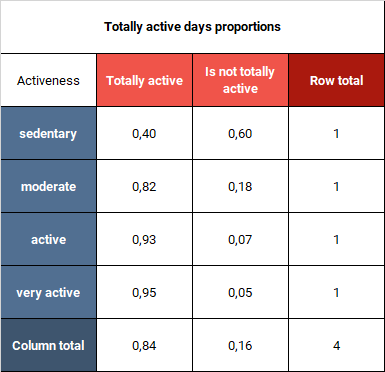
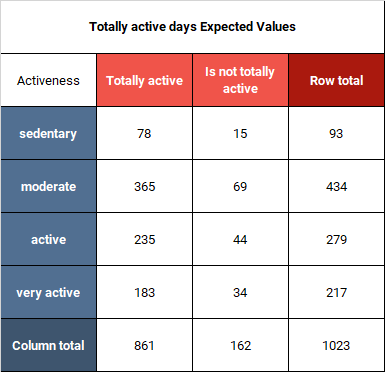
<br>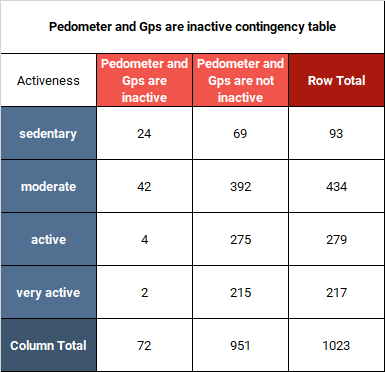
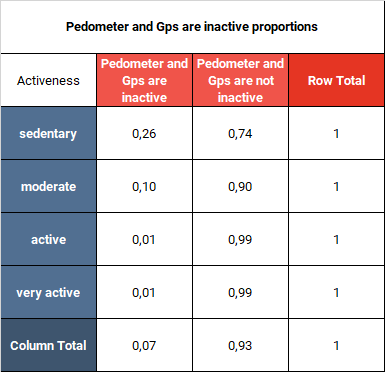
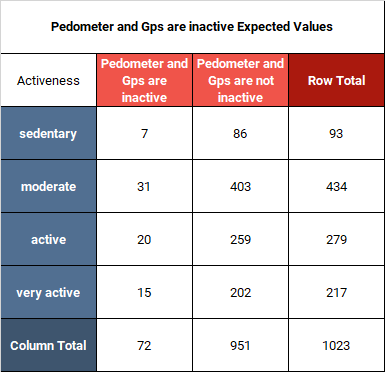

In [151]:
#Total Days
intensities = [very_actives_list,actives_list,moderates_list,sedentary_list]
print("{intensity} Total Days:\t {days}".format(intensity="Very actives", days= len(very_actives_list)*31))
print("{intensity} Total Days:\t\t {days}".format(intensity="Actives", days= len(actives_list)*31))
print("{intensity} Total Days:\t\t {days}".format(intensity="Moderates", days= len(moderates_list)*31))
print("{intensity} Total Days:\t\t {days}".format(intensity="Sedentaries", days= len(sedentary_list)*31))

Very actives Total Days:	 217
Actives Total Days:		 279
Moderates Total Days:		 434
Sedentaries Total Days:		 93


In [152]:
#chi square test for the comparison weekdays and weekends. 
#Between April 12 - May 12 2016 we have 264 weekend days 759 weekdays. 
# For advance readings https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
from scipy.stats import chi2_contingency
datas = [
        daily_data.groupby("activeness").date.count(),
        daily_data[daily_data.status == "Device is totally active"].groupby("activeness").date.count(),
        daily_data[daily_data.status == "Pedometer and Gps are not active"].groupby("activeness").date.count(),
        ]
names = ['"Data days."','"Totally active days"', '"Days pedometer and gps are inactive"']
for data,name in zip(datas,names):
    data_days = [[data.loc["very active"], (217 - data.loc["very active"])],[data.loc["active"], (279-data.loc["active"])],
                [data.loc["moderate"], (434-data.loc["moderate"])],[data.loc["sedentary"], (93-data.loc["sedentary"])]]
    stat, p, dof, expected = chi2_contingency(data_days)
    alpha = 0.05
    print("H0 is: ", name," is not dependent to activeness level.")
    print("p value is " + str(p))
    if p <= alpha:
        print("RESULT: ", name,' is dependent (reject H0)')
    else:
        print("RESULT: ", name, ' is independent (H0 holds true)')

H0 is:  "Data days."  is not dependent to activeness level.
p value is 4.507496958360941e-19
RESULT:  "Data days."  is dependent (reject H0)
H0 is:  "Totally active days"  is not dependent to activeness level.
p value is 5.86868860515011e-38
RESULT:  "Totally active days"  is dependent (reject H0)
H0 is:  "Days pedometer and gps are inactive"  is not dependent to activeness level.
p value is 2.4073247657953203e-17
RESULT:  "Days pedometer and gps are inactive"  is dependent (reject H0)


I have reached Chisquare post-hoc tests [from](https://neuhofmo.github.io/chi-square-and-post-hoc-in-python/) here.

In [153]:
#CHI-SQUARE POST-HOC TESTS

def chisq_and_posthoc_corrected(df):
    """Receives a dataframe and performs chi2 test and then post hoc.
    Prints the p-values and corrected p-values (after FDR correction)"""
    # start by running chi2 test on the matrix
    chi2, p, dof, ex = chi2_contingency(df, correction=True)
    print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")
    
    # post-hoc
    all_combinations = list(combinations(df.index, 2))  # gathering all combinations for post-hoc chi2
    p_vals = []
    print("Significance results:")
    for comb in all_combinations:
        new_df = df[(df.index == comb[0]) | (df.index == comb[1])]
        chi2, p, dof, ex = chi2_contingency(new_df, correction=True)
        p_vals.append(p)
        # print(f"For {comb}: {p}")  # uncorrected

    # checking significance
    # correction for multiple testing
    reject_list, corrected_p_vals = multipletests(p_vals, method='fdr_bh')[:2]
    for p_val, corr_p_val, reject, comb in zip(p_vals, corrected_p_vals, reject_list, all_combinations):
        print(f"{comb}: p_value: {p_val:5f}; corrected: {corr_p_val:5f} ({get_asterisks_for_pval(p_val)}) reject: {reject}")

In [154]:
#Data Existence contingency table
data_existence = pd.DataFrame({
    "Data exist" : [61,400,264,209],
    "Data does not exist" : [32,34,15,8]
},index=["sedentary","moderate","active","very active"])
#Totally active contingency table
totally_active = pd.DataFrame({
    "Totally Active" : [37,357,260,207],
    "Is not totally Active" : [56,77,19,10]
},index=["sedentary","moderate","active","very active"])
#Pedometer and GPS status contingency table
pedometer_gps_inactive = pd.DataFrame({
    "Pedometer and Gps are inactive" : [24,42,4,2],
    "Pedometer and Gps are not inactive" : [69,392,275,215]
},index=["sedentary","moderate","active","very active"])

In [155]:
chisq_and_posthoc_corrected(data_existence)

Chi2 result of the contingency table: 88.54084848818144, p-value: 4.507496958360941e-19
Significance results:
('sedentary', 'moderate'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('sedentary', 'active'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('sedentary', 'very active'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('moderate', 'active'): p_value: 0.265115; corrected: 0.318138 ('not significant') reject: False
('moderate', 'very active'): p_value: 0.062696; corrected: 0.094044 ('not significant') reject: False
('active', 'very active'): p_value: 0.501242; corrected: 0.501242 ('not significant') reject: False


In [156]:
chisq_and_posthoc_corrected(totally_active)

Chi2 result of the contingency table: 176.18843240397638, p-value: 5.86868860515011e-38
Significance results:
('sedentary', 'moderate'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('sedentary', 'active'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('sedentary', 'very active'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('moderate', 'active'): p_value: 0.000049; corrected: 0.000059 (****) reject: True
('moderate', 'very active'): p_value: 0.000006; corrected: 0.000009 (****) reject: True
('active', 'very active'): p_value: 0.398736; corrected: 0.398736 ('not significant') reject: False


In [157]:
chisq_and_posthoc_corrected(pedometer_gps_inactive)

Chi2 result of the contingency table: 80.49183399262262, p-value: 2.4073247657953203e-17
Significance results:
('sedentary', 'moderate'): p_value: 0.000043; corrected: 0.000064 (****) reject: True
('sedentary', 'active'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('sedentary', 'very active'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('moderate', 'active'): p_value: 0.000025; corrected: 0.000050 (****) reject: True
('moderate', 'very active'): p_value: 0.000056; corrected: 0.000067 (****) reject: True
('active', 'very active'): p_value: 0.917569; corrected: 0.917569 ('not significant') reject: False


> ### *Answer 10: There is a statistically significant difference between sedentary-moderate, sedentary-active, sedentary-very active groups. It seems most of the data-loss is from sedentary group. It seems sedentary and moderate groups are not using their devices actively. Moderate and sedentary groups are using their devices's gps and pedometer features off.*

> ### *Question 11: Is there a difference within time to reach goals?*

In [158]:
daily_activity.groupby("wday").wday.count().to_frame(name="total_day_counts").join(daily_activity[daily_activity.daily_activeness != "sedentary"].groupby("wday").wday.count().to_frame(name="healthy_day_counts"))

,total_day_counts,healthy_day_counts
wday,,
Friday,126,115
Monday,120,105
Saturday,123,109
Sunday,121,103
Thursday,145,122
Tuesday,150,131
Wednesday,149,133


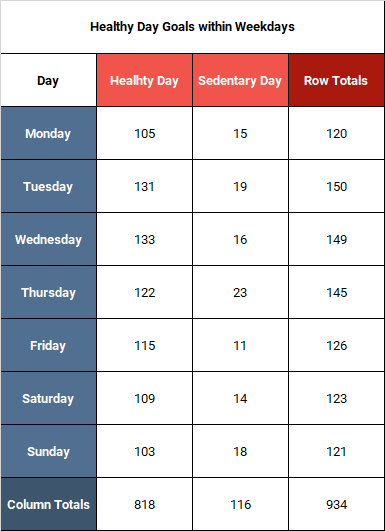
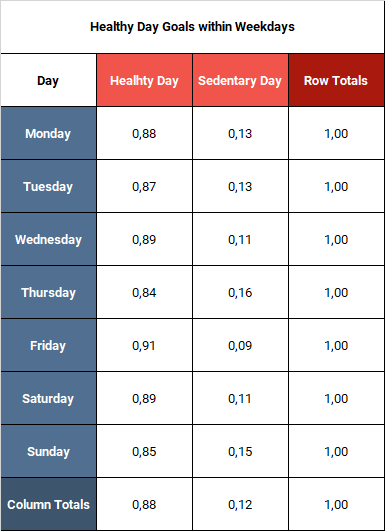

In [159]:
#Healthy Day Goals contingency table
healthy_day = pd.DataFrame({
    "Healthy Day" : [105,131,133,122,115,109,103],
    "Sedentary Day" : [15,19,16,23,11,14,18]
},index=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
healthy_day

,Healthy Day,Sedentary Day
Monday,105,15
Tuesday,131,19
Wednesday,133,16
Thursday,122,23
Friday,115,11
Saturday,109,14
Sunday,103,18


In [160]:
chisq_and_posthoc_corrected(healthy_day)

Chi2 result of the contingency table: 4.3458791532656, p-value: 0.6299783940811081
Significance results:
('Monday', 'Tuesday'): p_value: 1.000000; corrected: 1.000000 ('not significant') reject: False
('Monday', 'Wednesday'): p_value: 0.796599; corrected: 1.000000 ('not significant') reject: False
('Monday', 'Thursday'): p_value: 0.547667; corrected: 1.000000 ('not significant') reject: False
('Monday', 'Friday'): p_value: 0.450922; corrected: 1.000000 ('not significant') reject: False
('Monday', 'Saturday'): p_value: 0.943517; corrected: 1.000000 ('not significant') reject: False
('Monday', 'Sunday'): p_value: 0.727012; corrected: 1.000000 ('not significant') reject: False
('Tuesday', 'Wednesday'): p_value: 0.734822; corrected: 1.000000 ('not significant') reject: False
('Tuesday', 'Thursday'): p_value: 0.536207; corrected: 1.000000 ('not significant') reject: False
('Tuesday', 'Friday'): p_value: 0.393965; corrected: 1.000000 ('not significant') reject: False
('Tuesday', 'Saturday'):

> ### *Answer 11: As we can see, there is not any significant difference within weekdays.*

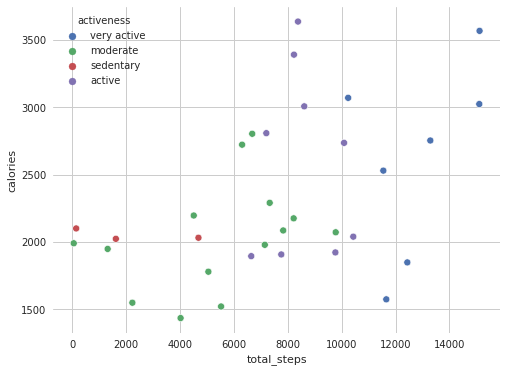

In [161]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='total_steps', y='calories', hue='activeness', data=daily_activity.groupby(["id","activeness"]).median().reset_index()) 
plt.show()

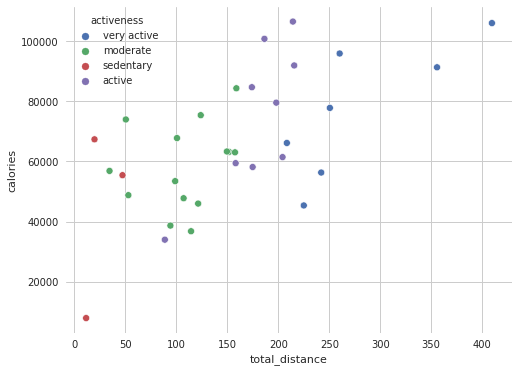

In [162]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='total_distance', y='calories', hue='activeness', data=daily_activity.groupby(["id","activeness"]).sum().reset_index()) 
plt.show()

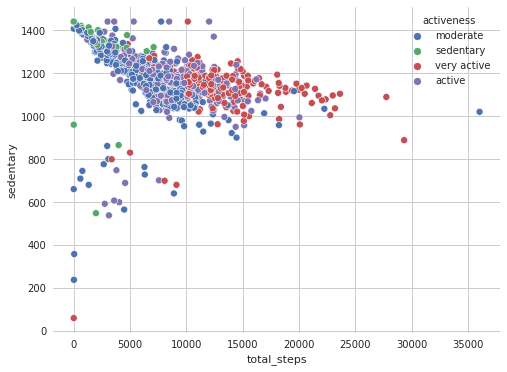

In [163]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='total_steps', y='sedentary', hue='activeness', data=daily_activity) 
plt.show()

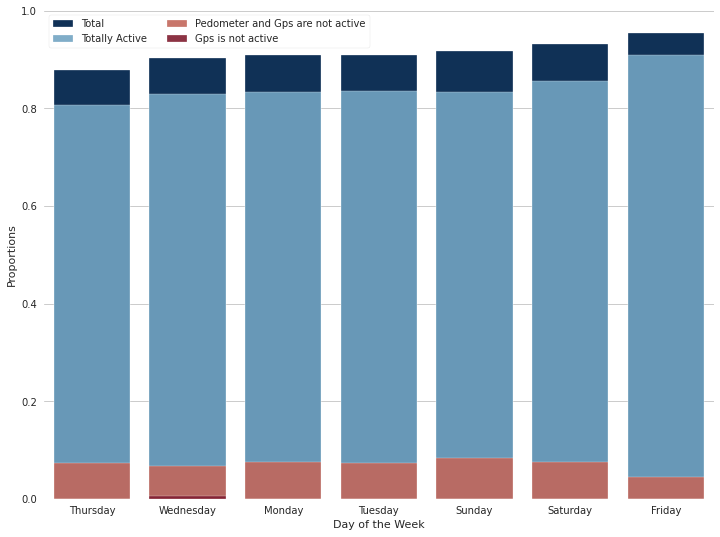

In [164]:
graph  = activity_status_by_day_percentage.sort_values("data_days").reset_index()
f, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x="wday", y="data_days", data=graph,label="Total", color='#053061', alpha=1)
sns.barplot(x="wday", y="totally_active", data=graph, label="Totally Active", color='#65a8cf', alpha=0.9)
sns.barplot(x="wday", y="pedometer_gps_not_active", data=graph, label="Pedometer and Gps are not active", color='#d35a4a', alpha=0.9)
sns.barplot(x="wday", y="gps_is_not_active", data=graph, label="Gps is not active", color='#900d26', alpha=0.9)
# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(ylabel="Proportions",
       xlabel="Day of the Week")
sns.despine(left=True, bottom=True)

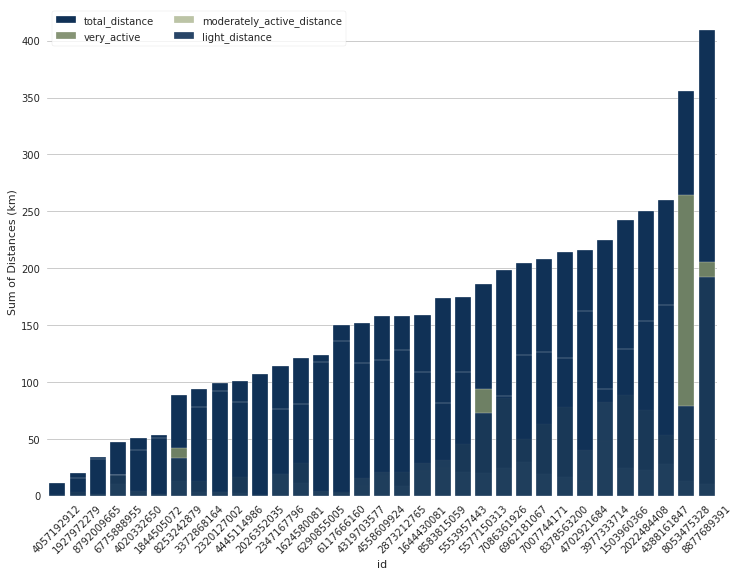

In [165]:
distances = daily_activity.groupby("id").sum().reset_index().sort_values("total_distance")
f, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x="id", y="total_distance", data=distances ,label="total_distance", color='#053061', alpha=1)
sns.barplot(x="id", y="very_active_distance", data=distances, label="very_active", color="#798F60", alpha=0.9)
sns.barplot(x="id", y="moderately_active_distance", data=distances, label="moderately_active_distance", color='#B7C397', alpha=0.9)
sns.barplot(x="id", y="light_active_distance", data=distances, label="light_distance", color='#053061', alpha=0.9)
# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(ylabel="Sum of Distances (km)",
       xlabel="id")
sns.despine(left=True, bottom=True)
plt.xticks(rotation=45);

# 9.Sleep Analysis (Will be in the next version)

# 10.Heartbeat analysis (Will be in the next version)